#**Federated and Deep Learning Based Intrusion Detection System for Internet of Things (Implementation Using Raspberry Pi)**

In [ ]:
os.getcwd()

'/content'

In [ ]:
today = date.today()

In [ ]:
"""
   Obtain the N-BaIoT Dataset from kaggle website:
"""

filepath = "https://www.kaggle.com/datasets/mkashifn/nbaiot-dataset"
od.download(filepath)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: edgariyasele
Your Kaggle Key: ··········


100%|██████████| 1.75G/1.75G [00:12<00:00, 146MB/s]


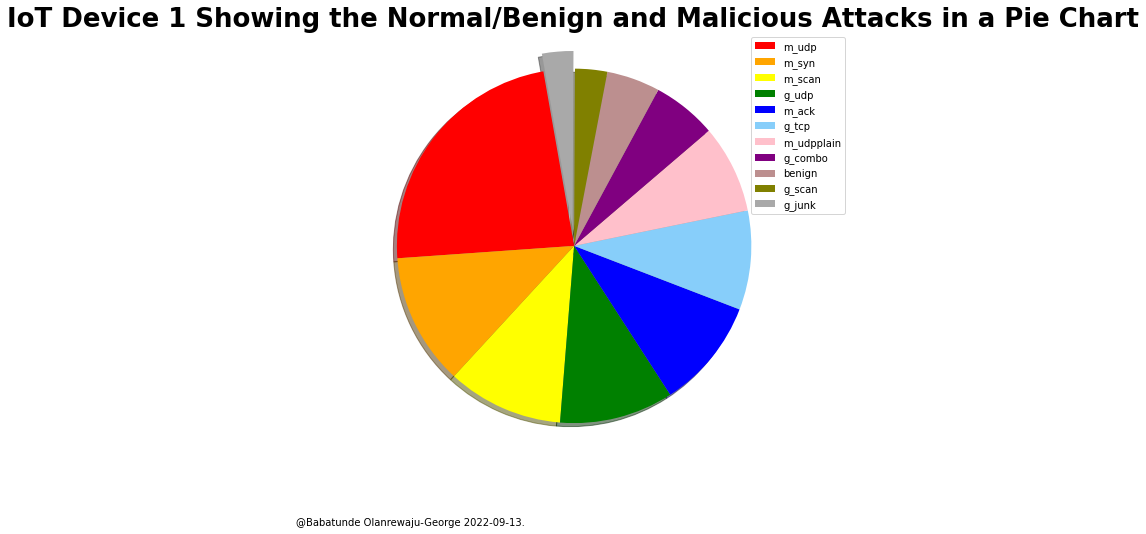

In [ ]:
# Load Dataset for IoT Device 1:
benign = pd.read_csv('/content/nbaiot-dataset/1.benign.csv')
benign.shape

# Botnet --> Mirai
# Attack --> Scan volnerable devices / Ack flooding / Syn flooding / UDP flooding / UDPplain

m_scan = pd.read_csv('/content/nbaiot-dataset/1.mirai.scan.csv')
m_ack = pd.read_csv('/content/nbaiot-dataset/1.mirai.ack.csv')
m_syn = pd.read_csv('/content/nbaiot-dataset/1.mirai.syn.csv')
m_udp = pd.read_csv('/content/nbaiot-dataset/1.mirai.udp.csv')
m_udpplain = pd.read_csv('/content/nbaiot-dataset/1.mirai.udpplain.csv')

#Botnet --> Gafgyt (BASHLITE)
#Attack --> Scan vulnerable devices / Sending spam / UDP flooding / TCP flooding / Sending spam & opening connection
g_scan = pd.read_csv('/content/nbaiot-dataset/1.gafgyt.scan.csv')
g_junk = pd.read_csv('/content/nbaiot-dataset/1.gafgyt.junk.csv')
g_udp = pd.read_csv('/content/nbaiot-dataset/1.gafgyt.udp.csv')
g_tcp = pd.read_csv('/content/nbaiot-dataset/1.gafgyt.tcp.csv')
g_combo = pd.read_csv('/content/nbaiot-dataset/1.gafgyt.combo.csv')

#Convert into one dataset
# add new column
benign['type'] = 'benign'
m_scan['type'] = 'm_scan'
m_ack['type'] = 'm_ack'
m_syn['type']  = 'm_syn'
m_udp['type'] = 'm_udp'
m_udpplain['type'] = 'm_udpplain'
g_combo['type'] = 'g_combo'
g_junk['type'] = 'g_junk'
g_scan['type'] = 'g_scan'
g_tcp['type'] = 'g_tcp'
g_udp['type'] = 'g_udp'

d = pd.concat([benign,m_scan,m_ack,m_syn,m_udp,m_udpplain,g_combo,g_junk,g_scan,g_tcp,g_udp], axis=0, sort=False, ignore_index=True)
d.shape

#value counts
labels = d['type'].value_counts()
label_count = pd.DataFrame({'labels': labels.index,'counts': labels.values})

# Plot the IoT Device 1 Data:

labels = label_count['labels']
sizes = label_count['counts']
plt.figure(figsize=(8,6))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'lightskyblue', 'pink', 'purple', 'rosybrown', 'olive', 'darkgrey']
# colors = [1,2,3,4,5,6,7,8,9,10,11]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)
patches, texts = plt.pie(sizes, explode = explode, colors=colors, shadow=True, startangle=100, pctdistance=100, labeldistance=10)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('IoT Device 1 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 1 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_1A.png')
plt.show()

# Save the dataset
d.to_csv('/content/Device #1.csv')

# Load the data
d1 = pd.read_csv('/content/Device #1.csv')


In [ ]:
"""
   Visualize the Dataset for IoT Device 1:
"""
print(d1.info())
print(d1.shape)
print(d1.describe())
d1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018298 entries, 0 to 1018297
Columns: 117 entries, Unnamed: 0 to type
dtypes: float64(115), int64(1), object(1)
memory usage: 909.0+ MB
None
(1018298, 117)
         Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
count  1.018298e+06      1.018298e+06    1.018298e+06        1.018298e+06   
mean   5.091485e+05      9.479704e+01    1.927187e+02        1.970133e+04   
std    2.939575e+05      6.380090e+01    1.631548e+02        2.517558e+04   
min    0.000000e+00      1.000000e+00    6.000000e+01        0.000000e+00   
25%    2.545742e+05      1.124271e+01    6.000000e+01        3.755417e-09   
50%    5.091485e+05      1.108011e+02    7.407356e+01        3.869695e+01   
75%    7.637228e+05      1.471055e+02    3.308499e+02        4.867314e+04   
max    1.018297e+06      3.416813e+02    8.861669e+02        1.738886e+05   

       MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  \
count      1.01829

Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
0                 0          1.000000       60.000000            0.000000   
1                 1          1.000000      354.000000            0.000000   
2                 2          1.857879      360.458980           35.789338   
3                 3          1.000000      337.000000            0.000000   
4                 4          1.680223      172.140917        18487.448750   
...             ...               ...             ...                 ...   
1018293     1018293          1.000000       60.000000            0.000000   
1018294     1018294          1.000000       60.000000            0.000000   
1018295     1018295          1.000000       60.000000            0.000000   
1018296     1018296          1.000000       60.000000            0.000000   
1018297     1018297          1.000000       60.000000            0.000000   

         MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
0                1.000000       60.000000            0.000000   
1                1.000000      354.000000            0.000000   
2                1.912127      360.275733           35.923972   
3                1.000000      337.000000            0.000000   
4                1.793580      182.560279        18928.175300   
...                   ...             ...                 ...   
1018293          1.000000       60.000000            0.000000   
1018294          1.000000       60.000000            0.000000   
1018295          1.000000       60.000000            0.000000   
1018296          1.000000       60.000000            0.000000   
1018297          1.000000       60.000000            0.000000   

         MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  ...  \
0                1.000000       60.000000            0.000000  ...   
1                1.000000      354.000000            0.000000  ...   
2                1.969807      360.091968           35.991542  ...   
3                1.000000      337.000000            0.000000  ...   
4                1.925828      193.165753        19153.795810  ...   
...                   ...             ...                 ...  ...   
1018293          1.000000       60.000000            0.000000  ...   
1018294          1.000000       60.000000            0.000000  ...   
1018295          1.000000       60.000000            0.000000  ...   
1018296          1.000000       60.000000            0.000000  ...   
1018297          1.000000       60.000000            0.000000  ...   

         HpHp_L0.1_covariance  HpHp_L0.1_pcc  HpHp_L0.01_weight  \
0                         0.0            0.0           1.000000   
1                         0.0            0.0           5.319895   
2                         0.0            0.0           6.318264   
3                         0.0            0.0           1.000000   
4                         0.0            0.0           1.000000   
...                       ...            ...                ...   
1018293                   0.0            0.0           1.000000   
1018294                   0.0            0.0           1.000000   
1018295                   0.0            0.0           1.000000   
1018296                   0.0            0.0           1.000000   
1018297                   0.0            0.0           1.000000   

         HpHp_L0.01_mean  HpHp_L0.01_std  HpHp_L0.01_magnitude  \
0              60.000000        0.000000             60.000000   
1             344.262695        4.710446            344.262695   
2             347.703087        9.034660            347.703087   
3             337.000000        0.000000            337.000000   
4              60.000000        0.000000             60.000000   
...                  ...             ...                   ...   
1018293        60.000000        0.000000             60.000000   
1018294        60.000000        0.000000             60.000000   
1018295        60.000000        0.000000             60.000000 

In [ ]:
# Dataset for IoT Device 1 Classes:
d1['type'].value_counts()

m_udp         237665
m_syn         122573
m_scan        107685
g_udp         105874
m_ack         102195
g_tcp          92141
m_udpplain     81982
g_combo        59718
benign         49548
g_scan         29849
g_junk         29068
Name: type, dtype: int64

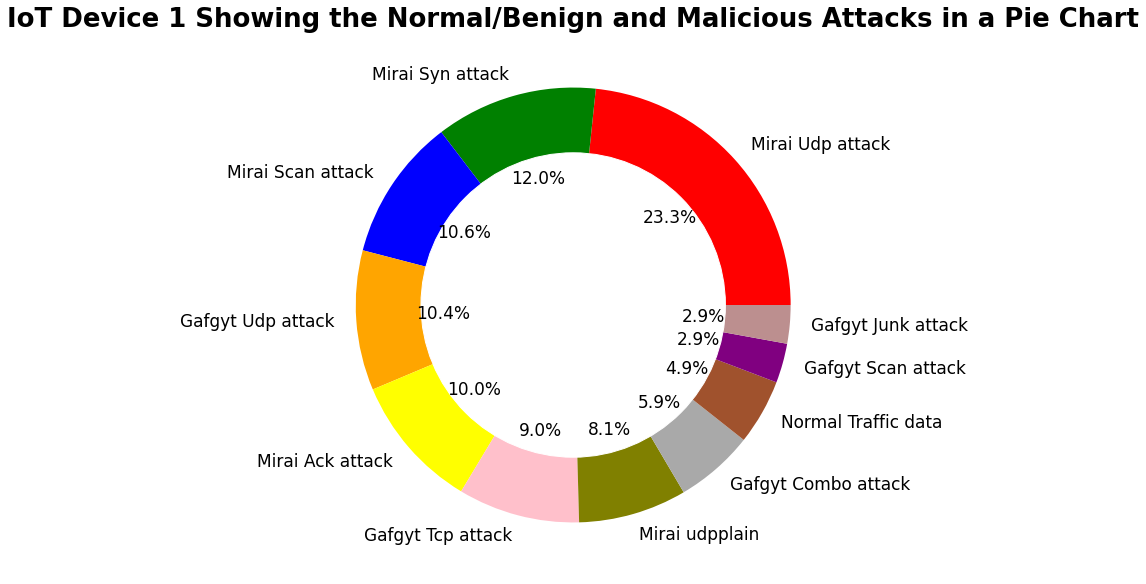

In [ ]:
"""
   Exploratory Data Analysis (EDA): - Dataset for IoT Device 1
"""
## Plot the data:

plt.figure(figsize = (20, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(d1['type'].value_counts(), labels=['Mirai Udp attack', 'Mirai Syn attack', 'Mirai Scan attack', 'Gafgyt Udp attack', 'Mirai Ack attack', 'Gafgyt Tcp attack',
                                                   'Mirai udpplain', 'Gafgyt Combo attack', 'Normal Traffic data', 'Gafgyt Scan attack', 'Gafgyt Junk attack'],
        colors=['red', 'green', 'blue', 'orange', 'yellow', 'pink', 'olive', 'darkgrey', 'sienna', 'purple', 'rosybrown'], autopct = '%1.1f%%', textprops={'fontsize': 17, })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('IoT Device 1 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 1 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_1B.png')
plt.show()

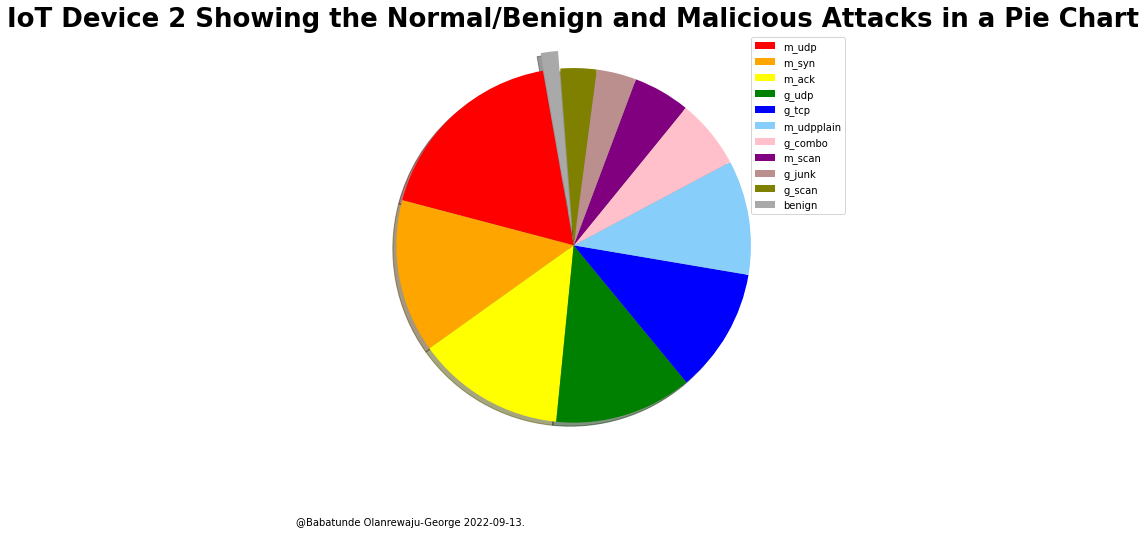

In [ ]:
# Load Dataset for IoT Device 2:
benign = pd.read_csv('/content/nbaiot-dataset/2.benign.csv')
benign.shape

# Botnet --> Mirai
# Attack --> Scan volnerable devices / Ack flooding / Syn flooding / UDP flooding / UDPplain

m_scan = pd.read_csv('/content/nbaiot-dataset/2.mirai.scan.csv')
m_ack = pd.read_csv('/content/nbaiot-dataset/2.mirai.ack.csv')
m_syn = pd.read_csv('/content/nbaiot-dataset/2.mirai.syn.csv')
m_udp = pd.read_csv('/content/nbaiot-dataset/2.mirai.udp.csv')
m_udpplain = pd.read_csv('/content/nbaiot-dataset/2.mirai.udpplain.csv')

#Botnet --> Gafgyt (BASHLITE)
#Attack --> Scan vulnerable devices / Sending spam / UDP flooding / TCP flooding / Sending spam & opening connection
g_scan = pd.read_csv('/content/nbaiot-dataset/2.gafgyt.scan.csv')
g_junk = pd.read_csv('/content/nbaiot-dataset/2.gafgyt.junk.csv')
g_udp = pd.read_csv('/content/nbaiot-dataset/2.gafgyt.udp.csv')
g_tcp = pd.read_csv('/content/nbaiot-dataset/2.gafgyt.tcp.csv')
g_combo = pd.read_csv('/content/nbaiot-dataset/2.gafgyt.combo.csv')

##Convert into one dataset
# add new column
benign['type'] = 'benign'
m_scan['type'] = 'm_scan'
m_ack['type'] = 'm_ack'
m_syn['type']  = 'm_syn'
m_udp['type'] = 'm_udp'
m_udpplain['type'] = 'm_udpplain'
g_combo['type'] = 'g_combo'
g_junk['type'] = 'g_junk'
g_scan['type'] = 'g_scan'
g_tcp['type'] = 'g_tcp'
g_udp['type'] = 'g_udp'

d = pd.concat([benign,m_scan,m_ack,m_syn,m_udp,m_udpplain,g_combo,g_junk,g_scan,g_tcp,g_udp], axis=0, sort=False, ignore_index=True)
d.shape

#value counts
labels = d['type'].value_counts()
label_count = pd.DataFrame({'labels': labels.index,'counts': labels.values})

#Plot the Data:
labels = label_count['labels']
sizes = label_count['counts']
plt.figure(figsize=(8,6))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'lightskyblue', 'pink', 'purple', 'rosybrown', 'olive', 'darkgrey']
# colors = [1,2,3,4,5,6,7,8,9,10,11]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)
patches, texts = plt.pie(sizes, explode = explode, colors=colors, shadow=True, startangle=100, pctdistance=100, labeldistance=10)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('IoT Device 2 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 2 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_2A.png')
plt.show()

# Save the dataset
d.to_csv('/content/Device #2.csv')

# Load the data
d2 = pd.read_csv('/content/Device #2.csv')

In [ ]:
"""
   Visualize the Dataset for IoT Device 2:
"""
print(d2.info())
print(d2.shape)
print(d2.describe())
d2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835876 entries, 0 to 835875
Columns: 117 entries, Unnamed: 0 to type
dtypes: float64(115), int64(1), object(1)
memory usage: 746.1+ MB
None
(835876, 117)
          Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
count  835876.000000     835876.000000   835876.000000        8.358760e+05   
mean   417937.500000         98.003402      220.472899        1.688949e+04   
std    241296.761142         68.847613      187.861701        2.346392e+04   
min         0.000000          1.000000       60.000000        0.000000e+00   
25%    208968.750000          1.199515       60.000000        9.094947e-13   
50%    417937.500000        113.808087       74.044616        3.947754e+01   
75%    626906.250000        152.350429      405.213898        3.595471e+04   
max    835875.000000        438.002839     1108.154953        2.721017e+05   

       MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  \
count     83

Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
0                0          1.000000       60.000000            0.000000   
1                1          1.000000      110.000000            0.000000   
2                2          1.724055       91.439104          249.441812   
3                3          1.000000      342.000000            0.000000   
4                4          2.516815       90.867308          150.827639   
...            ...               ...             ...                 ...   
835871      835871          1.000000       60.000000            0.000000   
835872      835872          1.000000       60.000000            0.000000   
835873      835873          1.000000       60.000000            0.000000   
835874      835874          1.000000       60.000000            0.000000   
835875      835875          1.000000       60.000000            0.000000   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
0               1.000000       60.000000            0.000000   
1               1.000000      110.000000            0.000000   
2               1.823878       92.454965          253.612868   
3               1.000000      342.000000            0.000000   
4               2.688981       91.541993          160.705060   
...                  ...             ...                 ...   
835871          1.000000       60.000000            0.000000   
835872          1.000000       60.000000            0.000000   
835873          1.000000       60.000000            0.000000   
835874          1.000000       60.000000            0.000000   
835875          1.000000       60.000000            0.000000   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  ...  \
0               1.000000       60.000000            0.000000  ...   
1               1.000000      110.000000            0.000000  ...   
2               1.937463       93.483558          255.733288  ...   
3               1.000000      342.000000            0.000000  ...   
4               2.888469       92.277536          169.944112  ...   
...                  ...             ...                 ...  ...   
835871          1.000000       60.000000            0.000000  ...   
835872          1.000000       60.000000            0.000000  ...   
835873          1.000000       60.000000            0.000000  ...   
835874          1.000000       60.000000            0.000000  ...   
835875          1.000000       60.000000            0.000000  ...   

        HpHp_L0.1_covariance  HpHp_L0.1_pcc  HpHp_L0.01_weight  \
0                        0.0            0.0           1.000000   
1                        0.0            0.0           1.238636   
2                        0.0            0.0           1.000000   
3                        0.0            0.0           2.487473   
4                        0.0            0.0           2.237519   
...                      ...            ...                ...   
835871                   0.0            0.0           1.000000   
835872                   0.0            0.0           1.000000   
835873                   0.0            0.0           1.000000   
835874                   0.0            0.0           1.000000   
835875                   0.0            0.0           1.000000   

        HpHp_L0.01_mean  HpHp_L0.01_std  HpHp_L0.01_magnitude  \
0             60.000000        0.000000             60.000000   
1            106.146795        7.887770            106.146795   
2             78.000000        0.000000             78.000000   
3            341.959189        7.347919            341.959189   
4             98.930412        9.942635             98.930412   
...                 ...             ...                   ...   
835871        60.000000        0.000000             60.000000   
835872        60.000000        0.000000             60.000000   
835873        60.000000        0.000000             60.000000   
835874        60.000000        0.000000             60

In [ ]:
# Dataset for IoT Device 2 Classes:
d2['type'].value_counts()

m_udp         151481
m_syn         116807
m_ack         113285
g_udp         104791
g_tcp          95021
m_udpplain     87368
g_combo        53012
m_scan         43192
g_junk         30312
g_scan         27494
benign         13113
Name: type, dtype: int64

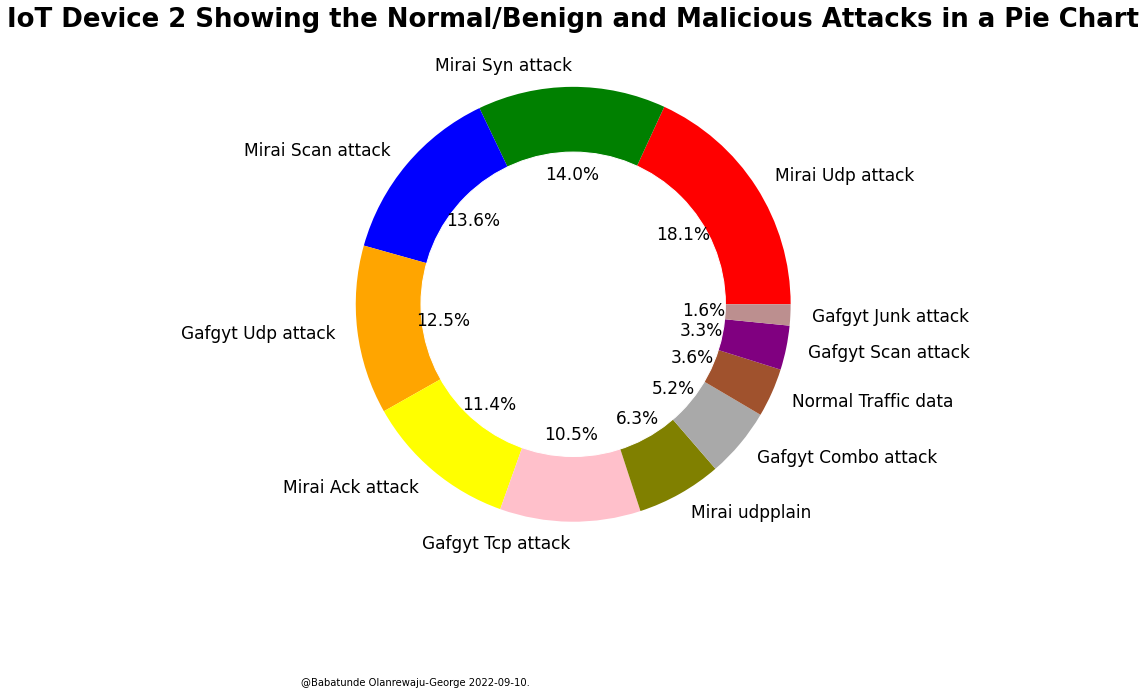

In [ ]:
"""
   Exploratory Data Analysis (EDA): - Dataset for IoT Device 2
"""
## Plot the data:

plt.figure(figsize = (20, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(d2['type'].value_counts(), labels=['Mirai Udp attack', 'Mirai Syn attack', 'Mirai Scan attack', 'Gafgyt Udp attack', 'Mirai Ack attack', 'Gafgyt Tcp attack',
                                                   'Mirai udpplain', 'Gafgyt Combo attack', 'Normal Traffic data', 'Gafgyt Scan attack', 'Gafgyt Junk attack'],
        colors=['red', 'green', 'blue', 'orange', 'yellow', 'pink', 'olive', 'darkgrey', 'sienna', 'purple', 'rosybrown'], autopct = '%1.1f%%', textprops={'fontsize': 17, })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('IoT Device 2 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 2 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_2B.png')
plt.show()

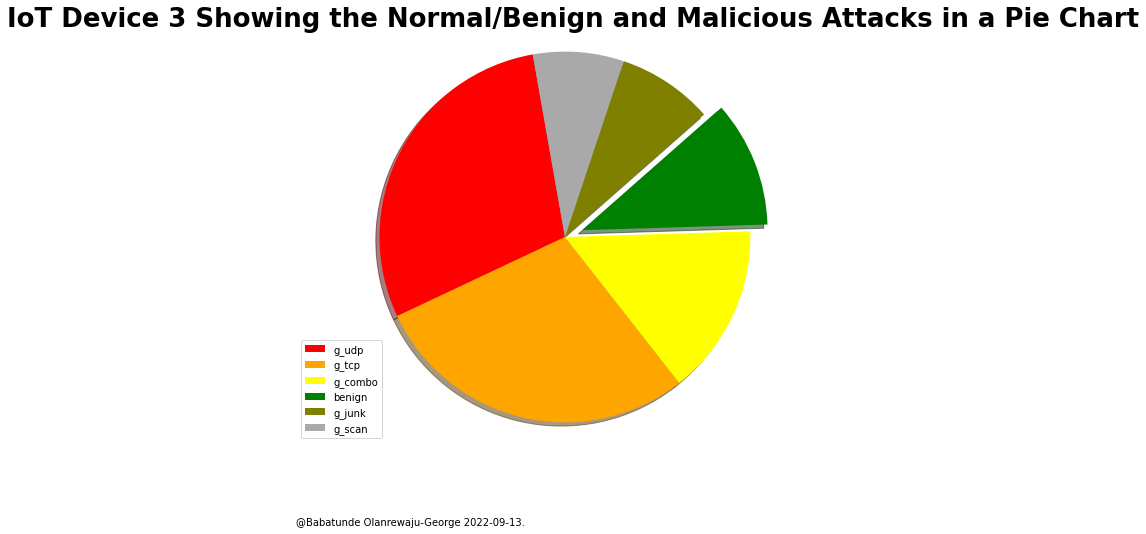

In [ ]:
# Load Dataset for IoT Device 3:
benign = pd.read_csv('/content/nbaiot-dataset/3.benign.csv')
benign.shape

#Botnet --> Gafgyt (BASHLITE)
#Attack --> Scan vulnerable devices / Sending spam / UDP flooding / TCP flooding / Sending spam & opening connection
g_scan = pd.read_csv('/content/nbaiot-dataset/3.gafgyt.scan.csv')
g_junk = pd.read_csv('/content/nbaiot-dataset/3.gafgyt.junk.csv')
g_udp = pd.read_csv('/content/nbaiot-dataset/3.gafgyt.udp.csv')
g_tcp = pd.read_csv('/content/nbaiot-dataset/3.gafgyt.tcp.csv')
g_combo = pd.read_csv('/content/nbaiot-dataset/3.gafgyt.combo.csv')

##Convert into one dataset
# add new column
benign['type'] = 'benign'
g_combo['type'] = 'g_combo'
g_junk['type'] = 'g_junk'
g_scan['type'] = 'g_scan'
g_tcp['type'] = 'g_tcp'
g_udp['type'] = 'g_udp'

d = pd.concat([benign,g_combo,g_junk,g_scan,g_tcp,g_udp], axis=0, sort=False, ignore_index=True)
d.shape

#value counts
labels = d['type'].value_counts()
label_count = pd.DataFrame({'labels': labels.index,'counts': labels.values})

# Plot the data:
labels = label_count['labels']
sizes = label_count['counts']
plt.figure(figsize=(8,6))
colors = ['red', 'orange', 'yellow', 'green', 'olive', 'darkgrey']
# colors = [1,2,3,4,5,6,7,8,9,10,11]
explode = (0, 0, 0, 0.1, 0, 0)
patches, texts = plt.pie(sizes, explode = explode, colors=colors, shadow=True, startangle=100, pctdistance=100, labeldistance=10)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('IoT Device 3 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 3 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_3A.png')
plt.show()

# Save the dataset
d.to_csv('/content/Device #3.csv')

# Load the data
d3 = pd.read_csv('/content/Device #3.csv')

In [ ]:
"""
   Visualize the Dataset for IoT Device 3:
"""
print(d3.info())
print(d3.shape)
print(d3.describe())
d3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355500 entries, 0 to 355499
Columns: 117 entries, Unnamed: 0 to type
dtypes: float64(115), int64(1), object(1)
memory usage: 317.3+ MB
None
(355500, 117)
          Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
count  355500.000000     355500.000000   355500.000000       355500.000000   
mean   177749.500000         42.917391       67.268125          266.961430   
std    102624.154686         69.576572       15.958070         3048.519143   
min         0.000000          1.000000       60.000000            0.000000   
25%     88874.750000          1.000000       60.000000            0.000000   
50%    177749.500000          1.000000       60.000000            0.000000   
75%    266624.250000         71.470343       74.033009            0.527706   
max    355499.000000        304.382099      886.166851       173888.566142   

       MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  \
count     35

Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
0                0          1.000000       60.000000             0.00000   
1                1          1.000000       70.000000             0.00000   
2                2          1.000023       89.999548             0.00904   
3                3          1.000000       60.000000             0.00000   
4                4          1.000000      590.000000             0.00000   
...            ...               ...             ...                 ...   
355495      355495          1.000000       60.000000             0.00000   
355496      355496          1.000000       60.000000             0.00000   
355497      355497          1.000000       60.000000             0.00000   
355498      355498          1.000000       60.000000             0.00000   
355499      355499          1.000000       60.000000             0.00000   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
0               1.000000       60.000000        0.000000e+00   
1               1.000000       70.000000        0.000000e+00   
2               1.001631       89.967432        6.503024e-01   
3               1.000000       60.000000        4.550000e-13   
4               1.000000      590.000000        0.000000e+00   
...                  ...             ...                 ...   
355495          1.000000       60.000000        0.000000e+00   
355496          1.000000       60.000000        0.000000e+00   
355497          1.000000       60.000000        0.000000e+00   
355498          1.000000       60.000000        0.000000e+00   
355499          1.000000       60.000000        0.000000e+00   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  ...  \
0               1.000000       60.000000        0.000000e+00  ...   
1               1.000000       70.000000        0.000000e+00  ...   
2               1.117713       87.893685        3.768974e+01  ...   
3               1.000091       60.000000        4.550000e-13  ...   
4               1.000000      590.000000        0.000000e+00  ...   
...                  ...             ...                 ...  ...   
355495          1.000000       60.000000        0.000000e+00  ...   
355496          1.000000       60.000000        0.000000e+00  ...   
355497          1.000000       60.000000        0.000000e+00  ...   
355498          1.000000       60.000000        0.000000e+00  ...   
355499          1.000000       60.000000        0.000000e+00  ...   

        HpHp_L0.1_covariance  HpHp_L0.1_pcc  HpHp_L0.01_weight  \
0                        0.0            0.0           1.000000   
1                        0.0            0.0           1.000000   
2                        0.0            0.0           1.000000   
3                        0.0            0.0           1.911130   
4                        0.0            0.0           4.274029   
...                      ...            ...                ...   
355495                   0.0            0.0           1.000000   
355496                   0.0            0.0           1.000000   
355497                   0.0            0.0           1.000000   
355498                   0.0            0.0           1.000000   
355499                   0.0            0.0           1.000000   

        HpHp_L0.01_mean  HpHp_L0.01_std  HpHp_L0.01_magnitude  \
0             60.000000    0.000000e+00             60.000000   
1             70.000000    0.000000e+00             70.000000   
2             90.000000    0.000000e+00             90.000000   
3             60.000000    9.540000e-07             60.000000   
4            399.892026    1.050783e+02            399.892026   
...                 ...             ...                   ...   
355495        60.000000    0.000000e+00             60.000000   
355496        60.000000    0.000000e+00             60.000000   
355497        60.000000    0.000000e+00             60.000000   
355498        60.000000    0.000000e+00             60

In [ ]:
# Dataset for IoT Device 3 Classes:
d3['type'].value_counts()

g_udp      103933
g_tcp      101536
g_combo     53014
benign      39100
g_junk      29797
g_scan      28120
Name: type, dtype: int64

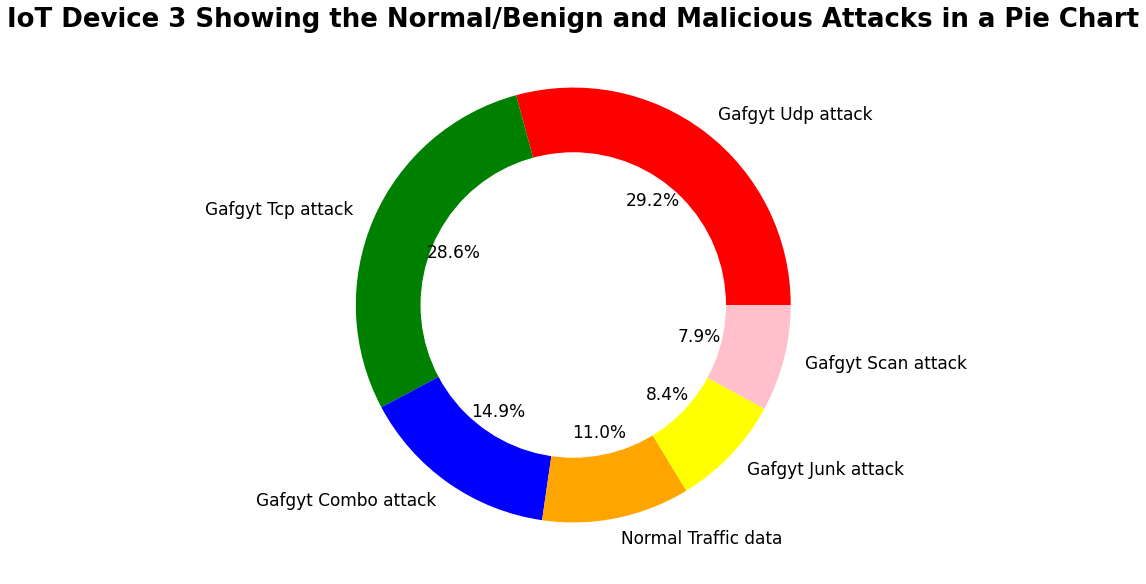

In [ ]:
"""
   Exploratory Data Analysis (EDA): - Dataset for IoT Device 3
"""
## Plot the data:

plt.figure(figsize = (20, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(d3['type'].value_counts(), labels=['Gafgyt Udp attack', 'Gafgyt Tcp attack', 'Gafgyt Combo attack', 'Normal Traffic data', 'Gafgyt Junk attack', 'Gafgyt Scan attack'],
        colors=['red', 'green', 'blue', 'orange', 'yellow', 'pink', 'olive', 'darkgrey', 'sienna', 'purple', 'rosybrown'], autopct = '%1.1f%%', textprops={'fontsize': 17, })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('IoT Device 3 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 3 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_3B.png')
plt.show()

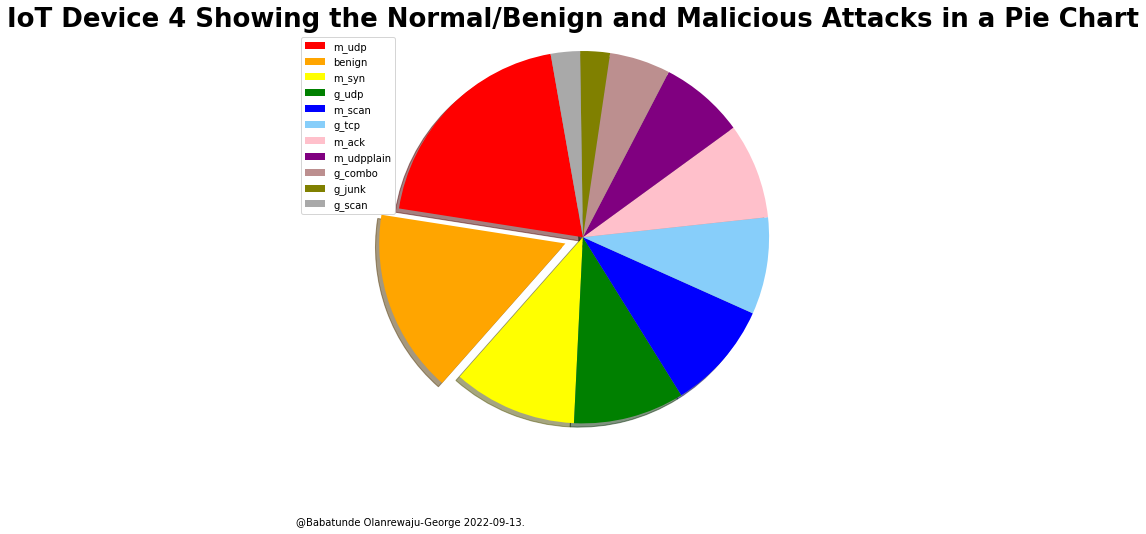

In [ ]:
# Load Dataset for IoT Device 4:
benign = pd.read_csv('/content/nbaiot-dataset/4.benign.csv')
benign.shape

# Botnet --> Mirai
# Attack --> Scan volnerable devices / Ack flooding / Syn flooding / UDP flooding / UDPplain

m_scan = pd.read_csv('/content/nbaiot-dataset/4.mirai.scan.csv')
m_ack = pd.read_csv('/content/nbaiot-dataset/4.mirai.ack.csv')
m_syn = pd.read_csv('/content/nbaiot-dataset/4.mirai.syn.csv')
m_udp = pd.read_csv('/content/nbaiot-dataset/4.mirai.udp.csv')
m_udpplain = pd.read_csv('/content/nbaiot-dataset/4.mirai.udpplain.csv')

#Botnet --> Gafgyt (BASHLITE)
#Attack --> Scan vulnerable devices / Sending spam / UDP flooding / TCP flooding / Sending spam & opening connection
g_scan = pd.read_csv('/content/nbaiot-dataset/4.gafgyt.scan.csv')
g_junk = pd.read_csv('/content/nbaiot-dataset/4.gafgyt.junk.csv')
g_udp = pd.read_csv('/content/nbaiot-dataset/4.gafgyt.udp.csv')
g_tcp = pd.read_csv('/content/nbaiot-dataset/4.gafgyt.tcp.csv')
g_combo = pd.read_csv('/content/nbaiot-dataset/4.gafgyt.combo.csv')

## Convert into one dataset
# add new column
benign['type'] = 'benign'
m_scan['type'] = 'm_scan'
m_ack['type'] = 'm_ack'
m_syn['type']  = 'm_syn'
m_udp['type'] = 'm_udp'
m_udpplain['type'] = 'm_udpplain'
g_combo['type'] = 'g_combo'
g_junk['type'] = 'g_junk'
g_scan['type'] = 'g_scan'
g_tcp['type'] = 'g_tcp'
g_udp['type'] = 'g_udp'

d = pd.concat([benign,m_scan,m_ack,m_syn,m_udp,m_udpplain,g_combo,g_junk,g_scan,g_tcp,g_udp], axis=0, sort=False, ignore_index=True)
d.shape

#value counts
labels = d['type'].value_counts()
label_count = pd.DataFrame({'labels': labels.index,'counts': labels.values})

# Plot the data:
labels = label_count['labels']
sizes = label_count['counts']
plt.figure(figsize=(8,6))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'lightskyblue', 'pink', 'purple', 'rosybrown', 'olive', 'darkgrey']
# colors = [1,2,3,4,5,6,7,8,9,10,11]
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
patches, texts = plt.pie(sizes, explode = explode, colors=colors, shadow=True, startangle=100, pctdistance=100, labeldistance=10)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('IoT Device 4 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 4 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_4A.png')
plt.show()

# Save the dataset
d.to_csv('/content/Device #4.csv')

# Load the data
d4 = pd.read_csv('/content/Device #4.csv')

In [ ]:
"""
   Visualize the Dataset for IoT Device 4:
"""
print(d4.info())
print(d4.shape)
print(d4.describe())
d4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098677 entries, 0 to 1098676
Columns: 117 entries, Unnamed: 0 to type
dtypes: float64(115), int64(1), object(1)
memory usage: 980.7+ MB
None
(1098677, 117)
         Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
count  1.098677e+06      1.098677e+06    1.098677e+06        1.098677e+06   
mean   5.493380e+05      8.282547e+01    1.760965e+02        1.744759e+04   
std    3.171609e+05      6.727041e+01    1.621744e+02        2.793956e+04   
min    0.000000e+00      1.000000e+00    6.000000e+01        0.000000e+00   
25%    2.746690e+05      1.082647e+00    6.000018e+01        1.000000e-11   
50%    5.493380e+05      1.020337e+02    7.309616e+01        1.501728e+01   
75%    8.240070e+05      1.415139e+02    2.942596e+02        4.161710e+04   
max    1.098676e+06      3.416813e+02    1.452697e+03        4.756482e+05   

       MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  \
count      1.09867

Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
0                 0          1.000000            60.0        0.000000e+00   
1                 1          1.000000            60.0        0.000000e+00   
2                 2          1.000000           342.0        0.000000e+00   
3                 3          1.963325           342.0        4.370000e-11   
4                 4          1.000000            60.0        0.000000e+00   
...             ...               ...             ...                 ...   
1098672     1098672          1.000000            60.0        0.000000e+00   
1098673     1098673          1.000000            60.0        0.000000e+00   
1098674     1098674          1.000000            60.0        0.000000e+00   
1098675     1098675          1.000000            60.0        0.000000e+00   
1098676     1098676          1.000000            60.0        0.000000e+00   

         MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
0                1.000000            60.0                 0.0   
1                1.000000            60.0                 0.0   
2                1.000000           342.0                 0.0   
3                1.977831           342.0                 0.0   
4                1.000000            60.0                 0.0   
...                   ...             ...                 ...   
1098672          1.000000            60.0                 0.0   
1098673          1.000000            60.0                 0.0   
1098674          1.000000            60.0                 0.0   
1098675          1.000000            60.0                 0.0   
1098676          1.000000            60.0                 0.0   

         MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  ...  \
0                1.000000            60.0                 0.0  ...   
1                1.000000            60.0                 0.0  ...   
2                1.000000           342.0                 0.0  ...   
3                1.992555           342.0                 0.0  ...   
4                1.000000            60.0                 0.0  ...   
...                   ...             ...                 ...  ...   
1098672          1.000000            60.0                 0.0  ...   
1098673          1.000000            60.0                 0.0  ...   
1098674          1.000000            60.0                 0.0  ...   
1098675          1.000000            60.0                 0.0  ...   
1098676          1.000000            60.0                 0.0  ...   

         HpHp_L0.1_covariance  HpHp_L0.1_pcc  HpHp_L0.01_weight  \
0                         0.0            0.0           1.000000   
1                         0.0            0.0           1.000000   
2                         0.0            0.0           6.249414   
3                         0.0            0.0           7.248947   
4                         0.0            0.0           1.000000   
...                       ...            ...                ...   
1098672                   0.0            0.0           1.000000   
1098673                   0.0            0.0           1.000000   
1098674                   0.0            0.0           1.000000   
1098675                   0.0            0.0           1.000000   
1098676                   0.0            0.0           1.000000   

         HpHp_L0.01_mean  HpHp_L0.01_std  HpHp_L0.01_magnitude  \
0              60.000000        0.000000             60.000000   
1              60.000000        0.000000             60.000000   
2             449.603272      122.911136            449.603272   
3             434.759286      120.000074            434.759286   
4              60.000000        0.000000             60.000000   
...                  ...             ...                   ...   
1098672        60.000000        0.000000             60.000000   
1098673        60.000000        0.000000             60.000000   
1098674        60.000000        0.000000             60.000000 

In [ ]:
# Dataset for IoT Device 4 Classes:
d4['type'].value_counts()

m_udp         217034
benign        175240
m_syn         118128
g_udp         105782
m_scan        103621
g_tcp          92581
m_ack          91123
m_udpplain     80808
g_combo        58152
g_junk         28349
g_scan         27859
Name: type, dtype: int64

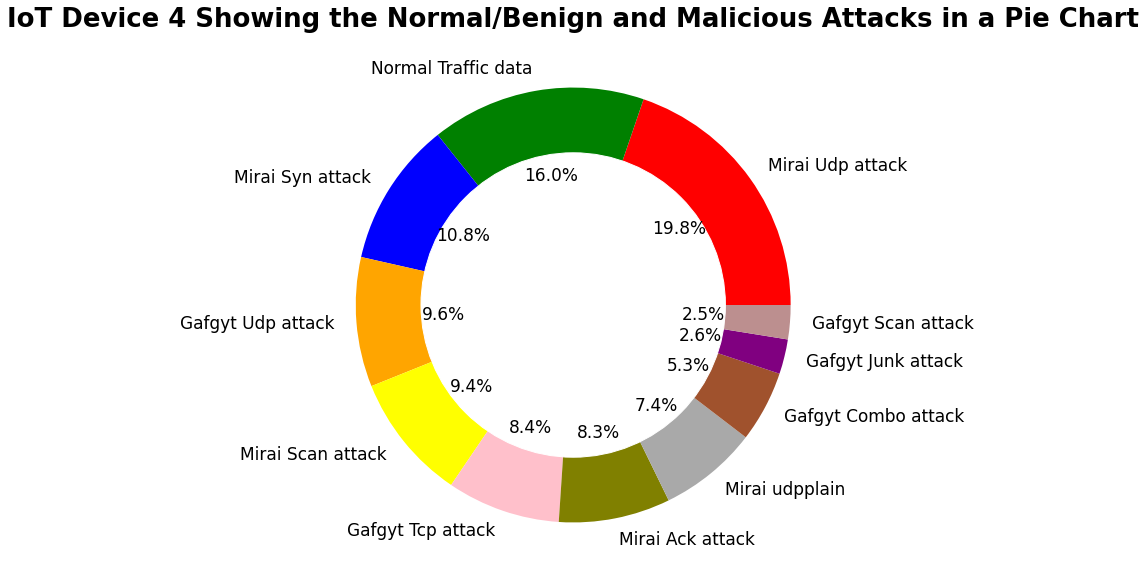

In [ ]:
"""
   Exploratory Data Analysis (EDA): - Dataset for IoT Device 4
"""
## Plot the data:

plt.figure(figsize = (20, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(d4['type'].value_counts(), labels=['Mirai Udp attack', 'Normal Traffic data', 'Mirai Syn attack', 'Gafgyt Udp attack', 'Mirai Scan attack', 'Gafgyt Tcp attack', 'Mirai Ack attack',
                                                   'Mirai udpplain', 'Gafgyt Combo attack', 'Gafgyt Junk attack', 'Gafgyt Scan attack'],
        colors=['red', 'green', 'blue', 'orange', 'yellow', 'pink', 'olive', 'darkgrey', 'sienna', 'purple', 'rosybrown'], autopct = '%1.1f%%', textprops={'fontsize': 17, })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('IoT Device 4 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 4 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_4B.png')
plt.show()

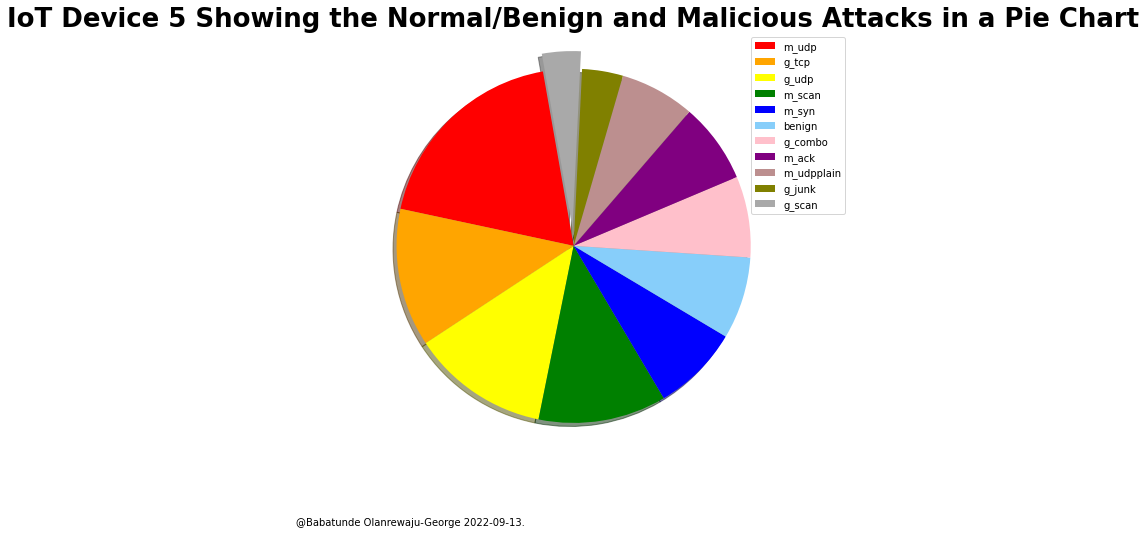

In [ ]:
# Load Dataset for IoT Device 5:
benign = pd.read_csv('/content/nbaiot-dataset/5.benign.csv')
benign.shape

# Botnet --> Mirai
# Attack --> Scan volnerable devices / Ack flooding / Syn flooding / UDP flooding / UDPplain

m_scan = pd.read_csv('/content/nbaiot-dataset/5.mirai.scan.csv')
m_ack = pd.read_csv('/content/nbaiot-dataset/5.mirai.ack.csv')
m_syn = pd.read_csv('/content/nbaiot-dataset/5.mirai.syn.csv')
m_udp = pd.read_csv('/content/nbaiot-dataset/5.mirai.udp.csv')
m_udpplain = pd.read_csv('/content/nbaiot-dataset/5.mirai.udpplain.csv')

#Botnet --> Gafgyt (BASHLITE)
#Attack --> Scan vulnerable devices / Sending spam / UDP flooding / TCP flooding / Sending spam & opening connection
g_scan = pd.read_csv('/content/nbaiot-dataset/5.gafgyt.scan.csv')
g_junk = pd.read_csv('/content/nbaiot-dataset/5.gafgyt.junk.csv')
g_udp = pd.read_csv('/content/nbaiot-dataset/5.gafgyt.udp.csv')
g_tcp = pd.read_csv('/content/nbaiot-dataset/5.gafgyt.tcp.csv')
g_combo = pd.read_csv('/content/nbaiot-dataset/5.gafgyt.combo.csv')

## Convert into one dataset
# add new column
benign['type'] = 'benign'
m_scan['type'] = 'm_scan'
m_ack['type'] = 'm_ack'
m_syn['type']  = 'm_syn'
m_udp['type'] = 'm_udp'
m_udpplain['type'] = 'm_udpplain'
g_combo['type'] = 'g_combo'
g_junk['type'] = 'g_junk'
g_scan['type'] = 'g_scan'
g_tcp['type'] = 'g_tcp'
g_udp['type'] = 'g_udp'

d = pd.concat([benign,m_scan,m_ack,m_syn,m_udp,m_udpplain,g_combo,g_junk,g_scan,g_tcp,g_udp], axis=0, sort=False, ignore_index=True)
d.shape

#value counts
labels = d['type'].value_counts()
label_count = pd.DataFrame({'labels': labels.index,'counts': labels.values})

# Plot the data:
labels = label_count['labels']
sizes = label_count['counts']
plt.figure(figsize=(8,6))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'lightskyblue', 'pink', 'purple', 'rosybrown', 'olive', 'darkgrey']
# colors = [1,2,3,4,5,6,7,8,9,10,11]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)
patches, texts = plt.pie(sizes, explode = explode, colors=colors, shadow=True, startangle=100, pctdistance=100, labeldistance=10)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('IoT Device 5 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 5 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_5A.png')
plt.show()

# Save the dataset
d.to_csv('/content/Device #5.csv')

# Load the data
d5 = pd.read_csv('/content/Device #5.csv')

In [ ]:
"""
   Visualize the Dataset for IoT Device 5:
"""
print(d5.info())
print(d5.shape)
print(d5.describe())
d5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828260 entries, 0 to 828259
Columns: 117 entries, Unnamed: 0 to type
dtypes: float64(115), int64(1), object(1)
memory usage: 739.3+ MB
None
(828260, 117)
          Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
count  828260.000000     828260.000000   828260.000000       828260.000000   
mean   414129.500000         67.311679      154.571968        16721.765263   
std    239098.211317         61.644950      140.697750        24611.124407   
min         0.000000          1.000000       60.000000            0.000000   
25%    207064.750000          1.000000       60.000000            0.000000   
50%    414129.500000         60.962622       74.006076            2.596261   
75%    621194.250000        109.076405      234.606146        44657.446837   
max    828259.000000        379.917235      886.166851       410576.913200   

       MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  \
count     82

Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
0                0          1.000000       60.000000            0.000000   
1                1          1.000000      590.000000            0.000000   
2                2          1.942585      590.000000            0.000000   
3                3          1.000000       60.000000            0.000000   
4                4          1.979600       66.061831           35.996177   
...            ...               ...             ...                 ...   
828255      828255          1.000000       60.000000            0.000000   
828256      828256          1.000000       60.000000            0.000000   
828257      828257          1.000000       60.000000            0.000000   
828258      828258          1.000000       60.000000            0.000000   
828259      828259          1.000000       60.000000            0.000000   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
0               1.000000         60.0000        0.000000e+00   
1               1.000000        590.0000        0.000000e+00   
2               1.965145        590.0000        1.160000e-10   
3               1.000000         60.0000        0.000000e+00   
4               1.987709         66.0371        3.599862e+01   
...                  ...             ...                 ...   
828255          1.000000         60.0000        0.000000e+00   
828256          1.000000         60.0000        0.000000e+00   
828257          1.000000         60.0000        0.000000e+00   
828258          1.000000         60.0000        0.000000e+00   
828259          1.000000         60.0000        0.000000e+00   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  ...  \
0               1.000000       60.000000            0.000000  ...   
1               1.000000      590.000000            0.000000  ...   
2               1.988244      590.000000            0.000000  ...   
3               1.000000       60.000000            0.000000  ...   
4               1.995886       66.012367           35.999847  ...   
...                  ...             ...                 ...  ...   
828255          1.000000       60.000000            0.000000  ...   
828256          1.000000       60.000000            0.000000  ...   
828257          1.000000       60.000000            0.000000  ...   
828258          1.000000       60.000000            0.000000  ...   
828259          1.000000       60.000000            0.000000  ...   

        HpHp_L0.1_covariance  HpHp_L0.1_pcc  HpHp_L0.01_weight  \
0                        0.0            0.0           1.000000   
1                        0.0            0.0           6.302352   
2                        0.0            0.0           7.301607   
3                        0.0            0.0           1.000000   
4                        0.0            0.0           1.000000   
...                      ...            ...                ...   
828255                   0.0            0.0           1.000000   
828256                   0.0            0.0           1.000000   
828257                   0.0            0.0           1.000000   
828258                   0.0            0.0           1.000000   
828259                   0.0            0.0           1.000000   

        HpHp_L0.01_mean  HpHp_L0.01_std  HpHp_L0.01_magnitude  \
0             60.000000        0.000000             60.000000   
1            416.121686      113.526005            416.121686   
2            439.935392      121.229684            439.935392   
3             60.000000        0.000000             60.000000   
4             72.000000        0.000000             72.000000   
...                 ...             ...                   ...   
828255        60.000000        0.000000             60.000000   
828256        60.000000        0.000000             60.000000   
828257        60.000000        0.000000             60.000000   
828258        60.000000        0.000000             60

In [ ]:
# Dataset for IoT Device 5 Classes:
d5['type'].value_counts()

m_udp         156248
g_tcp         104510
g_udp         104011
m_scan         96781
m_syn          65746
benign         62154
g_combo        61380
m_ack          60554
m_udpplain     56681
g_junk         30898
g_scan         29297
Name: type, dtype: int64

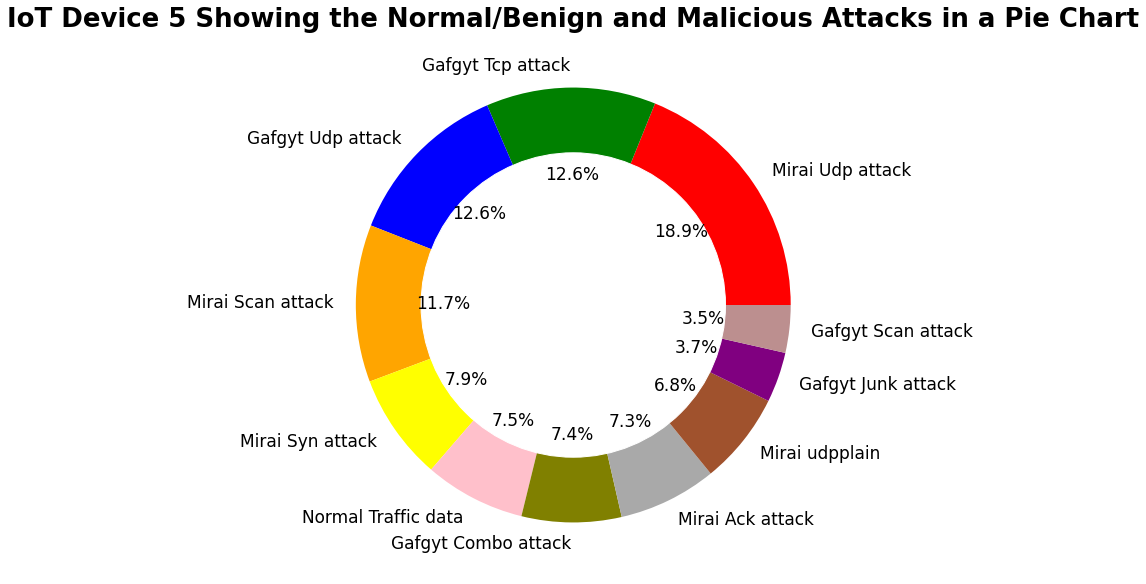

In [ ]:
"""
   Exploratory Data Analysis (EDA): - Dataset for IoT Device 5
"""
## Plot the data:

plt.figure(figsize = (20, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(d5['type'].value_counts(), labels=['Mirai Udp attack', 'Gafgyt Tcp attack', 'Gafgyt Udp attack', 'Mirai Scan attack', 'Mirai Syn attack', 'Normal Traffic data',
                                                    'Gafgyt Combo attack', 'Mirai Ack attack', 'Mirai udpplain', 'Gafgyt Junk attack', 'Gafgyt Scan attack'],
        colors=['red', 'green', 'blue', 'orange', 'yellow', 'pink', 'olive', 'darkgrey', 'sienna', 'purple', 'rosybrown'], autopct = '%1.1f%%', textprops={'fontsize': 17, })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('IoT Device 5 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 5 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_5B.png')
plt.show()

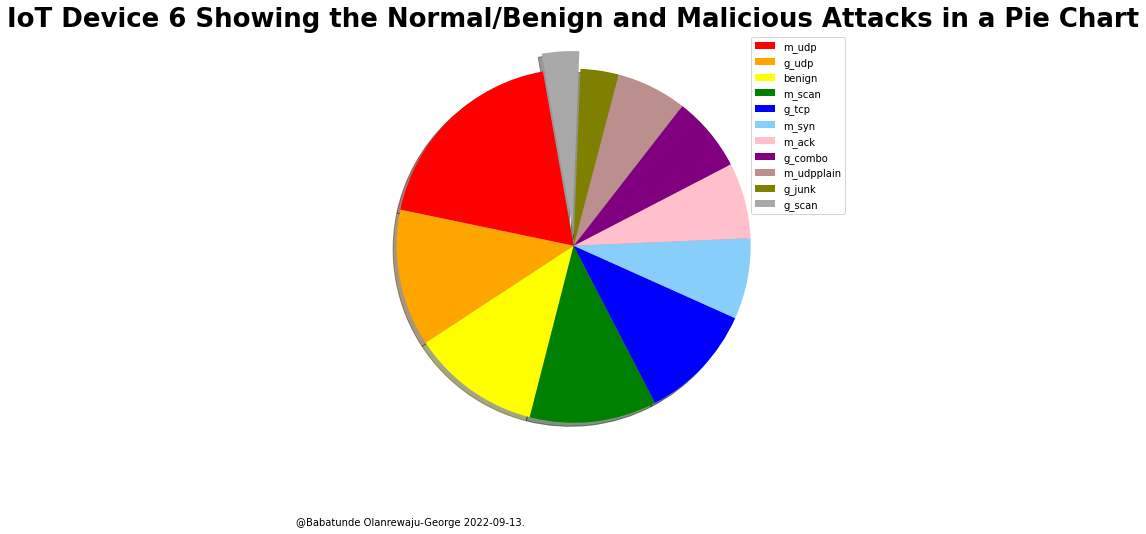

In [ ]:
# Load Dataset for IoT Device 6:
benign = pd.read_csv('/content/nbaiot-dataset/6.benign.csv')
benign.shape

# Botnet --> Mirai
# Attack --> Scan volnerable devices / Ack flooding / Syn flooding / UDP flooding / UDPplain

m_scan = pd.read_csv('/content/nbaiot-dataset/6.mirai.scan.csv')
m_ack = pd.read_csv('/content/nbaiot-dataset/6.mirai.ack.csv')
m_syn = pd.read_csv('/content/nbaiot-dataset/6.mirai.syn.csv')
m_udp = pd.read_csv('/content/nbaiot-dataset/6.mirai.udp.csv')
m_udpplain = pd.read_csv('/content/nbaiot-dataset/6.mirai.udpplain.csv')

#Botnet --> Gafgyt (BASHLITE)
#Attack --> Scan vulnerable devices / Sending spam / UDP flooding / TCP flooding / Sending spam & opening connection
g_scan = pd.read_csv('/content/nbaiot-dataset/6.gafgyt.scan.csv')
g_junk = pd.read_csv('/content/nbaiot-dataset/6.gafgyt.junk.csv')
g_udp = pd.read_csv('/content/nbaiot-dataset/6.gafgyt.udp.csv')
g_tcp = pd.read_csv('/content/nbaiot-dataset/6.gafgyt.tcp.csv')
g_combo = pd.read_csv('/content/nbaiot-dataset/6.gafgyt.combo.csv')

##Convert into one dataset
# add new column
benign['type'] = 'benign'
m_scan['type'] = 'm_scan'
m_ack['type'] = 'm_ack'
m_syn['type']  = 'm_syn'
m_udp['type'] = 'm_udp'
m_udpplain['type'] = 'm_udpplain'
g_combo['type'] = 'g_combo'
g_junk['type'] = 'g_junk'
g_scan['type'] = 'g_scan'
g_tcp['type'] = 'g_tcp'
g_udp['type'] = 'g_udp'

d = pd.concat([benign,m_scan,m_ack,m_syn,m_udp,m_udpplain,g_combo,g_junk,g_scan,g_tcp,g_udp], axis=0, sort=False, ignore_index=True)
d.shape

#value counts
labels = d['type'].value_counts()
label_count = pd.DataFrame({'labels': labels.index,'counts': labels.values})

# Plot the data:
labels = label_count['labels']
sizes = label_count['counts']
plt.figure(figsize=(8,6))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'lightskyblue', 'pink', 'purple', 'rosybrown', 'olive', 'darkgrey']
# colors = [1,2,3,4,5,6,7,8,9,10,11]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)
patches, texts = plt.pie(sizes, explode = explode, colors=colors, shadow=True, startangle=100, pctdistance=100, labeldistance=10)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('IoT Device 6 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 6 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_6A.png')
plt.show()

# Save the dataset
d.to_csv('/content/Device #6.csv')

# Load the data
d6 = pd.read_csv('/content/Device #6.csv')

In [ ]:
"""
   Visualize the Dataset for IoT Device 6:
"""
print(d6.info())
print(d6.shape)
print(d6.describe())
d6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836891 entries, 0 to 836890
Columns: 117 entries, Unnamed: 0 to type
dtypes: float64(115), int64(1), object(1)
memory usage: 747.0+ MB
None
(836891, 117)
          Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
count  836891.000000     836891.000000   836891.000000        8.368910e+05   
mean   418445.000000         64.946298      154.473108        1.701537e+04   
std    241589.766404         61.104935      139.099314        2.478295e+04   
min         0.000000          1.000000       60.000000        0.000000e+00   
25%    209222.500000          1.000000       60.000012        9.090000e-13   
50%    418445.000000         57.598617       74.009565        3.527870e+00   
75%    627667.500000        106.046318      230.491678        4.486814e+04   
max    836890.000000        379.917235      895.336451        4.918058e+05   

       MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  \
count     83

Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
0                0          1.000000       60.000000        0.000000e+00   
1                1          1.000000      590.000000        0.000000e+00   
2                2          1.956973      590.000000        5.820000e-11   
3                3          1.000000       60.000000        0.000000e+00   
4                4          1.988608       66.034372        3.599882e+01   
...            ...               ...             ...                 ...   
836886      836886          1.000000       60.000000        0.000000e+00   
836887      836887          1.000000       60.000000        0.000000e+00   
836888      836888          1.000000       60.000000        0.000000e+00   
836889      836889          1.000000       60.000000        0.000000e+00   
836890      836890          1.000000       60.000000        0.000000e+00   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
0               1.000000       60.000000            0.000000   
1               1.000000      590.000000            0.000000   
2               1.973957      590.000000            0.000000   
3               1.000000       60.000000            0.000000   
4               1.993149       66.020623           35.999575   
...                  ...             ...                 ...   
836886          1.000000       60.000000            0.000000   
836887          1.000000       60.000000            0.000000   
836888          1.000000       60.000000            0.000000   
836889          1.000000       60.000000            0.000000   
836890          1.000000       60.000000            0.000000   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  ...  \
0               1.000000       60.000000            0.000000  ...   
1               1.000000      590.000000            0.000000  ...   
2               1.991242      590.000000            0.000000  ...   
3               1.000000       60.000000            0.000000  ...   
4               1.997711       66.006874           35.999953  ...   
...                  ...             ...                 ...  ...   
836886          1.000000       60.000000            0.000000  ...   
836887          1.000000       60.000000            0.000000  ...   
836888          1.000000       60.000000            0.000000  ...   
836889          1.000000       60.000000            0.000000  ...   
836890          1.000000       60.000000            0.000000  ...   

        HpHp_L0.1_covariance  HpHp_L0.1_pcc  HpHp_L0.01_weight  \
0                        0.0            0.0           1.000000   
1                        0.0            0.0           4.456899   
2                        0.0            0.0           5.456507   
3                        0.0            0.0           1.000000   
4                        0.0            0.0           1.000000   
...                      ...            ...                ...   
836886                   0.0            0.0           1.000000   
836887                   0.0            0.0           1.000000   
836888                   0.0            0.0           1.000000   
836889                   0.0            0.0           1.000000   
836890                   0.0            0.0           1.000000   

        HpHp_L0.01_mean  HpHp_L0.01_std  HpHp_L0.01_magnitude  \
0             60.000000        0.000000             60.000000   
1            443.197258      121.885335            443.197258   
2            470.101420      123.932152            470.101420   
3             60.000000        0.000000             60.000000   
4             72.000000        0.000000             72.000000   
...                 ...             ...                   ...   
836886        60.000000        0.000000             60.000000   
836887        60.000000        0.000000             60.000000   
836888        60.000000        0.000000             60.000000   
836889        60.000000        0.000000             60

In [ ]:
# Dataset for IoT Device 6 Classes:
d6['type'].value_counts()

m_udp         158608
g_udp         104658
benign         98514
m_scan         97096
g_tcp          89387
m_syn          61851
m_ack          57997
g_combo        57530
m_udpplain     53785
g_junk         29068
g_scan         28397
Name: type, dtype: int64

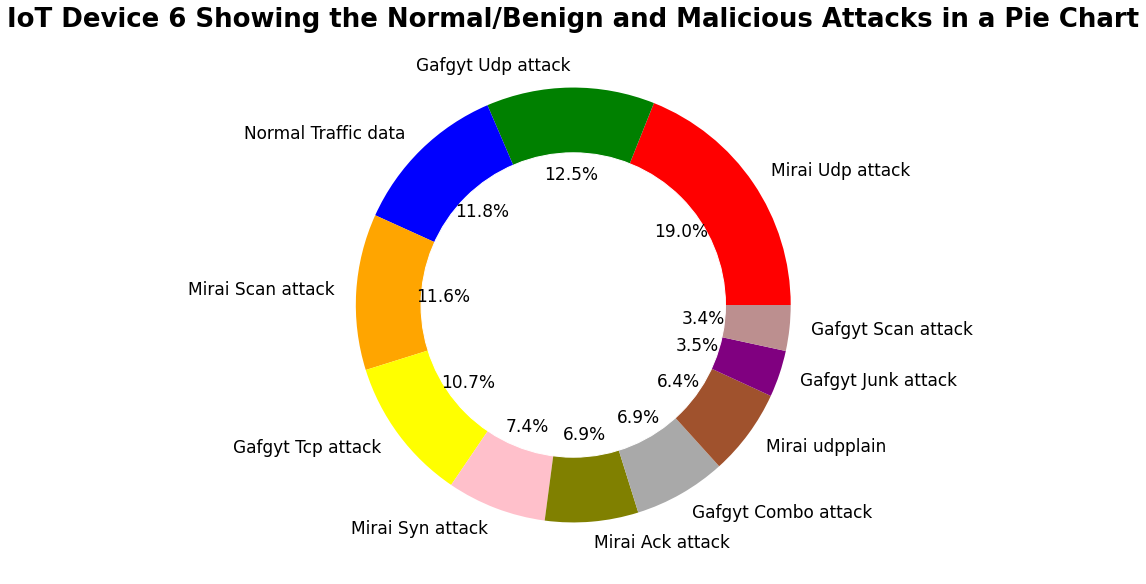

In [ ]:
"""
   Exploratory Data Analysis (EDA): - Dataset for IoT Device 6
"""
## Plot the data:

plt.figure(figsize = (20, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(d6['type'].value_counts(), labels=['Mirai Udp attack', 'Gafgyt Udp attack', 'Normal Traffic data', 'Mirai Scan attack', 'Gafgyt Tcp attack', 'Mirai Syn attack', 'Mirai Ack attack',
                                                   'Gafgyt Combo attack', 'Mirai udpplain', 'Gafgyt Junk attack', 'Gafgyt Scan attack'],
        colors=['red', 'green', 'blue', 'orange', 'yellow', 'pink', 'olive', 'darkgrey', 'sienna', 'purple', 'rosybrown'], autopct = '%1.1f%%', textprops={'fontsize': 17, })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('IoT Device 6 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 6 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_6B.png')
plt.show()

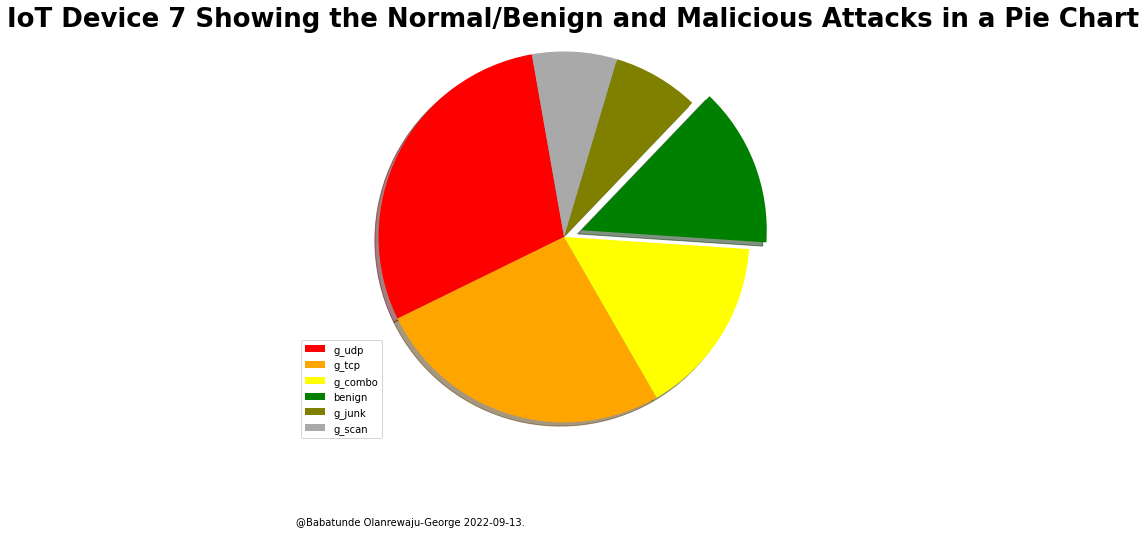

In [ ]:
# Load Dataset for IoT Device 7:
benign = pd.read_csv('/content/nbaiot-dataset/7.benign.csv')
benign.shape

#Botnet --> Gafgyt (BASHLITE)
#Attack --> Scan vulnerable devices / Sending spam / UDP flooding / TCP flooding / Sending spam & opening connection
g_scan = pd.read_csv('/content/nbaiot-dataset/7.gafgyt.scan.csv')
g_junk = pd.read_csv('/content/nbaiot-dataset/7.gafgyt.junk.csv')
g_udp = pd.read_csv('/content/nbaiot-dataset/7.gafgyt.udp.csv')
g_tcp = pd.read_csv('/content/nbaiot-dataset/7.gafgyt.tcp.csv')
g_combo = pd.read_csv('/content/nbaiot-dataset/7.gafgyt.combo.csv')

##Convert into one dataset
# add new column
benign['type'] = 'benign'
g_combo['type'] = 'g_combo'
g_junk['type'] = 'g_junk'
g_scan['type'] = 'g_scan'
g_tcp['type'] = 'g_tcp'
g_udp['type'] = 'g_udp'

d = pd.concat([benign,g_combo,g_junk,g_scan,g_tcp,g_udp], axis=0, sort=False, ignore_index=True)
d.shape

#value counts
labels = d['type'].value_counts()
label_count = pd.DataFrame({'labels': labels.index,'counts': labels.values})

# Plot the Data:
labels = label_count['labels']
sizes = label_count['counts']
plt.figure(figsize=(8,6))
colors = ['red', 'orange', 'yellow', 'green', 'olive', 'darkgrey']
# colors = [1,2,3,4,5,6,7,8,9,10,11]
explode = (0, 0, 0, 0.1, 0, 0)
patches, texts = plt.pie(sizes, explode = explode, colors=colors, shadow=True, startangle=100, pctdistance=100, labeldistance=10)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('IoT Device 7 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 7 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_7A.png')
plt.show()

# Save the dataset
d.to_csv('/content/Device #7.csv')

# Load the data
d7 = pd.read_csv('/content/Device #7.csv')

In [ ]:
"""
   Visualize the Dataset for IoT Device 7:
"""
print(d7.info())
print(d7.shape)
print(d7.describe())
d7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375222 entries, 0 to 375221
Columns: 117 entries, Unnamed: 0 to type
dtypes: float64(115), int64(1), object(1)
memory usage: 334.9+ MB
None
(375222, 117)
         Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
count  375222.00000     375222.000000   375222.000000       375222.000000   
mean   187610.50000         42.389824       94.741520          547.358505   
std    108317.40569         69.411217       95.291387         5478.276281   
min         0.00000          1.000000       60.000000            0.000000   
25%     93805.25000          1.000000       60.000000            0.000000   
50%    187610.50000          1.000000       60.000000            0.000000   
75%    281415.75000         67.525377       74.066985            1.279527   
max    375221.00000        304.382099     1187.194258       474036.374100   

       MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  \
count     375222.0000

Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
0                0          1.000000       60.000000            0.000000   
1                1          1.000000       70.000000            0.000000   
2                2          1.000008       89.999836            0.003289   
3                3          1.000000      322.000000            0.000000   
4                4          1.784845      328.723273           35.476876   
...            ...               ...             ...                 ...   
375217      375217          1.000000       60.000000            0.000000   
375218      375218          1.000000       60.000000            0.000000   
375219      375219          1.000000       60.000000            0.000000   
375220      375220          1.000000       60.000000            0.000000   
375221      375221          1.000000       60.000000            0.000000   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
0               1.000000       60.000000            0.000000   
1               1.000000       70.000000            0.000000   
2               1.000889       89.982231            0.355061   
3               1.000000      322.000000            0.000000   
4               1.864710      328.435318           35.810498   
...                  ...             ...                 ...   
375217          1.000000       60.000000            0.000000   
375218          1.000000       60.000000            0.000000   
375219          1.000000       60.000000            0.000000   
375220          1.000000       60.000000            0.000000   
375221          1.000000       60.000000            0.000000   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  ...  \
0               1.000000       60.000000            0.000000  ...   
1               1.000000       70.000000            0.000000  ...   
2               1.096162       88.245473           32.012169  ...   
3               1.000000      322.000000            0.000000  ...   
4               1.952701      328.145333           35.978878  ...   
...                  ...             ...                 ...  ...   
375217          1.000000       60.000000            0.000000  ...   
375218          1.000000       60.000000            0.000000  ...   
375219          1.000000       60.000000            0.000000  ...   
375220          1.000000       60.000000            0.000000  ...   
375221          1.000000       60.000000            0.000000  ...   

        HpHp_L0.1_covariance  HpHp_L0.1_pcc  HpHp_L0.01_weight  \
0                        0.0            0.0           1.000000   
1                        0.0            0.0           1.000000   
2                        0.0            0.0           1.000000   
3                        0.0            0.0          11.163562   
4                        0.0            0.0          12.158154   
...                      ...            ...                ...   
375217                   0.0            0.0           1.000000   
375218                   0.0            0.0           1.000000   
375219                   0.0            0.0           1.000000   
375220                   0.0            0.0           1.000000   
375221                   0.0            0.0           1.000000   

        HpHp_L0.01_mean  HpHp_L0.01_std  HpHp_L0.01_magnitude  \
0             60.000000        0.000000             60.000000   
1             70.000000        0.000000             70.000000   
2             90.000000        0.000000             90.000000   
3            380.087760       92.127549            380.087760   
4            376.297073       89.161260            376.297073   
...                 ...             ...                   ...   
375217        60.000000        0.000000             60.000000   
375218        60.000000        0.000000             60.000000   
375219        60.000000        0.000000             60.000000   
375220        60.000000        0.000000             60

In [ ]:
# Dataset for IoT Device 7 Classes:
d7['type'].value_counts()

g_udp      110617
g_tcp       97783
g_combo     58669
benign      52150
g_junk      28305
g_scan      27698
Name: type, dtype: int64

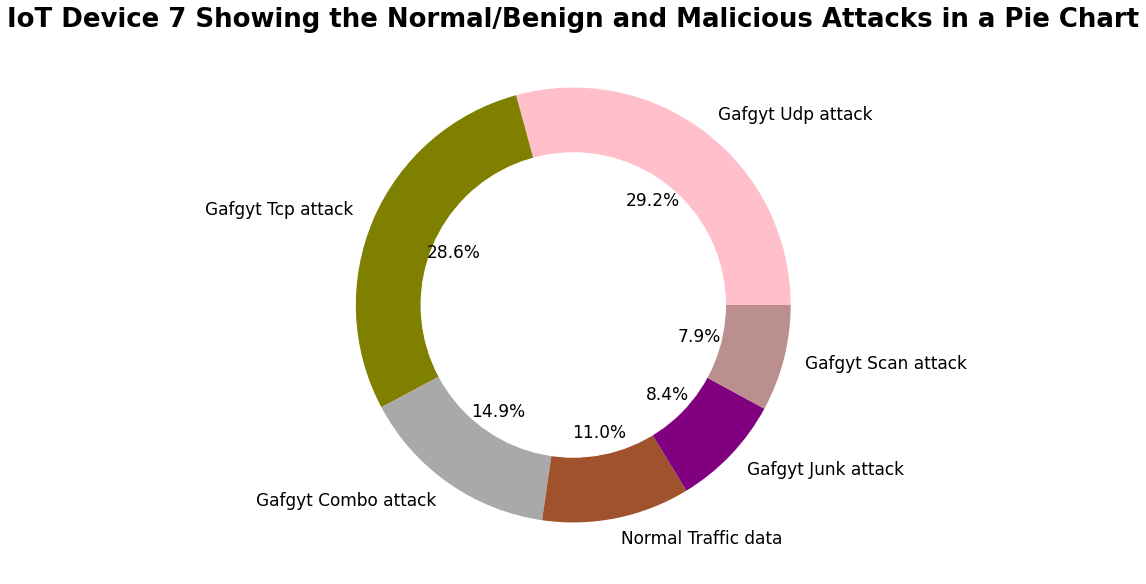

In [ ]:
"""
   Exploratory Data Analysis (EDA): - Dataset for IoT Device 7
"""
## Plot the data:

plt.figure(figsize = (20, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(d3['type'].value_counts(), labels=['Gafgyt Udp attack', 'Gafgyt Tcp attack', 'Gafgyt Combo attack', 'Normal Traffic data', 'Gafgyt Junk attack', 'Gafgyt Scan attack'],
        colors=['pink', 'olive', 'darkgrey', 'sienna', 'purple', 'rosybrown'], autopct = '%1.1f%%', textprops={'fontsize': 17, })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('IoT Device 7 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 7 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_7B.png')
plt.show()

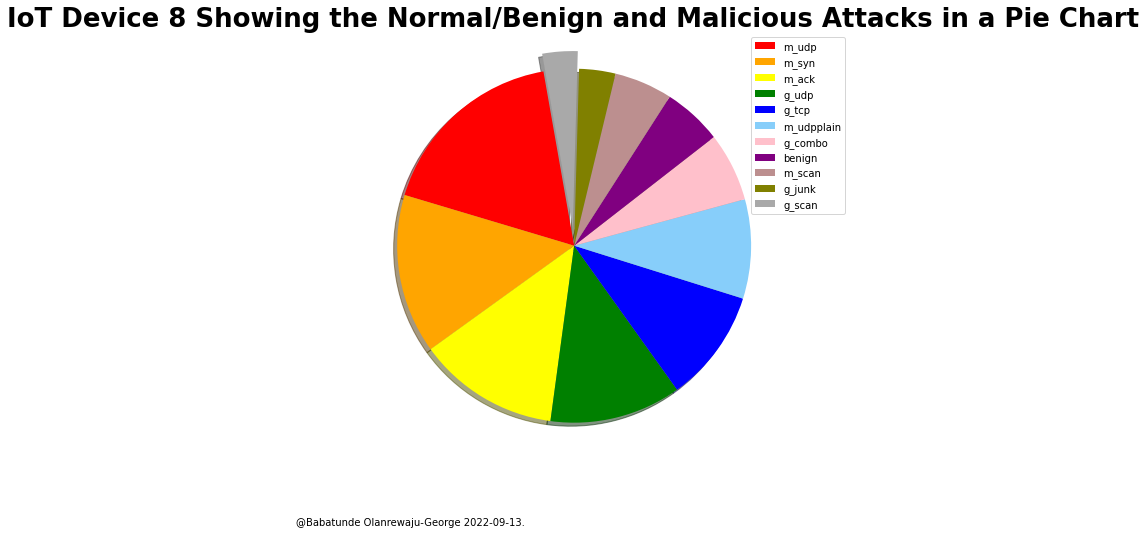

In [ ]:
# Load Dataset for IoT Device 8:
benign = pd.read_csv('/content/nbaiot-dataset/8.benign.csv')
benign.shape

# Botnet --> Mirai
# Attack --> Scan volnerable devices / Ack flooding / Syn flooding / UDP flooding / UDPplain

m_scan = pd.read_csv('/content/nbaiot-dataset/8.mirai.scan.csv')
m_ack = pd.read_csv('/content/nbaiot-dataset/8.mirai.ack.csv')
m_syn = pd.read_csv('/content/nbaiot-dataset/8.mirai.syn.csv')
m_udp = pd.read_csv('/content/nbaiot-dataset/8.mirai.udp.csv')
m_udpplain = pd.read_csv('/content/nbaiot-dataset/8.mirai.udpplain.csv')

#Botnet --> Gafgyt (BASHLITE)
#Attack --> Scan vulnerable devices / Sending spam / UDP flooding / TCP flooding / Sending spam & opening connection
g_scan = pd.read_csv('/content/nbaiot-dataset/8.gafgyt.scan.csv')
g_junk = pd.read_csv('/content/nbaiot-dataset/8.gafgyt.junk.csv')
g_udp = pd.read_csv('/content/nbaiot-dataset/8.gafgyt.udp.csv')
g_tcp = pd.read_csv('/content/nbaiot-dataset/8.gafgyt.tcp.csv')
g_combo = pd.read_csv('/content/nbaiot-dataset/8.gafgyt.combo.csv')

##Convert into one dataset
# add new column
benign['type'] = 'benign'
m_scan['type'] = 'm_scan'
m_ack['type'] = 'm_ack'
m_syn['type']  = 'm_syn'
m_udp['type'] = 'm_udp'
m_udpplain['type'] = 'm_udpplain'
g_combo['type'] = 'g_combo'
g_junk['type'] = 'g_junk'
g_scan['type'] = 'g_scan'
g_tcp['type'] = 'g_tcp'
g_udp['type'] = 'g_udp'

d = pd.concat([benign,m_scan,m_ack,m_syn,m_udp,m_udpplain,g_combo,g_junk,g_scan,g_tcp,g_udp], axis=0, sort=False, ignore_index=True)
d.shape

#value counts
labels = d['type'].value_counts()
label_count = pd.DataFrame({'labels': labels.index,'counts': labels.values})

# Plot the data:
labels = label_count['labels']
sizes = label_count['counts']
plt.figure(figsize=(8,6))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'lightskyblue', 'pink', 'purple', 'rosybrown', 'olive', 'darkgrey']
# colors = [1,2,3,4,5,6,7,8,9,10,11]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)
patches, texts = plt.pie(sizes, explode = explode, colors=colors, shadow=True, startangle=100, pctdistance=100, labeldistance=10)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('IoT Device 8 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 8 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_8A.png')
plt.show()

# Save the dataset
d.to_csv('/content/Device #8.csv')

# Load the data
d8 = pd.read_csv('/content/Device #8.csv')

In [ ]:
"""
   Visualize the Dataset for IoT Device 8:
"""
print(d8.info())
print(d8.shape)
print(d8.describe())
d8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863056 entries, 0 to 863055
Columns: 117 entries, Unnamed: 0 to type
dtypes: float64(115), int64(1), object(1)
memory usage: 770.4+ MB
None
(863056, 117)
        Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
count  863056.0000     863056.000000   863056.000000        8.630560e+05   
mean   431527.5000         95.647599      215.822009        1.576868e+04   
std    249142.9513         69.929327      185.181123        2.302820e+04   
min         0.0000          1.000000       60.000000        0.000000e+00   
25%    215763.7500          1.032189       60.000001        1.364242e-12   
50%    431527.5000        111.713037       74.049939        3.105711e+01   
75%    647291.2500        151.735929      393.493750        3.174771e+04   
max    863055.0000        438.002839      886.166851        1.738886e+05   

       MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  \
count     863056.000000   8630

Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
0                0          1.000000       60.000000            0.000000   
1                1          1.000000      322.000000            0.000000   
2                2          1.920484      328.248423           35.938286   
3                3          1.000000       60.000000            0.000000   
4                4          1.973903       71.145433          120.978849   
...            ...               ...             ...                 ...   
863051      863051          1.000000       60.000000            0.000000   
863052      863052          1.000000       60.000000            0.000000   
863053      863053          1.000000       60.000000            0.000000   
863054      863054          1.000000       60.000000            0.000000   
863055      863055          1.000000       60.000000            0.000000   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
0               1.000000       60.000000            0.000000   
1               1.000000      322.000000            0.000000   
2               1.951502      328.149109           35.977767   
3               1.000000       60.000000            0.000000   
4               1.984259       71.087263          120.992385   
...                  ...             ...                 ...   
863051          1.000000       60.000000            0.000000   
863052          1.000000       60.000000            0.000000   
863053          1.000000       60.000000            0.000000   
863054          1.000000       60.000000            0.000000   
863055          1.000000       60.000000            0.000000   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  ...  \
0               1.000000       60.000000            0.000000  ...   
1               1.000000      322.000000            0.000000  ...   
2               1.983566      328.049712           35.997529  ...   
3               1.000000       60.000000            0.000000  ...   
4               1.994725       71.029088          120.999154  ...   
...                  ...             ...                 ...  ...   
863051          1.000000       60.000000            0.000000  ...   
863052          1.000000       60.000000            0.000000  ...   
863053          1.000000       60.000000            0.000000  ...   
863054          1.000000       60.000000            0.000000  ...   
863055          1.000000       60.000000            0.000000  ...   

        HpHp_L0.1_covariance  HpHp_L0.1_pcc  HpHp_L0.01_weight  \
0                        0.0            0.0           1.000000   
1                        0.0            0.0           6.087070   
2                        0.0            0.0           7.086062   
3                        0.0            0.0           1.000000   
4                        0.0            0.0           1.000000   
...                      ...            ...                ...   
863051                   0.0            0.0           1.000000   
863052                   0.0            0.0           1.000000   
863053                   0.0            0.0           1.000000   
863054                   0.0            0.0           1.000000   
863055                   0.0            0.0           1.000000   

        HpHp_L0.01_mean  HpHp_L0.01_std  HpHp_L0.01_magnitude  \
0             60.000000        0.000000             60.000000   
1            338.794642        8.566964            338.794642   
2            338.118012        8.113068            338.118012   
3             60.000000        0.000000             60.000000   
4             82.000000        0.000000             82.000000   
...                 ...             ...                   ...   
863051        60.000000        0.000000             60.000000   
863052        60.000000        0.000000             60.000000   
863053        60.000000        0.000000             60.000000   
863054        60.000000        0.000000             60

In [ ]:
# Dataset for IoT Device 8 Classes:
d8['type'].value_counts()

m_udp         151879
m_syn         125715
m_ack         111480
g_udp         103720
g_tcp          88816
m_udpplain     78244
g_combo        54283
benign         46585
m_scan         45930
g_junk         28579
g_scan         27825
Name: type, dtype: int64

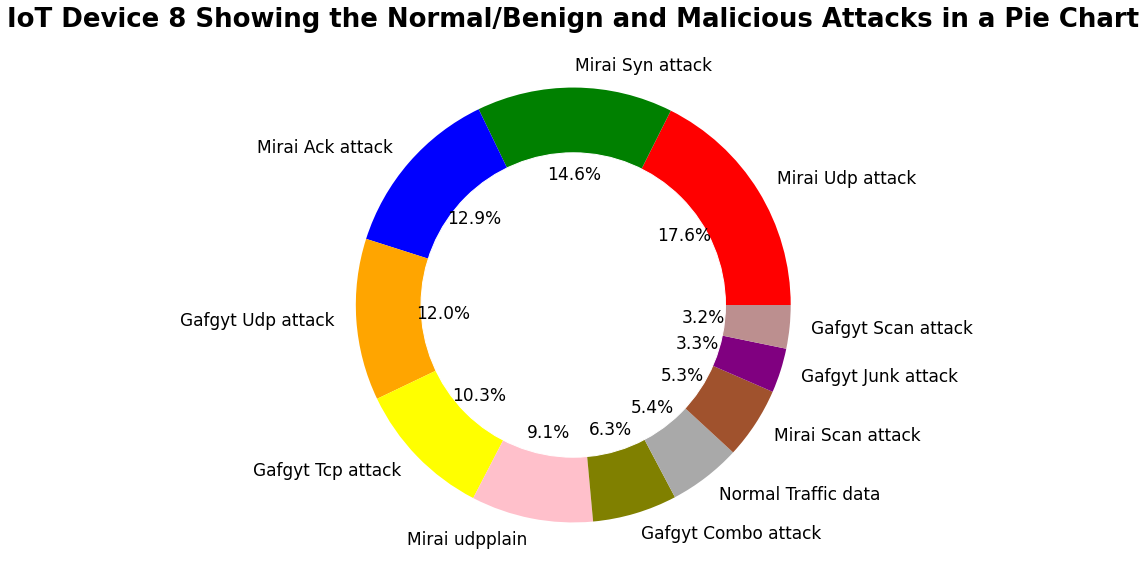

In [ ]:
"""
   Exploratory Data Analysis (EDA): - Dataset for IoT Device 8
"""
## Plot the data:

plt.figure(figsize = (20, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(d8['type'].value_counts(), labels=['Mirai Udp attack', 'Mirai Syn attack', 'Mirai Ack attack', 'Gafgyt Udp attack', 'Gafgyt Tcp attack',
                                                   'Mirai udpplain', 'Gafgyt Combo attack', 'Normal Traffic data', 'Mirai Scan attack', 'Gafgyt Junk attack', 'Gafgyt Scan attack'],
        colors=['red', 'green', 'blue', 'orange', 'yellow', 'pink', 'olive', 'darkgrey', 'sienna', 'purple', 'rosybrown'], autopct = '%1.1f%%', textprops={'fontsize': 17, })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('IoT Device 8 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 8 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_8B.png')
plt.show()

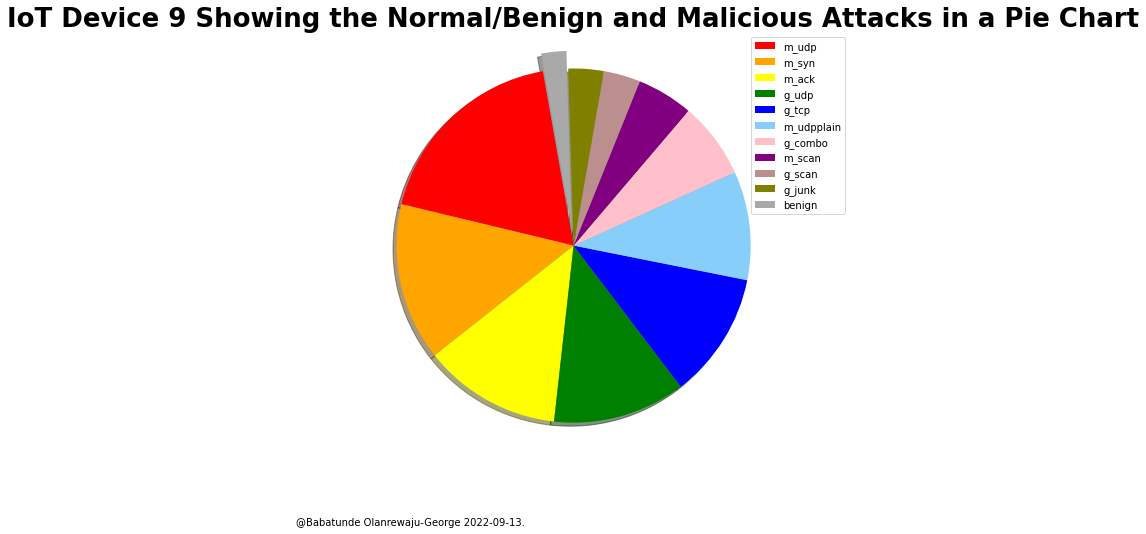

In [ ]:
# Load Dataset for IoT Device 9:
benign = pd.read_csv('/content/nbaiot-dataset/9.benign.csv')
benign.shape

# Botnet --> Mirai
# Attack --> Scan volnerable devices / Ack flooding / Syn flooding / UDP flooding / UDPplain

m_scan = pd.read_csv('/content/nbaiot-dataset/9.mirai.scan.csv')
m_ack = pd.read_csv('/content/nbaiot-dataset/9.mirai.ack.csv')
m_syn = pd.read_csv('/content/nbaiot-dataset/9.mirai.syn.csv')
m_udp = pd.read_csv('/content/nbaiot-dataset/9.mirai.udp.csv')
m_udpplain = pd.read_csv('/content/nbaiot-dataset/9.mirai.udpplain.csv')

#Botnet --> Gafgyt (BASHLITE)
#Attack --> Scan vulnerable devices / Sending spam / UDP flooding / TCP flooding / Sending spam & opening connection
g_scan = pd.read_csv('/content/nbaiot-dataset/9.gafgyt.scan.csv')
g_junk = pd.read_csv('/content/nbaiot-dataset/9.gafgyt.junk.csv')
g_udp = pd.read_csv('/content/nbaiot-dataset/9.gafgyt.udp.csv')
g_tcp = pd.read_csv('/content/nbaiot-dataset/9.gafgyt.tcp.csv')
g_combo = pd.read_csv('/content/nbaiot-dataset/9.gafgyt.combo.csv')

##Convert into one dataset
# add new column
benign['type'] = 'benign'
m_scan['type'] = 'm_scan'
m_ack['type'] = 'm_ack'
m_syn['type']  = 'm_syn'
m_udp['type'] = 'm_udp'
m_udpplain['type'] = 'm_udpplain'
g_combo['type'] = 'g_combo'
g_junk['type'] = 'g_junk'
g_scan['type'] = 'g_scan'
g_tcp['type'] = 'g_tcp'
g_udp['type'] = 'g_udp'

d = pd.concat([benign,m_scan,m_ack,m_syn,m_udp,m_udpplain,g_combo,g_junk,g_scan,g_tcp,g_udp], axis=0, sort=False, ignore_index=True)
d.shape

#value counts
labels = d['type'].value_counts()
label_count = pd.DataFrame({'labels': labels.index,'counts': labels.values})

# Plot the data:
labels = label_count['labels']
sizes = label_count['counts']
plt.figure(figsize=(8,6))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'lightskyblue', 'pink', 'purple', 'rosybrown', 'olive', 'darkgrey']
# colors = [1,2,3,4,5,6,7,8,9,10,11]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)
patches, texts = plt.pie(sizes, explode = explode, colors=colors, shadow=True, startangle=100, pctdistance=100, labeldistance=10)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('IoT Device 9 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 9 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_9A.png')
plt.show()

# Save the dataset
d.to_csv('/content/Device #9.csv')

# Load the data
d9 = pd.read_csv('/content/Device #9.csv')

In [ ]:
"""
   Visualize the Dataset for IoT Device 9:
"""
print(d9.info())
print(d9.shape)
print(d9.describe())
d9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850826 entries, 0 to 850825
Columns: 117 entries, Unnamed: 0 to type
dtypes: float64(115), int64(1), object(1)
memory usage: 759.5+ MB
None
(850826, 117)
          Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
count  850826.000000     850826.000000   850826.000000        8.508260e+05   
mean   425412.500000         98.267421      217.703235        1.630061e+04   
std    245612.454404         69.820806      186.657549        2.324521e+04   
min         0.000000          1.000000       60.000000        0.000000e+00   
25%    212706.250000          1.000021       60.000000        4.547474e-13   
50%    425412.500000        113.937651       74.036305        3.333553e+01   
75%    638118.750000        153.322975      399.601699        3.396891e+04   
max    850825.000000        438.002839      886.166851        1.738886e+05   

       MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  \
count     85

Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
0                0          1.000000            60.0                 0.0   
1                1          1.000000            60.0                 0.0   
2                2          1.000000            60.0                 0.0   
3                3          1.000000           590.0                 0.0   
4                4          1.927179           590.0                 0.0   
...            ...               ...             ...                 ...   
850821      850821          1.000000            60.0                 0.0   
850822      850822          1.000000            60.0                 0.0   
850823      850823          1.000000            60.0                 0.0   
850824      850824          1.000000            60.0                 0.0   
850825      850825          1.000000            60.0                 0.0   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
0               1.000000            60.0                 0.0   
1               1.000000            60.0                 0.0   
2               1.000000            60.0                 0.0   
3               1.000000           590.0                 0.0   
4               1.955648           590.0                 0.0   
...                  ...             ...                 ...   
850821          1.000000            60.0                 0.0   
850822          1.000000            60.0                 0.0   
850823          1.000000            60.0                 0.0   
850824          1.000000            60.0                 0.0   
850825          1.000000            60.0                 0.0   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  ...  \
0               1.000000            60.0                 0.0  ...   
1               1.000000            60.0                 0.0  ...   
2               1.000000            60.0                 0.0  ...   
3               1.000000           590.0                 0.0  ...   
4               1.984992           590.0                 0.0  ...   
...                  ...             ...                 ...  ...   
850821          1.000000            60.0                 0.0  ...   
850822          1.000000            60.0                 0.0  ...   
850823          1.000000            60.0                 0.0  ...   
850824          1.000000            60.0                 0.0  ...   
850825          1.000000            60.0                 0.0  ...   

        HpHp_L0.1_covariance  HpHp_L0.1_pcc  HpHp_L0.01_weight  \
0                        0.0            0.0           1.000000   
1                        0.0            0.0           1.061357   
2                        0.0            0.0           1.000000   
3                        0.0            0.0           5.832783   
4                        0.0            0.0           6.831901   
...                      ...            ...                ...   
850821                   0.0            0.0           1.000000   
850822                   0.0            0.0           1.000000   
850823                   0.0            0.0           1.000000   
850824                   0.0            0.0           1.000000   
850825                   0.0            0.0           1.000000   

        HpHp_L0.01_mean  HpHp_L0.01_std  HpHp_L0.01_magnitude  \
0             60.000000    0.000000e+00             60.000000   
1             60.000000    9.540000e-07             60.000000   
2             60.000000    0.000000e+00             60.000000   
3            388.850426    9.199164e+01            388.850426   
4            418.293119    1.108120e+02            418.293119   
...                 ...             ...                   ...   
850821        60.000000    0.000000e+00             60.000000   
850822        60.000000    0.000000e+00             60.000000   
850823        60.000000    0.000000e+00             60.000000   
850824        60.000000    0.000000e+00             60

In [ ]:
# Dataset for IoT Device 9 Classes:
d9['type'].value_counts()

m_udp         157084
m_syn         122479
m_ack         107187
g_udp         102980
g_tcp          98075
m_udpplain     84436
g_combo        59398
m_scan         43674
g_scan         28572
g_junk         27413
benign         19528
Name: type, dtype: int64

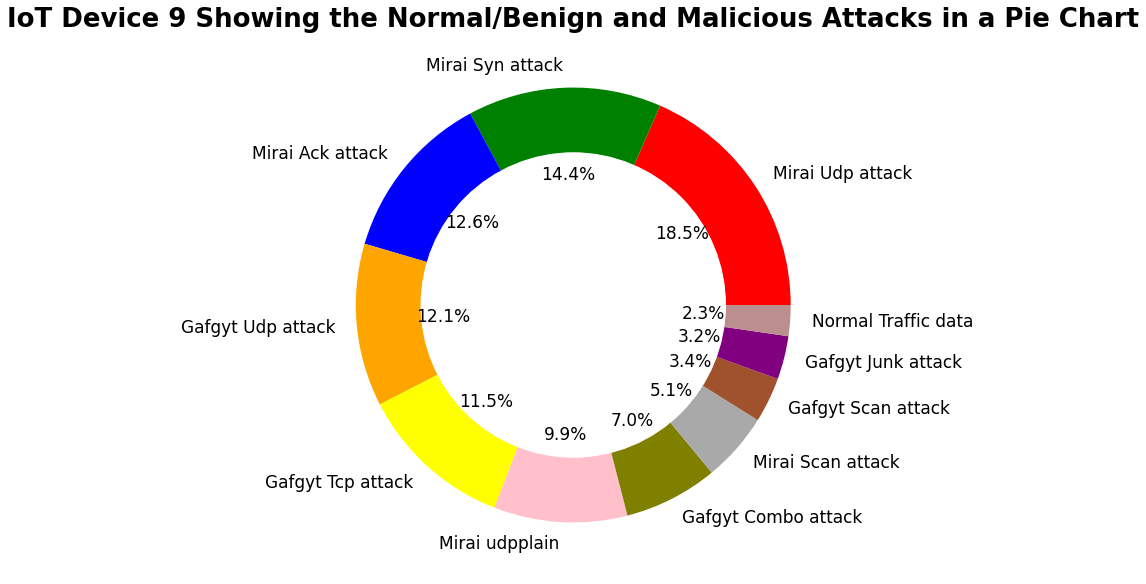

In [ ]:
"""
   Exploratory Data Analysis (EDA): - Dataset for IoT Device 9
"""
## Plot the data:

plt.figure(figsize = (20, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(d9['type'].value_counts(), labels=['Mirai Udp attack', 'Mirai Syn attack', 'Mirai Ack attack', 'Gafgyt Udp attack', 'Gafgyt Tcp attack',
                                                   'Mirai udpplain', 'Gafgyt Combo attack', 'Mirai Scan attack', 'Gafgyt Scan attack', 'Gafgyt Junk attack', 'Normal Traffic data'],
        colors=['red', 'green', 'blue', 'orange', 'yellow', 'pink', 'olive', 'darkgrey', 'sienna', 'purple', 'rosybrown'], autopct = '%1.1f%%', textprops={'fontsize': 17, })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('IoT Device 9 Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 26, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('IoT Device 9 Showing the Normal-Benign and Malicious Attacks in a Pie Chart_9B.png')
plt.show()

In [ ]:
"""
   Concatenate All 9 Devices Data
"""

All_Device_Data = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9], axis=0, sort=False, ignore_index=True)

"""
   Visualize all the 9 IoT Devices:
"""
print(All_Device_Data.info())
print(All_Device_Data.shape)
print(All_Device_Data.describe())
All_Device_Data

# Dataset for all 9 IoT Devices Classes:
All_Device_Data['type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7062606 entries, 0 to 7062605
Columns: 117 entries, Unnamed: 0 to type
dtypes: float64(115), int64(1), object(1)
memory usage: 6.2+ GB
None
(7062606, 117)
         Unnamed: 0  MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
count  7.062606e+06      7.062606e+06    7.062606e+06        7.062606e+06   
mean   4.293774e+05      8.168001e+01    1.787253e+02        1.546414e+04   
std    2.722727e+05      6.894208e+01    1.653134e+02        2.410819e+04   
min    0.000000e+00      1.000000e+00    6.000000e+01        0.000000e+00   
25%    1.961830e+05      1.000000e+00    6.000000e+01        0.000000e+00   
50%    4.000825e+05      9.133941e+01    7.400975e+01        5.630810e+00   
75%    6.523180e+05      1.415606e+02    3.140587e+02        3.351639e+04   
max    1.098676e+06      4.380028e+02    1.452697e+03        4.918058e+05   

       MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  \
count      7.062606e

m_udp         1229999
g_udp          946366
g_tcp          859850
m_syn          733299
m_ack          643821
benign         555932
m_scan         537979
m_udpplain     523304
g_combo        515156
g_junk         261789
g_scan         255111
Name: type, dtype: int64

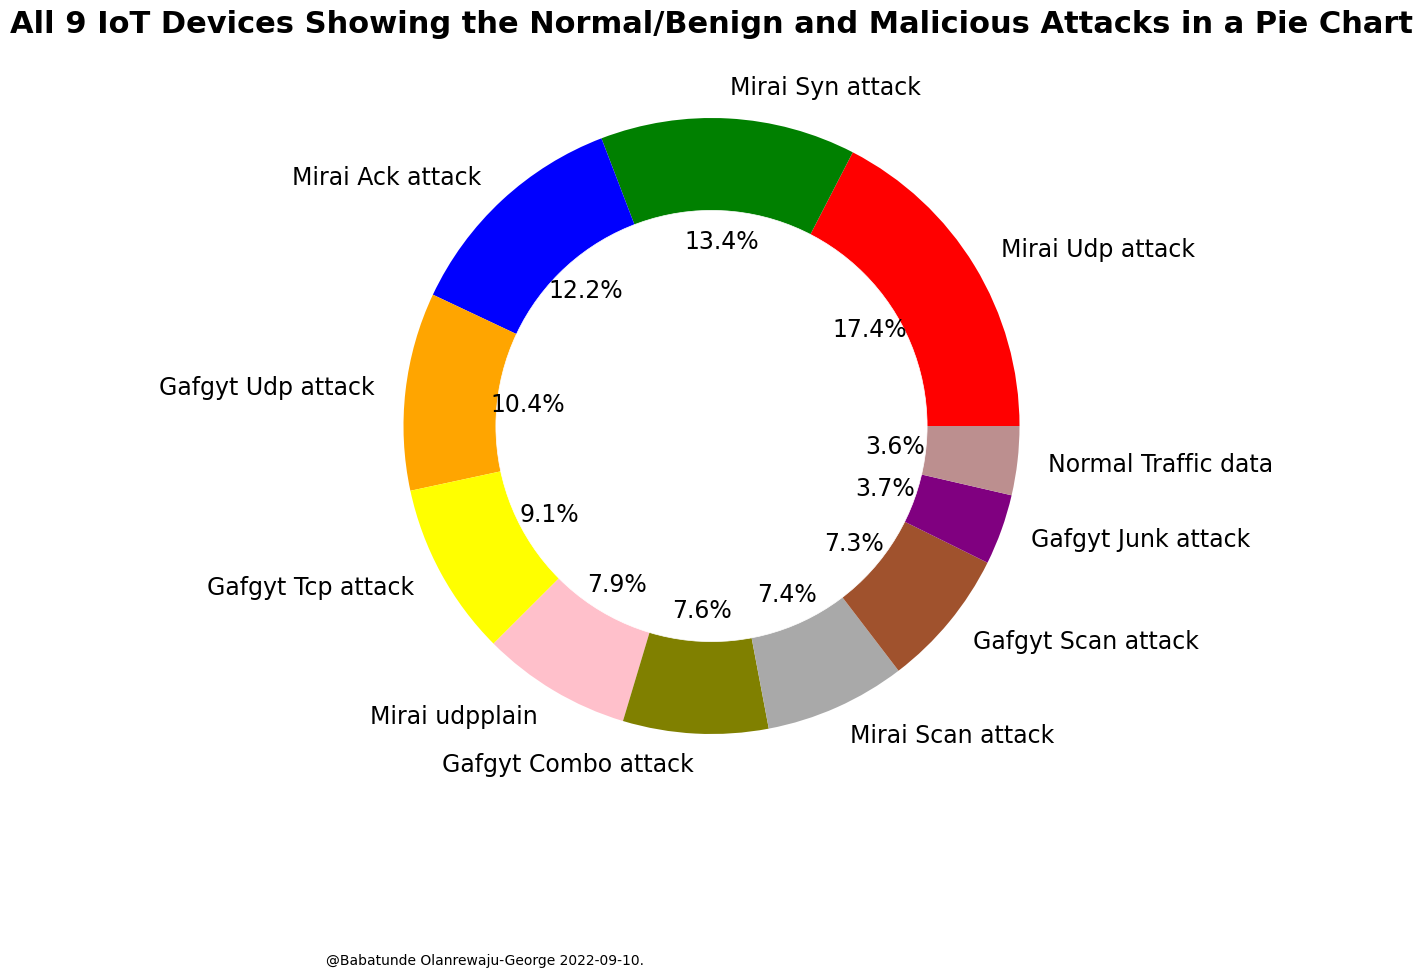

In [ ]:
"""
   Exploratory Data Analysis (EDA): - All Dataset for the 9 IoT Devices
"""
## Plot the data:

plt.figure(figsize = (20, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(All_Device_Data['type'].value_counts(), labels=['Mirai Udp attack', 'Mirai Syn attack', 'Mirai Ack attack', 'Gafgyt Udp attack', 'Gafgyt Tcp attack',
                                                   'Mirai udpplain', 'Gafgyt Combo attack', 'Mirai Scan attack', 'Gafgyt Scan attack', 'Gafgyt Junk attack', 'Normal Traffic data'],
        colors=['red', 'green', 'blue', 'orange', 'yellow', 'pink', 'olive', 'darkgrey', 'sienna', 'purple', 'rosybrown'], autopct = '%1.1f%%', textprops={'fontsize': 17, })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('All 9 IoT Devices Showing the Normal/Benign and Malicious Attacks in a Pie Chart', size = 22, fontweight='bold')
plt.annotate(f"@Babatunde Olanrewaju-George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig('All 9 IoT Devices Showing the Normal-Benign and Malicious Attacks in a Pie Chart_9B.png')
plt.show()

In [ ]:
#value counts

labels = All_Device_Data['type'].value_counts()
label_count = pd.DataFrame({'labels': labels.index,'counts': labels.values})

# Plot the Gender Data:

labels = label_count['labels']
sizes = label_count['counts']

total_runs = label_count.counts.sum()

# compute percentage of each format
percentage = []
for i in range(label_count.shape[0]):
    pct = (label_count.counts[i] / total_runs) * 100
    percentage.append(round(pct,2))
label_count['Percentage'] = percentage

label_count

labels   counts  Percentage
0        m_udp  1229999       17.42
1        g_udp   946366       13.40
2        g_tcp   859850       12.17
3        m_syn   733299       10.38
4        m_ack   643821        9.12
5       benign   555932        7.87
6       m_scan   537979        7.62
7   m_udpplain   523304        7.41
8      g_combo   515156        7.29
9       g_junk   261789        3.71
10      g_scan   255111        3.61

<Figure size 640x480 with 0 Axes>

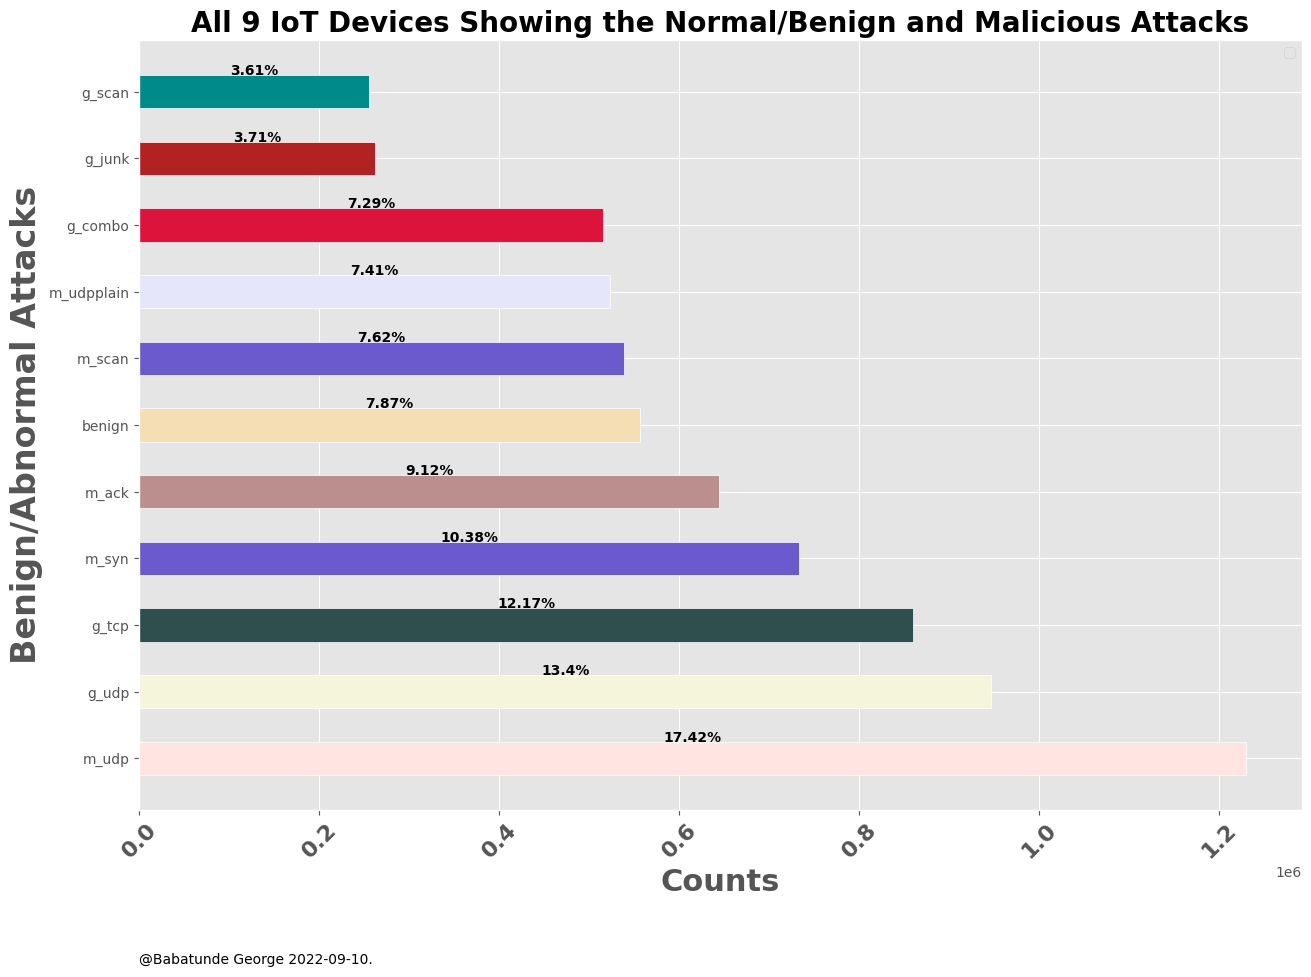

In [ ]:
# side-by-side bar plots

plt.rcdefaults()
today = date.today()
width = 0.5
plt.clf()
plt.figure(figsize = (15, 10), facecolor=(1, 1, 1))
plt.style.use('ggplot')
colors = ["mistyrose", "beige", "darkslategray", "slateblue", "rosybrown", "wheat", "slateblue", "lavender", "crimson", "firebrick", "darkcyan"]
graph = plt.barh(labels, sizes, width, edgecolor='white', color = colors)
plt.xlabel("Counts", weight='bold').set_fontsize('22')
plt.ylabel("Benign/Abnormal Attacks", weight='bold').set_fontsize('24')
plt.xticks(rotation=45, size = 16, fontweight='bold')
plt.title("All 9 IoT Devices Showing the Normal/Benign and Malicious Attacks", size = 20, fontweight='bold')


i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(label_count.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1

_ = plt.legend(loc = 'best', bbox_to_anchor = (1.0, 1.0), ncol = 1, frameon=True, fontsize = '10')
plt.grid(True)
plt.annotate(f"@Babatunde George {today}.",
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.20), textcoords='axes fraction',
             color='black')
plt.savefig("All 9 IoT Devices Showing the Normal_Benign and Malicious Attacks.png")

In [ ]:
"""
   B. Data Pre-processing:
"""
def pre_processing(data):
    data = data.drop(data.columns[0], axis=1) # Drop the first column

    benign = data[data['type'] == 'benign'] # take benign data only
    benign = benign.drop('type', 1) # drop column 'type'
    benign['type'] = 0 # bring back the column 'type' and equal it to 0

    abnormal = data[data['type'] != 'benign'] # take those data that are not benign
    abnormal = abnormal.drop('type', 1) # drop column 'type'
    abnormal['type'] = 1 # bring back the column 'type' and equal it to 1

    # split benign data evenly into three parts - 33.33% each for train, tr, and test
    benign_train, benign_tr, benign_test = np.split(benign, [int((1/3)*len(benign)), int((2/3)*len(benign))])
    benign_test_mix = benign_test.copy()    # create a copy of the benign_test data

    train_label = benign_train['type'] # obtain the train label - 0

    benign_train = benign_train.drop('type', axis=1) # drop the column 'type'
    benign_tr = benign_tr.drop('type', axis=1) # drop the column 'type'

    # Create Mix data
    abnormal_sample = abnormal.sample(frac = 1) # return a random sample of abnormal data
    mix_temp = pd.concat([benign_test_mix, abnormal_sample]) # concatenate benign_test_mix and abnormal_sample data
    mix_temp = shuffle(mix_temp, random_state = 1)  # shuffle the mixed data

    mix = mix_temp.copy() # create a copy of the mixed data
    mix_data = mix_temp.drop('type', axis=1) # drop the column 'type'
    mix_label = mix['type'] # column 'type' is taken as the label/target

    # Standardization - Scale the data between 0 and 1
    scaler = StandardScaler()
    benign_train = scaler.fit_transform(benign_train) # scale the benign train data
    benign_tr = scaler.transform(benign_tr) # scale the benign data for calculating the threshold
    mix_data = scaler.transform(mix_data) # scale the benign and abnormal data concatenated for evaluation

    # Convert to tensor and load the benign_tr, mix_data, and mix_label data to device and
    # keep the benign_train as original for later use
    benign_tr = torch.from_numpy(np.array(benign_tr)).float().to(device)
    mix_data = torch.from_numpy(np.array(mix_data)).float().to(device)
    mix_label = torch.tensor(np.array(mix_label))
    train_label = torch.tensor(np.array(train_label))

    return benign_train, benign_tr, mix_data, mix_label, train_label

In [ ]:
"""
    B. Data Pre-processing - Generate data to test the device for Federated Modeling:
"""
def other_pre_processing(data):
    data = data.drop(data.columns[0], axis=1)

    benign = data[data['type'] == 'benign']
    benign = benign.drop('type', 1)
    benign['type'] = 0

    abnormal = data[data['type'] != 'benign']
    abnormal = abnormal.drop('type', 1)
    abnormal['type'] = 1

    # split benign data to two parts - this is the main difference between the two Pre-processing method.
    benign_tr, benign_test = train_test_split(benign, test_size = 0.2, random_state = 5703)
    benign_tr = benign_tr.drop('type', axis=1)

    # Create Mix data
    abnormal_sample = abnormal.sample(frac = 1)
    mix_temp = pd.concat([benign_test, abnormal_sample])
    mix_temp = shuffle(mix_temp, random_state=1)

    mix = mix_temp.copy()
    mix_data = mix_temp.drop('type', axis=1)
    mix_label = mix['type']

    # Standardisation
    scaler = StandardScaler()
    benign_tr = scaler.fit_transform(benign_tr)
    mix_data = scaler.transform(mix_data)

    benign_tr = torch.from_numpy(np.array(benign_tr)).float().to(device)
    mix_data = torch.from_numpy(np.array(mix_data)).float().to(device)
    mix_label = torch.tensor(np.array(mix_label))

    return benign_tr, mix_data, mix_label

In [ ]:
"""
   Pre-process the data for Federated Model training
"""
benign_train_1, benign_tr_1, mix_data_1, mix_label_1, train_label_1 = pre_processing(d1)
benign_train_2, benign_tr_2, mix_data_2, mix_label_2, train_label_2 = pre_processing(d2)
benign_train_3, benign_tr_3, mix_data_3, mix_label_3, train_label_3 = pre_processing(d3)
benign_train_4, benign_tr_4, mix_data_4, mix_label_4, train_label_4 = pre_processing(d4)
benign_train_5, benign_tr_5, mix_data_5, mix_label_5, train_label_5 = pre_processing(d5)
benign_train_6, benign_tr_6, mix_data_6, mix_label_6, train_label_6 = pre_processing(d6)
benign_train_7, benign_tr_7, mix_data_7, mix_label_7, train_label_7 = pre_processing(d7)
benign_train_8, benign_tr_8, mix_data_8, mix_label_8, train_label_8 = pre_processing(d8)
benign_train_9, benign_tr_9, mix_data_9, mix_label_9, train_label_9 = pre_processing(d9)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument

In [ ]:
"""
   Pre-process the data for Non-Federated Model training
"""
#benign_train_all, benign_tr_all, mix_data_all, mix_label_all, train_label_all = pre_processing(All_Device_Data)

'\n   Pre-process the data for Non-Federated Model training\n'

In [ ]:
"""
    Print the shape of the data:
"""
x = ''
print(f'The Benign training data for device 1 is:', benign_train_1.shape)
print(f'The Benign training label data for device 1 is:', train_label_1.shape)
print(f'The benign training data for device 1 for calcluting Threshold is:', benign_tr_1.shape)
print(f'The Mixed data for device 1 for Model Evaluation is:', mix_data_1.shape)
print(f'The Mixed label data for device 1 for Model Evaluation is:', mix_label_1.shape)

print(x)

print(f'The Benign training data for device 2 is:', benign_train_2.shape)
print(f'The Benign training label data for device 2 is:', train_label_2.shape)
print(f'The benign training data for device 2 for calcluting Threshold is:', benign_tr_2.shape)
print(f'The Mixed data for device 2 for Model Evaluation is:', mix_data_2.shape)
print(f'The Mixed label data for device 2 for Model Evaluation is:', mix_label_2.shape)

print(x)

print(f'The Benign training data for device 3 is:', benign_train_3.shape)
print(f'The Benign training label data for device 3 is:', train_label_3.shape)
print(f'The benign training data for device 3 for calcluting Threshold is:', benign_tr_3.shape)
print(f'The Mixed data for for device 3 Model Evaluation is:', mix_data_3.shape)
print(f'The Mixed label data for device 3 for Model Evaluation is:', mix_label_3.shape)

print(x)

print(f'The Benign training data for device 4 is:', benign_train_4.shape)
print(f'The Benign training label data for device 4 is:', train_label_4.shape)
print(f'The benign training data for device 4 for calcluting Threshold is:', benign_tr_4.shape)
print(f'The Mixed data for for device 4 Model Evaluation is:', mix_data_4.shape)
print(f'The Mixed label data for device 4 for Model Evaluation is:', mix_label_4.shape)

print(x)

print(f'The Benign training data for device 5 is:', benign_train_5.shape)
print(f'The Benign training label data for device 5 is:', train_label_5.shape)
print(f'The benign training data for device 5 for calcluting Threshold is:', benign_tr_5.shape)
print(f'The Mixed data for for device 5 Model Evaluation is:', mix_data_5.shape)
print(f'The Mixed label data for device 5 for Model Evaluation is:', mix_label_5.shape)

print(x)

print(f'The Benign training data for device 6 is:', benign_train_6.shape)
print(f'The Benign training label data for device 6 is:', train_label_6.shape)
print(f'The benign training data for device 6 for calcluting Threshold is:', benign_tr_6.shape)
print(f'The Mixed data for for device 6 Model Evaluation is:', mix_data_6.shape)
print(f'The Mixed label data for device 6 for Model Evaluation is:', mix_label_6.shape)

print(x)

print(f'The Benign training data for device 7 is:', benign_train_7.shape)
print(f'The Benign training label data for device 7 is:', train_label_7.shape)
print(f'The benign training data for device 7 for calcluting Threshold is:', benign_tr_7.shape)
print(f'The Mixed data for device 7 for Model Evaluation is:', mix_data_7.shape)
print(f'The Mixed label data for device 7 for Model Evaluation is:', mix_label_7.shape)

print(x)

print(f'The Benign training data for device 8 is:', benign_train_8.shape)
print(f'The Benign training label data for device 8 is:', train_label_8.shape)
print(f'The benign training data for device 8 for calcluting Threshold is:', benign_tr_8.shape)
print(f'The Mixed data for for device 8 Model Evaluation is:', mix_data_8.shape)
print(f'The Mixed label data for device 8 for Model Evaluation is:', mix_label_8.shape)

print(x)

print(f'The Benign training data for device 9 is:', benign_train_9.shape)
print(f'The Benign training label data for device 9 is:', train_label_9.shape)
print(f'The benign training data for device 9 for calcluting Threshold is:', benign_tr_9.shape)
print(f'The Mixed data for for device 9 Model Evaluation is:', mix_data_9.shape)
print(f'The Mixed label data for device 9 for Model Evaluation is:', mix_label_9.shape)

The Benign training data for device 1 is: (16516, 115)
The Benign training label data for device 1 is: torch.Size([16516])
The benign training data for device 1 for calcluting Threshold is: torch.Size([16516, 115])
The Mixed data for device 1 for Model Evaluation is: torch.Size([985266, 115])
The Mixed label data for device 1 for Model Evaluation is: torch.Size([985266])

The Benign training data for device 2 is: (4371, 115)
The Benign training label data for device 2 is: torch.Size([4371])
The benign training data for device 2 for calcluting Threshold is: torch.Size([4371, 115])
The Mixed data for device 2 for Model Evaluation is: torch.Size([827134, 115])
The Mixed label data for device 2 for Model Evaluation is: torch.Size([827134])

The Benign training data for device 3 is: (13033, 115)
The Benign training label data for device 3 is: torch.Size([13033])
The benign training data for device 3 for calcluting Threshold is: torch.Size([13033, 115])
The Mixed data for for device 3 Model 

In [ ]:
"""
   Data Augmentation - Benign Traning Data for Device 1

   Since our data in biased, we need to use data argumentation on it so that we can remove bias from data and make equal distributions.
"""

#print(benign_train_1.info())
#print(benign_train_1.shape)
#print(benign_train_1.describe())
#benign_train_1

# Dataset for IoT Device 1 Classes:
#benign_train_1['type'].value_counts()

'\n   Data Augmentation - Benign Traning Data for Device 1\n\n   Since our data in biased, we need to use data argumentation on it so that we can remove bias from data and make equal distributions.\n'

In [ ]:
"""
    Build the DL Models - Deep Auto-Encoder (AE):
"""
## Deep Auto-Encoder model

input_dim = 115
class AEModel(nn.Module):
    def __init__(self):
        super(AEModel,self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, int(0.75*input_dim)),
            nn.Tanh(),
            nn.Linear(int(0.75*input_dim), int(0.5*input_dim)),
            nn.Tanh(),
            nn.Linear(int(0.5*input_dim), int(0.33*input_dim)),
            nn.Tanh(),
            nn.Linear(int(0.33*input_dim), int(0.25*input_dim)),
            nn.Tanh(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(int(0.25*input_dim), int(0.33*input_dim)),
            nn.Tanh(),
            nn.Linear(int(0.33*input_dim), int(0.5*input_dim)),
            nn.Tanh(),
            nn.Linear(int(0.5*input_dim), int(0.75*input_dim)),
            nn.Tanh(),
            nn.Linear(int(0.75*input_dim), int(input_dim)),
            nn.Tanh(),
        )
    def forward(self, x):
        encode = self.encoder(x)
        decoder = self.decoder(encode)
        return decoder

In [ ]:
from typing_extensions import Self
"""
    Build the DL Models - CNN MODEL:
"""

## Define the Sigmoid Linear Unit function also known as the Swish function, instead of using the ReLU function (Novelty)
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

## Define the Convolutional Skip-Connection Module
class ConvNormPool(nn.Module):
    def __init__(
        self,
        input_size,
        hidden_size,
        kernel_size,
        norm_type='bachnorm'
    ):
        super(ConvNormPool, self).__init__()

        self.kernel_size = kernel_size
        self.conv_1 = nn.Conv1d(
            in_channels=input_size,
            out_channels=hidden_size,
            kernel_size=kernel_size
        )
        self.conv_2 = nn.Conv1d(
            in_channels=hidden_size,
            out_channels=hidden_size,
            kernel_size=kernel_size
        )
        self.conv_3 = nn.Conv1d(
            in_channels=hidden_size,
            out_channels=hidden_size,
            kernel_size=kernel_size
        )
        self.swish_1 = Swish()
        self.swish_2 = Swish()
        self.swish_3 = Swish()
        if norm_type == 'group':
            self.normalization_1 = nn.GroupNorm(
                num_groups=8,
                num_channels=hidden_size
            )
            self.normalization_2 = nn.GroupNorm(
                num_groups=8,
                num_channels=hidden_size
            )
            self.normalization_3 = nn.GroupNorm(
                num_groups=8,
                num_channels=hidden_size
            )
        else:
            self.normalization_1 = nn.BatchNorm1d(num_features=hidden_size)
            self.normalization_2 = nn.BatchNorm1d(num_features=hidden_size)
            self.normalization_3 = nn.BatchNorm1d(num_features=hidden_size)

        self.pool = nn.MaxPool1d(kernel_size=2)

    def forward(self, input):
        conv1 = self.conv_1(input)
        x = self.normalization_1(conv1)
        x = self.swish_1(x)
        x = F.pad(x, pad=(self.kernel_size - 1, 0))

        x = self.conv_2(x)
        x = self.normalization_2(x)
        x = self.swish_2(x)
        x = F.pad(x, pad=(self.kernel_size - 1, 0))

        conv3 = self.conv_3(x)
        x = self.normalization_3(conv1+conv3)
        x = self.swish_3(x)
        x = F.pad(x, pad=(self.kernel_size - 1, 0))

        x = self.pool(x)
        return x

## Define the CNN Model
class CNN(nn.Module):
    def __init__(
        self,
        input_size = 115, # number of features
        hid_size = 256,
        kernel_size = 11, # number of classes (e.g for device 1)
        num_classes = 11, # number of classes
    ):

        super(CNN, Self).__init__()

        self.conv1 = ConvNormPool(
            input_size=input_size,
            hidden_size=hid_size,
            kernel_size=kernel_size,
        )
        self.conv2 = ConvNormPool(
            input_size=hid_size,
            hidden_size=hid_size//2,
            kernel_size=kernel_size,
        )
        self.conv3 = ConvNormPool(
            input_size=hid_size//2,
            hidden_size=hid_size//4,
            kernel_size=kernel_size,
        )
        self.avgpool = nn.AdaptiveAvgPool1d((1))
        self.fc = nn.Linear(in_features = hid_size//4, out_features = num_classes)

    def forward(self, input):
        x = self.conv1(input)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.avgpool(x)
        # print(x.shape) # num_features * num_channels
        x = x.view(-1, x.size(1) * x.size(2))
        x = F.softmax(self.fc(x), dim=1)
        return x

In [ ]:
"""
    Build the DL Models - CNN-LSTM MODEL:
"""

## Define the LSTM Recurrent Neural Network Module (3 Layers):
class RNN(nn.Module):
    def __init__(
        self,
        input_size,
        hid_size,
        num_rnn_layers = 3,
        dropout_p = 0.2,
        bidirectional = False,
        rnn_type = 'lstm',
    ):
        super().__init__()

        self.rnn_layer = nn.LSTM(
            input_size = input_size,
            hidden_size = hid_size,
            num_layers = num_rnn_layers,
            dropout = dropout_p if num_rnn_layers > 1 else 0,
            bidirectional = bidirectional,
            batch_first = True,
        )

    def forward(self, input):
        outputs, hidden_states = self.rnn_layer(input)
        return outputs, hidden_states

## Define the CNN-LSTM Model:
class RNNModel(nn.Module):
    def __init__(
        self,
        input_size,
        hid_size,
        rnn_type,
        bidirectional,
        n_classes = 11,
        kernel_size = 11,
    ):
        super().__init__()

        self.rnn_layer = RNN(
            input_size = 115,
            hid_size = hid_size,
            rnn_type = rnn_type,
            bidirectional = bidirectional
        )
        self.conv1 = ConvNormPool(
            input_size = input_size,
            hidden_size = hid_size,
            kernel_size = kernel_size,
        )
        self.conv2 = ConvNormPool(
            input_size = hid_size,
            hidden_size = hid_size,
            kernel_size = kernel_size,
        )
        self.avgpool = nn.AdaptiveAvgPool1d((1))
        self.fc = nn.Linear(in_features = hid_size, out_features = n_classes)

    def forward(self, input):
        x = self.conv1(input)
        x = self.conv2(x)
        x, _ = self.rnn_layer(x)
        x = self.avgpool(x)
        x = x.view(-1, x.size(1) * x.size(2))
        x = F.softmax(self.fc(x), dim=1) # squeeze(1)
        return x

In [ ]:
"""
    Build the DL Models - Attention Based CNN-LSTM:
"""

## Define the Attention-Based CNN-LSTM Model:
class RNNAttentionModel(nn.Module):
    def __init__(
        self,
        input_size,
        hid_size,
        rnn_type,
        bidirectional,
        n_classes = 11,
        kernel_size = 11,
    ):
        super().__init__()

        self.rnn_layer = RNN(
            input_size = 115,
            hid_size = hid_size,
            rnn_type = rnn_type,
            bidirectional = bidirectional
        )
        self.conv1 = ConvNormPool(
            input_size = input_size,
            hidden_size = hid_size,
            kernel_size = kernel_size,
        )
        self.conv2 = ConvNormPool(
            input_size = hid_size,
            hidden_size = hid_size,
            kernel_size = kernel_size,
        )
        self.avgpool = nn.AdaptiveMaxPool1d((1))
        self.attn = nn.Linear(hid_size, hid_size, bias = False)
        self.fc = nn.Linear(in_features = hid_size, out_features = n_classes)

    def forward(self, input):
        x = self.conv1(input)
        x = self.conv2(x)
        x_out, hid_states = self.rnn_layer(x)
        x = torch.cat([hid_states[0], hid_states[1]], dim=0).transpose(0, 1)
        x_attn = torch.tanh(self.attn(x))
        x = x_attn.bmm(x_out)
        x = x.transpose(2, 1)
        x = self.avgpool(x)
        x = x.view(-1, x.size(1) * x.size(2))
        x = F.softmax(self.fc(x), dim=-1)
        return x

In [ ]:
"""
    Build the DL Models - CNN-BiLSTM MODEL:
"""

## Define the CNN-BiLSTM Model:
## Define the BiLSTM Recurrent Neural Network Module (3 Layers), and the the CNN-BiLSTM Model:
class RNN(nn.Module):
    def __init__(
        self,
        input_size,
        hid_size,
        num_rnn_layers = 3,
        dropout_p = 0.2,
        bidirectional = True,
        rnn_type = 'lstm',
    ):
        super().__init__()

        self.rnn_layer = nn.LSTM(
            input_size = input_size,
            hidden_size = hid_size,
            num_layers = num_rnn_layers,
            dropout = dropout_p if num_rnn_layers > 1 else 0,
            bidirectional = bidirectional,
            batch_first = True,
        )

    def forward(self, input):
        outputs, hidden_states = self.rnn_layer(input)
        return outputs, hidden_states

class RNNModel(nn.Module):
    def __init__(
        self,
        input_size,
        hid_size,
        rnn_type,
        bidirectional,
        n_classes = 11,
        kernel_size = 11,
    ):
        super().__init__()

        self.rnn_layer = RNN(
            input_size = 115,
            hid_size = hid_size,
            rnn_type = rnn_type,
            bidirectional = bidirectional
        )
        self.conv1 = ConvNormPool(
            input_size = input_size,
            hidden_size = hid_size,
            kernel_size = kernel_size,
        )
        self.conv2 = ConvNormPool(
            input_size = hid_size,
            hidden_size = hid_size,
            kernel_size = kernel_size,
        )
        self.avgpool = nn.AdaptiveAvgPool1d((1))
        self.fc = nn.Linear(in_features = hid_size, out_features = n_classes)

    def forward(self, input):
        x = self.conv1(input)
        x = self.conv2(x)
        x, _ = self.rnn_layer(x)
        x = self.avgpool(x)
        x = x.view(-1, x.size(1) * x.size(2))
        x = F.softmax(self.fc(x), dim=1) # squeeze(1)
        return x


In [ ]:
"""
    Build the DL Models - Attention Based CNN-BiLSTM Model:
"""

## Define the Attention-Based CNN-BiLSTM Model:
class RNNAttentionModel(nn.Module):
    def __init__(
        self,
        input_size,
        hid_size,
        rnn_type,
        bidirectional,
        n_classes = 11,
        kernel_size = 11,
    ):
        super().__init__()

        self.rnn_layer = RNN(
            input_size = 115,
            hid_size = hid_size,
            rnn_type = rnn_type,
            bidirectional = bidirectional
        )
        self.conv1 = ConvNormPool(
            input_size = input_size,
            hidden_size = hid_size,
            kernel_size = kernel_size,
        )
        self.conv2 = ConvNormPool(
            input_size = hid_size,
            hidden_size = hid_size,
            kernel_size = kernel_size,
        )
        self.avgpool = nn.AdaptiveMaxPool1d((1))
        self.attn = nn.Linear(hid_size, hid_size, bias = False)
        self.fc = nn.Linear(in_features = hid_size, out_features = n_classes)

    def forward(self, input):
        x = self.conv1(input)
        x = self.conv2(x)
        x_out, hid_states = self.rnn_layer(x)
        x = torch.cat([hid_states[0], hid_states[1]], dim=0).transpose(0, 1)
        x_attn = torch.tanh(self.attn(x))
        x = x_attn.bmm(x_out)
        x = x.transpose(2, 1)
        x = self.avgpool(x)
        x = x.view(-1, x.size(1) * x.size(2))
        x = F.softmax(self.fc(x), dim=-1)
        return x

In [ ]:
"""
    Perform Hyper-parameter Optimization using the Randomized Search Algorithm - For Auto Encoder Model and Device 1:

"""
classifier = NeuralNetClassifier(
    AEModel, # for example
    max_epochs = 2,
    lr = 0.1,
    iterator_train__shuffle = True
)
classifier.set_params(train_split=False, verbose=0)

parameters = {
    'lr': [0.0001, 0.001, 0.01],
    'batch_size': [64, 128, 256],
    'max_epochs': [10, 20, 40],
    'optimizer': [torch.optim.Adam, torch.optim.SGD],
}

# Data
X = benign_train_1
y = train_label_1
X = X.astype(np.float32)

start_time=time.time()

gs = RandomizedSearchCV(classifier, parameters, refit=False, cv=3, scoring='accuracy')

gs.fit(X, y)

execution_time = time.time()-start_time

print(gs.best_score_, gs.best_params_)
print(execution_time)

1.0 {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 40, 'lr': 0.01, 'batch_size': 256}
357.6786005496979


In [ ]:
"""
    Perform Hyper-parameter Optimization using the Randomized Search Algorithm - For Auto Encoder Model and Device 2:

"""
classifier = NeuralNetClassifier(
    AEModel, # for example
    max_epochs = 2,
    lr = 0.1,
    iterator_train__shuffle = True
)
classifier.set_params(train_split=False, verbose=0)

parameters = {
    'lr': [0.0001, 0.001, 0.01],
    'batch_size': [64, 128, 256],
    'max_epochs': [10, 20, 40],
    'optimizer': [torch.optim.Adam, torch.optim.SGD],
}

# Data
X = benign_train_2
y = train_label_2
X = X.astype(np.float32)

start_time=time.time()

gs = RandomizedSearchCV(classifier, parameters, refit=False, cv=3, scoring='accuracy')

gs.fit(X, y)

execution_time = time.time()-start_time

print(gs.best_score_, gs.best_params_)
print(execution_time)

0.7913520933424846 {'optimizer': <class 'torch.optim.adam.Adam'>, 'max_epochs': 20, 'lr': 0.01, 'batch_size': 64}
89.1667742729187


In [ ]:
"""
    Perform Hyper-parameter Optimization using the Randomized Search Algorithm - For Auto Encoder Model and Device 3:

"""
classifier = NeuralNetClassifier(
    AEModel, # for example
    max_epochs = 2,
    lr = 0.1,
    iterator_train__shuffle = True
)
classifier.set_params(train_split=False, verbose=0)

parameters = {
    'lr': [0.0001, 0.001, 0.01],
    'batch_size': [64, 128, 256],
    'max_epochs': [10, 20, 40],
    'optimizer': [torch.optim.Adam, torch.optim.SGD],
}

# Data
X = benign_train_3
y = train_label_3
X = X.astype(np.float32)

start_time=time.time()

gs = RandomizedSearchCV(classifier, parameters, refit=False, cv=3, scoring='accuracy')

gs.fit(X, y)

execution_time = time.time()-start_time

print(gs.best_score_, gs.best_params_)
print(execution_time)

1.0 {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 40, 'lr': 0.001, 'batch_size': 64}
214.6715705394745


In [ ]:
"""
    Perform Hyper-parameter Optimization using the Randomized Search Algorithm - For Auto Encoder Model and Device 4:

"""
classifier = NeuralNetClassifier(
    AEModel, # for example
    max_epochs = 2,
    lr = 0.1,
    iterator_train__shuffle = True
)
classifier.set_params(train_split=False, verbose=0)

parameters = {
    'lr': [0.0001, 0.001, 0.01],
    'batch_size': [64, 128, 256],
    'max_epochs': [10, 20, 40],
    'optimizer': [torch.optim.Adam, torch.optim.SGD],
}

# Data
X = benign_train_4
y = train_label_4
X = X.astype(np.float32)

start_time=time.time()

gs = RandomizedSearchCV(classifier, parameters, refit=False, cv=3, scoring='accuracy')

gs.fit(X, y)

execution_time = time.time()-start_time

print(gs.best_score_, gs.best_params_)
print(execution_time)

1.0 {'optimizer': <class 'torch.optim.adam.Adam'>, 'max_epochs': 40, 'lr': 0.0001, 'batch_size': 256}
642.1223704814911


In [ ]:
"""
    Perform Hyper-parameter Optimization using the Randomized Search Algorithm - For Auto Encoder Model and Device 5:

"""
classifier = NeuralNetClassifier(
    AEModel, # for example
    max_epochs = 2,
    lr = 0.1,
    iterator_train__shuffle = True
)
classifier.set_params(train_split=False, verbose=0)

parameters = {
    'lr': [0.0001, 0.001, 0.01],
    'batch_size': [64, 128, 256],
    'max_epochs': [10, 20, 40],
    'optimizer': [torch.optim.Adam, torch.optim.SGD],
}

# Data
X = benign_train_5
y = train_label_5
X = X.astype(np.float32)

start_time=time.time()

gs = RandomizedSearchCV(classifier, parameters, refit=False, cv=3, scoring='accuracy')

gs.fit(X, y)

execution_time = time.time()-start_time

print(gs.best_score_, gs.best_params_)
print(execution_time)

1.0 {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 20, 'lr': 0.0001, 'batch_size': 128}
399.6363592147827


In [ ]:
"""
    Perform Hyper-parameter Optimization using the Randomized Search Algorithm - For Auto Encoder Model and Device 6:

"""
classifier = NeuralNetClassifier(
    AEModel, # for example
    max_epochs = 2,
    lr = 0.1,
    iterator_train__shuffle = True
)
classifier.set_params(train_split=False, verbose=0)

parameters = {
    'lr': [0.0001, 0.001, 0.01],
    'batch_size': [64, 128, 256],
    'max_epochs': [10, 20, 40],
    'optimizer': [torch.optim.Adam, torch.optim.SGD],
}

# Data
X = benign_train_6
y = train_label_6
X = X.astype(np.float32)

start_time=time.time()

gs = RandomizedSearchCV(classifier, parameters, refit=False, cv=3, scoring='accuracy')

gs.fit(X, y)

execution_time = time.time()-start_time

print(gs.best_score_, gs.best_params_)
print(execution_time)

1.0 {'optimizer': <class 'torch.optim.adam.Adam'>, 'max_epochs': 10, 'lr': 0.001, 'batch_size': 128}
593.9677457809448


In [ ]:
"""
    Perform Hyper-parameter Optimization using the Randomized Search Algorithm - For Auto Encoder Model and Device 7:

"""
classifier = NeuralNetClassifier(
    AEModel, # for example
    max_epochs = 2,
    lr = 0.1,
    iterator_train__shuffle = True
)
classifier.set_params(train_split=False, verbose=0)

parameters = {
    'lr': [0.0001, 0.001, 0.01],
    'batch_size': [64, 128, 256],
    'max_epochs': [10, 20, 40],
    'optimizer': [torch.optim.Adam, torch.optim.SGD],
}

# Data
X = benign_train_7
y = train_label_7
X = X.astype(np.float32)

start_time=time.time()

gs = RandomizedSearchCV(classifier, parameters, refit=False, cv=3, scoring='accuracy')

gs.fit(X, y)

execution_time = time.time()-start_time

print(gs.best_score_, gs.best_params_)
print(execution_time)

1.0 {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 40, 'lr': 0.0001, 'batch_size': 256}
320.84809017181396


In [ ]:
"""
    Perform Hyper-parameter Optimization using the Randomized Search Algorithm - For Auto Encoder Model and Device 8:

"""
classifier = NeuralNetClassifier(
    AEModel, # for example
    max_epochs = 2,
    lr = 0.1,
    iterator_train__shuffle = True
)
classifier.set_params(train_split=False, verbose=0)

parameters = {
    'lr': [0.0001, 0.001, 0.01],
    'batch_size': [64, 128, 256],
    'max_epochs': [10, 20, 40],
    'optimizer': [torch.optim.Adam, torch.optim.SGD],
}

# Data
X = benign_train_8
y = train_label_8
X = X.astype(np.float32)

start_time=time.time()

gs = RandomizedSearchCV(classifier, parameters, refit=False, cv=3, scoring='accuracy')

gs.fit(X, y)

execution_time = time.time()-start_time

print(gs.best_score_, gs.best_params_)
print(execution_time)

1.0 {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 40, 'lr': 0.001, 'batch_size': 64}
370.3194079399109


In [ ]:
"""
    Perform Hyper-parameter Optimization using the Randomized Search Algorithm - For Auto Encoder Model and Device 9:

"""
classifier = NeuralNetClassifier(
    AEModel, # for example
    max_epochs = 2,
    lr = 0.1,
    iterator_train__shuffle = True
)
classifier.set_params(train_split=False, verbose=0)

parameters = {
    'lr': [0.0001, 0.001, 0.01],
    'batch_size': [64, 128, 256],
    'max_epochs': [10, 20, 40],
    'optimizer': [torch.optim.Adam, torch.optim.SGD],
}

# Data
X = benign_train_9
y = train_label_9
X = X.astype(np.float32)

start_time=time.time()

gs = RandomizedSearchCV(classifier, parameters, refit=False, cv=3, scoring='accuracy')

gs.fit(X, y)

execution_time = time.time()-start_time

print(gs.best_score_, gs.best_params_)
print(execution_time)

0.6666666666666666 {'optimizer': <class 'torch.optim.adam.Adam'>, 'max_epochs': 10, 'lr': 0.001, 'batch_size': 64}
115.50577163696289


In [ ]:
"""
   The Federated Learning Algorithm - FedAvgM
   Here, we aggregate the model's weights received from every client and updates the global model with updated weights
"""
def server_aggregate_M(global_model, client_models, client_lens):
    total = sum(client_lens)
    n = len(client_models)
    global_dict = global_model.state_dict()
    temp = copy.deepcopy(global_dict)
    v = {x:1 for x in copy.deepcopy(global_dict)}

     # Calculate The Average Weight/Bias --> avg_w/b
    for i, k in enumerate(global_dict.keys()):
        temp[k] = torch.stack([client_models[i].state_dict()[k].float() * (n * client_lens[i] / total) for i in range(len(client_models))], 0).mean(0)
        temp_v = 0.9 * v[k] + temp[k]
        global_dict[k] = global_dict[k] - temp_v
    global_model.load_state_dict(global_dict)

     # update the Local models with the Weight/Bias
    for model in client_models:
        model.load_state_dict(global_model.state_dict())

In [ ]:
"""
    Update and Train Client Model on Client Data - Selected Clients are trained locally
"""
def client_update(client_model, optimizer, train_data, epoch = 3):
    model.train()
    for e in range(epoch):
        running_loss = 0.0
        for bx, (data) in enumerate(train_data):
            output = client_model(data.float())
            optimizer.zero_grad()
            loss = nn.MSELoss(reduction='mean')(data.float().to(device), output)
            loss.backward()
            optimizer.step()
            # print(loss.item())
            running_loss += loss.item()
        # print(running_loss)
        epoch_loss = running_loss/len(train_data)
    return epoch_loss


In [ ]:
"""
    Before Training Begins, Sychronize the Client Model with Global Weights:
"""
def client_syn(client_model, global_model):
    client_model.load_state_dict(global_model.state_dict())

In [ ]:
"""
    Define Evaluation Metrics - Accuracy, Precision, Recall, F1-Score, True Positive Rate (TPR), and False Positive Rate (FPR):
"""
def get_tr(model, tr_data):
    model.eval()
    mse = np.mean(np.power(tr_data.cpu().detach().numpy() - model(tr_data).cpu().detach().numpy(), 2), axis = 1)
    tr = mse.mean() + mse.std()
    return tr

def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_pred)):
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1
    return (TP, FP, TN, FN)

def get_mix_result(model, tr, mix_data, mix_label):
    model.eval()
    mse = np.mean(np.power(mix_data.cpu().detach().numpy() - model(mix_data).cpu().detach().numpy(), 2), axis = 1)

    prediction = []
    for i in mse:
        if i > tr:
            prediction.append(1)
        else:
            prediction.append(0)

    mix_label_list = mix_label.tolist()
    TP,FP,TN,FN = perf_measure(mix_label_list, prediction)
    conf = [[TP, FN],[FP, TN]]
    x_axis_label = ['abnormal', 'benign']
    y_axis_label = ['abnormal', 'benign']
    plt.figure()
    sns.heatmap(conf, xticklabels = x_axis_label, yticklabels = y_axis_label, annot = True, annot_kws = {"size": 16}, fmt = 'g')

    acc = (TP+TN) / (TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F1score = 2 * ((precision * recall) / (precision + recall))

    TPR = round((TP / (TP+FN)), 6)
    # print('TPR is: {}%'.format(TPR))

    FPR = round((FP / (FP + TN)), 6)
    # print('TPR is: {}%'.format(FPR))

    print('Acc: %.3f%% \nPrecision: %.3f \nRecall: %.3f \nF1score: %.3f \nTPR: %.5f \nFPR: %.5f'%(acc,
                                                                                                   precision,
                                                                                                   recall,
                                                                                                   F1score,
                                                                                                   TPR,
                                                                                                   FPR))

[AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=True)
    (7): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=28, out_features=37, bias=True)
    (1): Tanh()
    (2): Linear(in_features=37, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=86, bias=True)
    (5): Tanh()
    (6): Linear(in_features=86, out_features=115, bias=True)
    (7): Tanh()
  )
), AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=Tr

100%|██████████| 9/9 [00:00<00:00, 11.43it/s]



client_loss:  5.36918993949149
global_loss:  0.5379839754766889

TIME: 2.2732150236765545mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99998 
FPR: 0.00702

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.04118

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35081 
FPR: 0.00476

D4: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99986 
FPR: 0.02282

D5: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99994 
FPR: 0.02698

D6: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99989 
FPR: 0.02805

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99960 
FPR: 0.01547

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99991 
FPR: 0.04727

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75813 
FPR: 0.00353


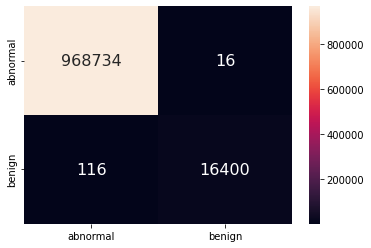

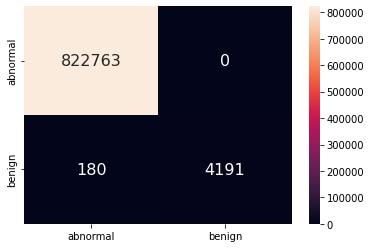

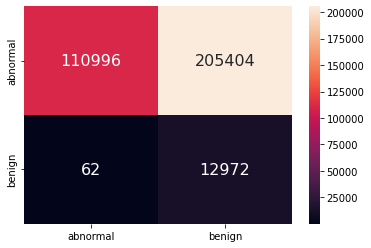

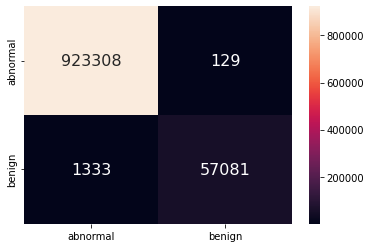

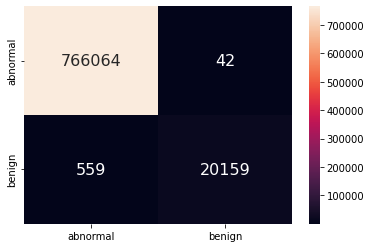

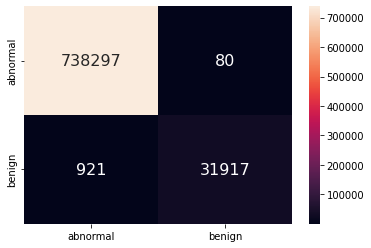

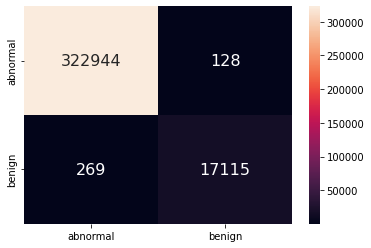

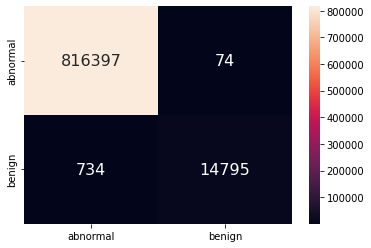

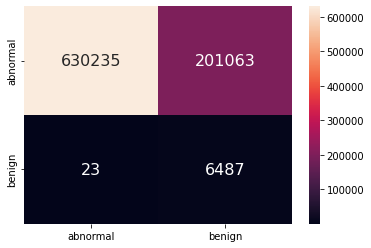

In [ ]:
"""
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 1 Optimized Parameters for the AE Model -  Federated Learning:
    {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 40, 'lr': 0.01, 'batch_size': 256}

"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
x = ''
batch_size = 256
def train_data_loaders(batch_size = batch_size):
    data_1 = torch.utils.data.DataLoader(benign_train_1, batch_size = batch_size, shuffle=True)
    data_2 = torch.utils.data.DataLoader(benign_train_2, batch_size = batch_size, shuffle=True)
    data_3 = torch.utils.data.DataLoader(benign_train_3, batch_size = batch_size, shuffle=True)
    data_4 = torch.utils.data.DataLoader(benign_train_4, batch_size = batch_size, shuffle=True)
    data_5 = torch.utils.data.DataLoader(benign_train_5, batch_size = batch_size, shuffle=True)
    data_6 = torch.utils.data.DataLoader(benign_train_6, batch_size = batch_size, shuffle=True)
    data_7 = torch.utils.data.DataLoader(benign_train_7, batch_size = batch_size, shuffle=True)
    data_8 = torch.utils.data.DataLoader(benign_train_8, batch_size = batch_size, shuffle=True)
    data_9 = torch.utils.data.DataLoader(benign_train_9, batch_size = batch_size, shuffle=True)

    client_loaders = {'D1': data_1,
                      'D2': data_2,
                      'D3': data_3,
                      'D4': data_4,
                      'D5': data_5,
                      'D6': data_6,
                      'D7': data_7,
                      'D8': data_8,
                      'D9': data_9}

    return client_loaders

"""
   Create the Data Generator for Retraining Process by Picking Baseline Data for each Device:
"""
baseline_num = 1000  # choose some data from the train set to retrain the data from trained model
def baseline_data(size = baseline_num, batch_size = batch_size):
    rng = np.random.default_rng()
    x_1 = rng.choice(benign_train_1, size=size, replace = True, shuffle = True, axis=0) # [[[[[[randomly select]]]]]]
    x_2 = rng.choice(benign_train_2, size=size, replace = True, shuffle = True, axis=0)
    x_3 = rng.choice(benign_train_3, size=size, replace = True, shuffle = True, axis=0)
    x_4 = rng.choice(benign_train_4, size=size, replace = True, shuffle = True, axis=0)
    x_5 = rng.choice(benign_train_5, size=size, replace = True, shuffle = True, axis=0)
    x_6 = rng.choice(benign_train_6, size=size, replace = True, shuffle = True, axis=0)
    x_7 = rng.choice(benign_train_7, size=size, replace = True, shuffle = True, axis=0)
    x_8 = rng.choice(benign_train_8, size=size, replace = True, shuffle = True, axis=0)
    x_9 = rng.choice(benign_train_9, size=size, replace = True, shuffle = True, axis=0)


    loader_1 = torch.utils.data.DataLoader(x_1, batch_size=batch_size)
    loader_2 = torch.utils.data.DataLoader(x_2, batch_size=batch_size)
    loader_3 = torch.utils.data.DataLoader(x_3, batch_size=batch_size)
    loader_4 = torch.utils.data.DataLoader(x_4, batch_size=batch_size)
    loader_5 = torch.utils.data.DataLoader(x_5, batch_size=batch_size)
    loader_6 = torch.utils.data.DataLoader(x_6, batch_size=batch_size)
    loader_7 = torch.utils.data.DataLoader(x_7, batch_size=batch_size)
    loader_8 = torch.utils.data.DataLoader(x_8, batch_size=batch_size)
    loader_9 = torch.utils.data.DataLoader(x_9, batch_size=batch_size)

    loaders = {'D1': loader_1,
               'D2': loader_2,
               'D3': loader_3,
               'D4': loader_4,
               'D5': loader_5,
               'D6': loader_6,
               'D7': loader_7,
               'D8': loader_8,
               'D9': loader_9}

    return loaders

"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
num_clients = 9      # Number of clients
num_selected = 9     # Typically, num_selected is around 30–40% of the num_clients.
num_rounds = 1       # Total number of communication rounds for the global model to train.
epochs = 40           # for train client model
retrain_epochs = 5   # Total number of retraining rounds on the global server after receiving the model weights
                     # from all the clients that participated in the communication round.

global_model = AEModel().to(device) # for example
client_models = [AEModel().to(device) for _ in range(num_selected)]
print(client_models)

for model in client_models:
    model.load_state_dict(global_model.state_dict())

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = [torch.optim.SGD(model.parameters(), lr = 0.01, weight_decay=1e-05, momentum=0.9) for model in client_models]
baseline_data = baseline_data()
train_loader = train_data_loaders()
devices = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'] # All devices

"""
   Train The Federated Model:
"""
# Train Client Model and Global Model
train_loss_client = []
train_loss_global = []

start_time = time.time()

for r in range(num_rounds):

    print('\nround: ', r + 1)
    client_idx = np.random.permutation(num_clients)[:num_selected] # random pick some clients from all clients for train
    print('client_idx: ', client_idx)
    client_lens = [len(train_loader[devices[idx]]) for idx in client_idx ]
    print(client_lens)

    # Update All Clients:
    loss = 0
    for i in tqdm(range(num_selected)):
        client_syn(client_models[i], global_model)
        loss += client_update(client_models[i], opt[i], train_loader[devices[client_idx[i]]], epochs)
    train_loss_client.append(loss)

    # Retrain the Model on the Global Server:
    loss_retrain = 0
    for i in tqdm(range(num_selected)):
        loss_retrain += client_update(client_models[i], opt[i], baseline_data[devices[client_idx[i]]], retrain_epochs)
    train_loss_global.append(loss_retrain/num_selected)

    # Aggregate all Client Models:
    server_aggregate_M(global_model, client_models, client_lens)

    print("\nclient_loss: ", loss)
    print('global_loss: ', loss_retrain/num_selected)

# save model
torch.save(global_model, 'global_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Global Model - AutoEncoder Model
"""
global_model = torch.load('global_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(global_model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(global_model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(global_model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(global_model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(global_model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(global_model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(global_model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(global_model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(global_model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(global_model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(global_model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(global_model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(global_model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(global_model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(global_model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(global_model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(global_model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(global_model, thr_9, mix_data_9, mix_label_9)


TIME: 0.2065653085708618mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99999 
FPR: 0.00696

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99998 
FPR: 0.03340

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35081 
FPR: 0.00476

D4: 
Acc: 0.998% 
Precision: 0.998 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99986 
FPR: 0.02412

D5: 
Acc: 0.997% 
Precision: 0.997 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99992 
FPR: 0.09953

D6: 
Acc: 0.997% 
Precision: 0.997 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99988 
FPR: 0.05847

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99960 
FPR: 0.01524

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99990 
FPR: 0.05647

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75814 
FPR: 0.00369


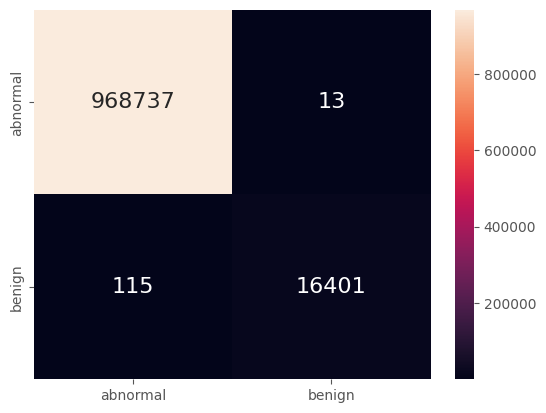

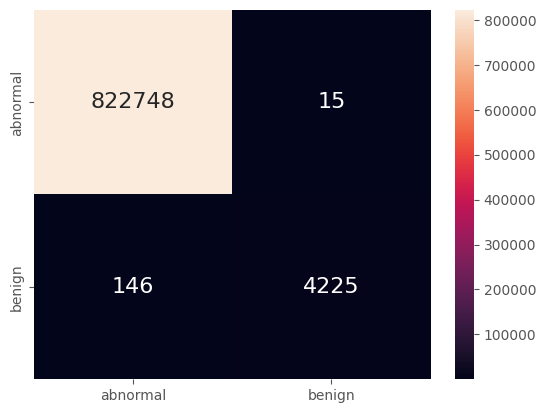

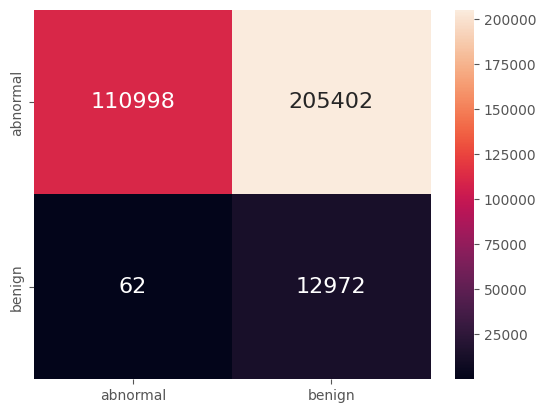

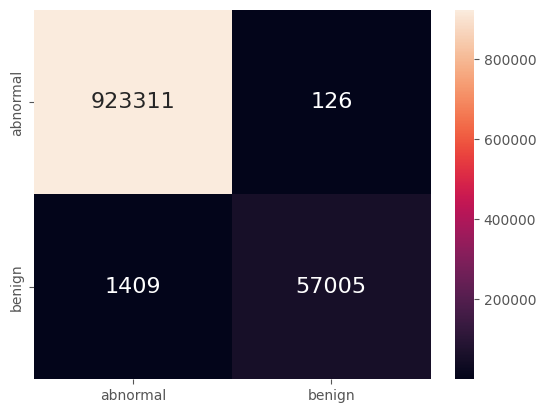

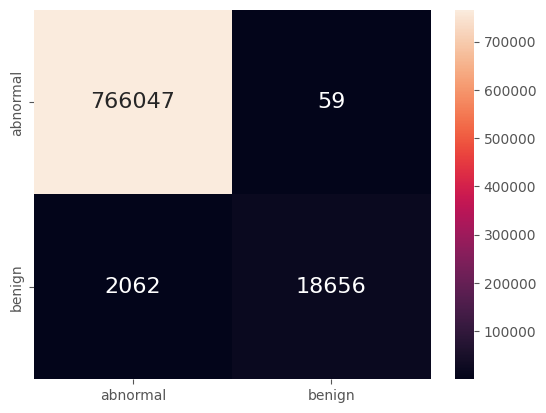

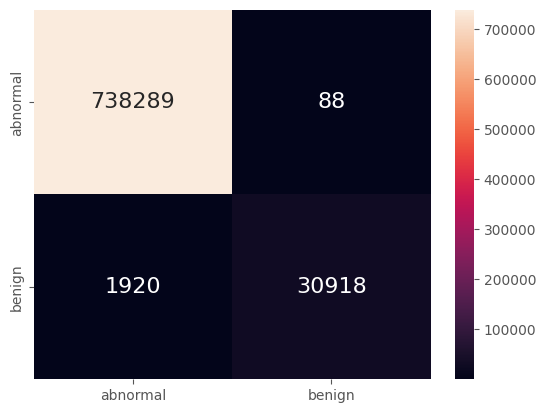

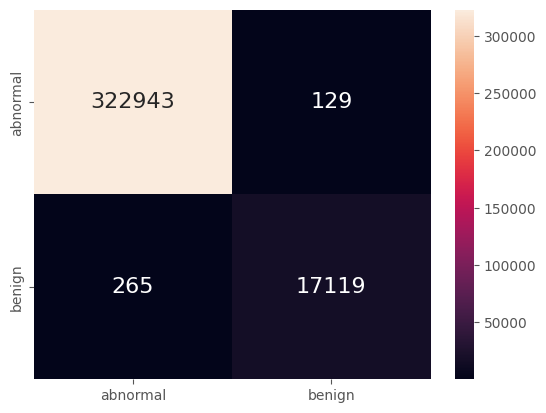

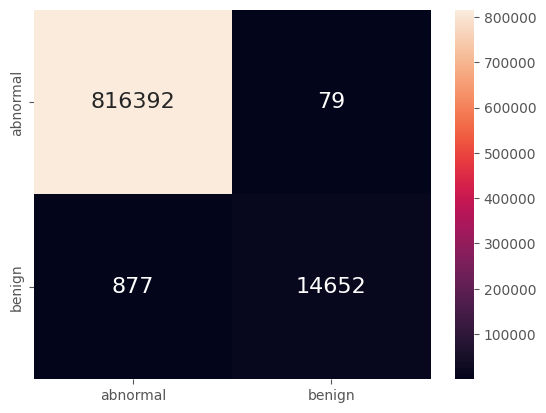

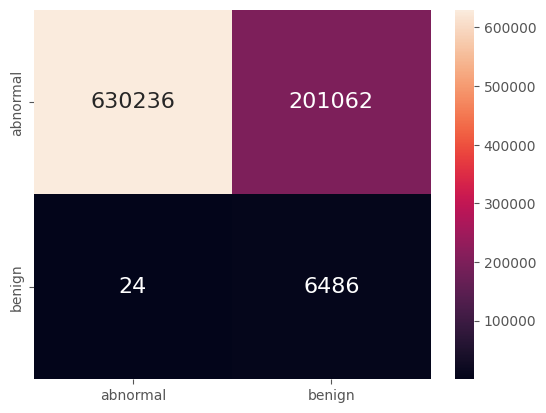

In [ ]:
"""
    Create the Data Generator for Main Training Process by Collecting Training Data of each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Non-Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 1 Optimized Parameters for the AE Model -  Non- Federated Learning:
    {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 40, 'lr': 0.01, 'batch_size': 256}

"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 256
def train_data_loaders(batch_size = batch_size):
    data_1 = torch.utils.data.DataLoader(benign_train_1, batch_size = batch_size, shuffle=True)
    return data_1


"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
epochs = 40           # for train client model

# Model Initialization
model = AEModel().to(device) # for example

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = torch.optim.SGD(model.parameters(), lr = 0.01, weight_decay=1e-05, momentum=0.9)
train_loader = train_data_loaders()

"""
   Train The Non- Federated Model:
"""

# Train Non-FL Model
train_loss_client = []

start_time = time.time()

model.train()
for e in range(epochs):
    running_loss = 0.0
    for bx, (data) in enumerate(train_loader):
        output = model(data.float())
        opt.zero_grad()
        loss = nn.MSELoss(reduction='mean')(data.float().to(device), output)
        loss.backward()
        opt.step()
        # print(loss.item())
        running_loss += loss.item()
    # print(running_loss)
    epoch_loss = running_loss/len(train_loader)

# save model
torch.save(model, 'Non_FL_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Non-FL Model - AutoEncoder Model
"""
model = torch.load('Non_FL_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(model, thr_9, mix_data_9, mix_label_9)

[AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=True)
    (7): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=28, out_features=37, bias=True)
    (1): Tanh()
    (2): Linear(in_features=37, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=86, bias=True)
    (5): Tanh()
    (6): Linear(in_features=86, out_features=115, bias=True)
    (7): Tanh()
  )
), AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=Tr

100%|██████████| 9/9 [00:02<00:00,  4.32it/s]



client_loss:  4.557525448656173
global_loss:  0.5015820873280367

round:  2
client_idx:  [1 3 0 2 4 8 5 7 6]
[69, 913, 259, 204, 324, 102, 514, 243, 272]


100%|██████████| 9/9 [00:02<00:00,  4.24it/s]



client_loss:  11.235404675717486
global_loss:  1.277107559170367

round:  3
client_idx:  [5 3 4 1 7 0 8 6 2]
[514, 913, 324, 69, 243, 259, 102, 272, 204]


100%|██████████| 9/9 [00:02<00:00,  3.97it/s]



client_loss:  10.865583392485979
global_loss:  1.1769187953840528

round:  4
client_idx:  [1 4 8 3 7 5 6 0 2]
[69, 324, 102, 913, 243, 514, 272, 259, 204]


100%|██████████| 9/9 [00:02<00:00,  4.30it/s]



client_loss:  12.825034881287808
global_loss:  1.3979292262552514

round:  5
client_idx:  [4 6 1 3 8 0 7 5 2]
[324, 272, 69, 913, 102, 259, 243, 514, 204]


100%|██████████| 9/9 [00:02<00:00,  4.33it/s]



client_loss:  12.916840224987725
global_loss:  1.2554960746525063

round:  6
client_idx:  [3 2 8 4 5 7 6 0 1]
[913, 204, 102, 324, 514, 243, 272, 259, 69]


100%|██████████| 9/9 [00:02<00:00,  4.28it/s]



client_loss:  11.406528912768538
global_loss:  1.250006639967776

round:  7
client_idx:  [1 8 3 7 0 4 5 2 6]
[69, 102, 913, 243, 259, 324, 514, 204, 272]


100%|██████████| 9/9 [00:02<00:00,  4.35it/s]



client_loss:  11.641608414978974
global_loss:  1.2783260949783855

round:  8
client_idx:  [5 1 6 0 8 7 3 2 4]
[514, 69, 272, 259, 102, 243, 913, 204, 324]


100%|██████████| 9/9 [00:02<00:00,  4.16it/s]



client_loss:  13.353120822574219
global_loss:  1.4059600630361173

round:  9
client_idx:  [6 8 7 2 0 3 1 5 4]
[272, 102, 243, 204, 259, 913, 69, 514, 324]


100%|██████████| 9/9 [00:02<00:00,  4.20it/s]



client_loss:  11.113813219132151
global_loss:  1.2227137114645705

round:  10
client_idx:  [8 7 0 2 4 5 3 1 6]
[102, 243, 259, 204, 324, 514, 913, 69, 272]


100%|██████████| 9/9 [00:02<00:00,  4.32it/s]



client_loss:  12.503548922038277
global_loss:  1.3624285674240026

TIME: 30.236426039536795mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99998 
FPR: 0.00702

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.04187

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35081 
FPR: 0.00476

D4: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99986 
FPR: 0.02284

D5: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99994 
FPR: 0.02698

D6: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99989 
FPR: 0.02805

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99960 
FPR: 0.01547

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99991 
FPR: 0.04727

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75813 
FPR: 0.00353


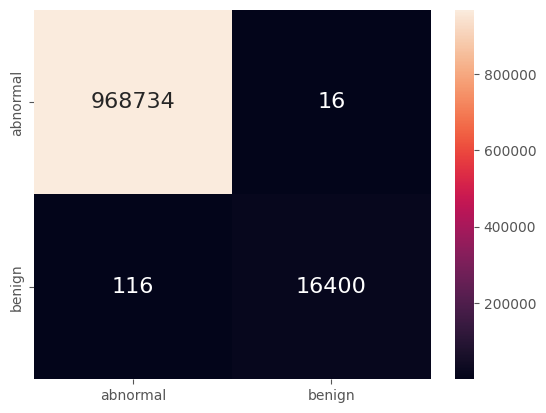

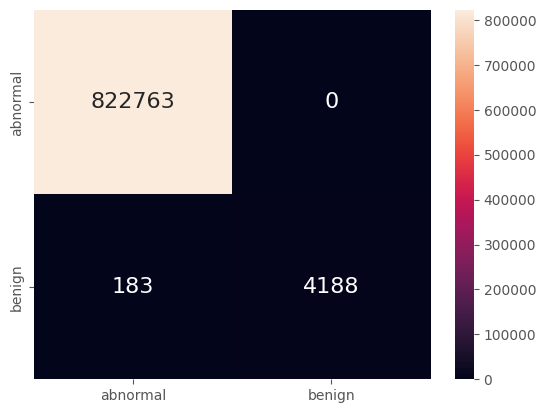

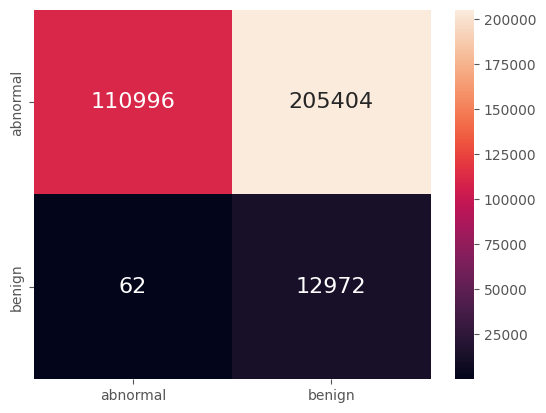

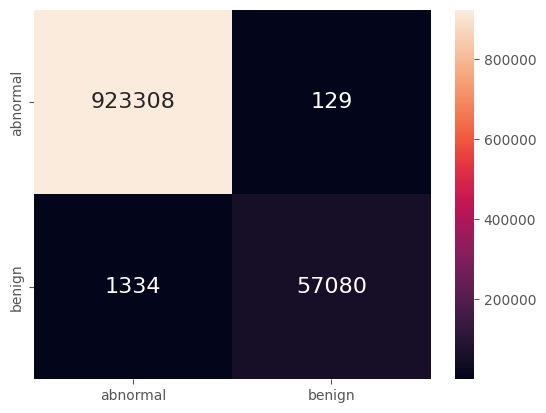

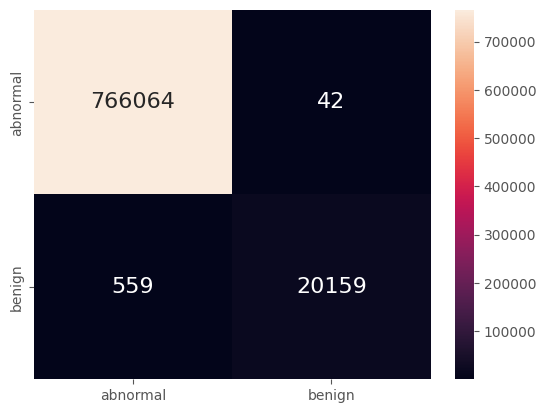

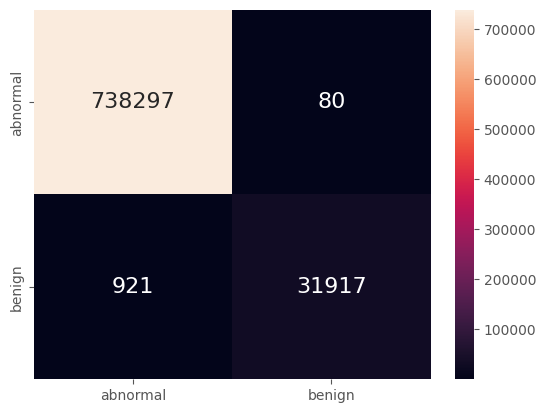

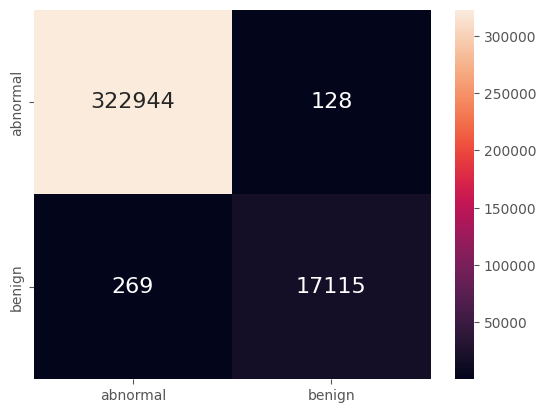

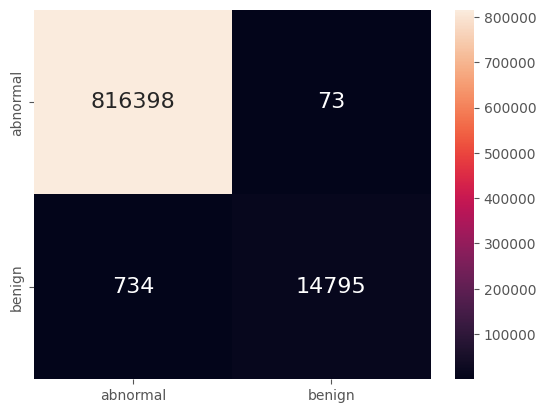

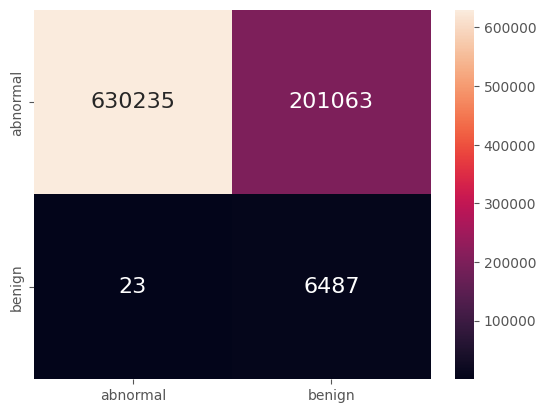

In [ ]:
"""
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 2 Optimized Parameters for the AE Model:
    {'optimizer': <class 'torch.optim.adam.Adam'>, 'max_epochs': 20, 'lr': 0.01, 'batch_size': 64}

"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 64
def train_data_loaders(batch_size = batch_size):
    data_1 = torch.utils.data.DataLoader(benign_train_1, batch_size = batch_size, shuffle=True)
    data_2 = torch.utils.data.DataLoader(benign_train_2, batch_size = batch_size, shuffle=True)
    data_3 = torch.utils.data.DataLoader(benign_train_3, batch_size = batch_size, shuffle=True)
    data_4 = torch.utils.data.DataLoader(benign_train_4, batch_size = batch_size, shuffle=True)
    data_5 = torch.utils.data.DataLoader(benign_train_5, batch_size = batch_size, shuffle=True)
    data_6 = torch.utils.data.DataLoader(benign_train_6, batch_size = batch_size, shuffle=True)
    data_7 = torch.utils.data.DataLoader(benign_train_7, batch_size = batch_size, shuffle=True)
    data_8 = torch.utils.data.DataLoader(benign_train_8, batch_size = batch_size, shuffle=True)
    data_9 = torch.utils.data.DataLoader(benign_train_9, batch_size = batch_size, shuffle=True)

    client_loaders = {'D1': data_1,
                      'D2': data_2,
                      'D3': data_3,
                      'D4': data_4,
                      'D5': data_5,
                      'D6': data_6,
                      'D7': data_7,
                      'D8': data_8,
                      'D9': data_9}

    return client_loaders

"""
   Create the Data Generator for Retraining Process by Picking Baseline Data for each Device:
"""
baseline_num = 1000  # choose some data from the train set to retrain the data from trained model
def baseline_data(size = baseline_num, batch_size = batch_size):
    rng = np.random.default_rng()
    x_1 = rng.choice(benign_train_1, size=size, replace = True, shuffle = True, axis=0) # [[[[[[randomly select]]]]]]
    x_2 = rng.choice(benign_train_2, size=size, replace = True, shuffle = True, axis=0)
    x_3 = rng.choice(benign_train_3, size=size, replace = True, shuffle = True, axis=0)
    x_4 = rng.choice(benign_train_4, size=size, replace = True, shuffle = True, axis=0)
    x_5 = rng.choice(benign_train_5, size=size, replace = True, shuffle = True, axis=0)
    x_6 = rng.choice(benign_train_6, size=size, replace = True, shuffle = True, axis=0)
    x_7 = rng.choice(benign_train_7, size=size, replace = True, shuffle = True, axis=0)
    x_8 = rng.choice(benign_train_8, size=size, replace = True, shuffle = True, axis=0)
    x_9 = rng.choice(benign_train_9, size=size, replace = True, shuffle = True, axis=0)


    loader_1 = torch.utils.data.DataLoader(x_1, batch_size=batch_size)
    loader_2 = torch.utils.data.DataLoader(x_2, batch_size=batch_size)
    loader_3 = torch.utils.data.DataLoader(x_3, batch_size=batch_size)
    loader_4 = torch.utils.data.DataLoader(x_4, batch_size=batch_size)
    loader_5 = torch.utils.data.DataLoader(x_5, batch_size=batch_size)
    loader_6 = torch.utils.data.DataLoader(x_6, batch_size=batch_size)
    loader_7 = torch.utils.data.DataLoader(x_7, batch_size=batch_size)
    loader_8 = torch.utils.data.DataLoader(x_8, batch_size=batch_size)
    loader_9 = torch.utils.data.DataLoader(x_9, batch_size=batch_size)

    loaders = {'D1': loader_1,
               'D2': loader_2,
               'D3': loader_3,
               'D4': loader_4,
               'D5': loader_5,
               'D6': loader_6,
               'D7': loader_7,
               'D8': loader_8,
               'D9': loader_9}

    return loaders

"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
num_clients = 9      # Number of clients
num_selected = 9     # Typically, num_selected is around 30–40% of the num_clients.
num_rounds = 10       # Total number of communication rounds for the global model to train.
epochs = 20           # for train client model
retrain_epochs = 5   # Total number of retraining rounds on the global server after receiving the model weights
                     # from all the clients that participated in the communication round.

global_model = AEModel().to(device) # for example
client_models = [AEModel().to(device) for _ in range(num_selected)]
print(client_models)

for model in client_models:
    model.load_state_dict(global_model.state_dict())

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = [torch.optim.Adam(model.parameters(), lr = 0.01, weight_decay=1e-05) for model in client_models]
baseline_data = baseline_data()
train_loader = train_data_loaders()
devices = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'] # All devices

"""
   Train The Federated Model:
"""
# Train Client Model and Global Model
train_loss_client = []
train_loss_global = []

start_time = time.time()

for r in range(num_rounds):

    print('\nround: ', r + 1)
    client_idx = np.random.permutation(num_clients)[:num_selected] # random pick some clients from all clients for train
    print('client_idx: ', client_idx)
    client_lens = [len(train_loader[devices[idx]]) for idx in client_idx ]
    print(client_lens)

    # Update All Clients:
    loss = 0
    for i in tqdm(range(num_selected)):
        client_syn(client_models[i], global_model)
        loss += client_update(client_models[i], opt[i], train_loader[devices[client_idx[i]]], epochs)
    train_loss_client.append(loss)

    # Retrain the Model on the Global Server:
    loss_retrain = 0
    for i in tqdm(range(num_selected)):
        loss_retrain += client_update(client_models[i], opt[i], baseline_data[devices[client_idx[i]]], retrain_epochs)
    train_loss_global.append(loss_retrain/num_selected)

    # Aggregate all Client Models:
    server_aggregate_M(global_model, client_models, client_lens)

    print("\nclient_loss: ", loss)
    print('global_loss: ', loss_retrain/num_selected)

# save model
torch.save(global_model, 'global_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Global Model - AutoEncoder Model
"""
global_model = torch.load('global_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(global_model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(global_model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(global_model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(global_model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(global_model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(global_model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(global_model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(global_model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(global_model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(global_model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(global_model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(global_model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(global_model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(global_model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(global_model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(global_model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(global_model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(global_model, thr_9, mix_data_9, mix_label_9)


TIME: 0.07858892281850179mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99999 
FPR: 0.00696

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.02334

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35081 
FPR: 0.00476

D4: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99986 
FPR: 0.02210

D5: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99993 
FPR: 0.05261

D6: 
Acc: 0.998% 
Precision: 0.998 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99988 
FPR: 0.03663

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99959 
FPR: 0.01536

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99990 
FPR: 0.04263

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75813 
FPR: 0.00353


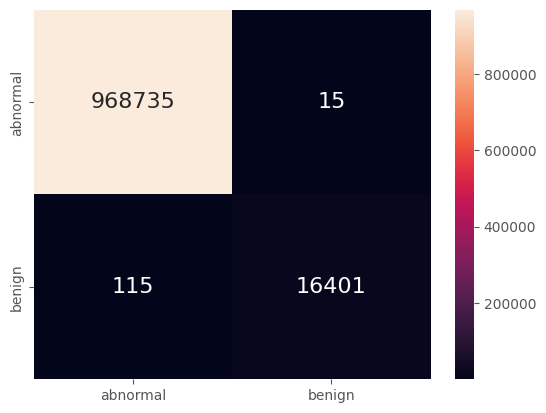

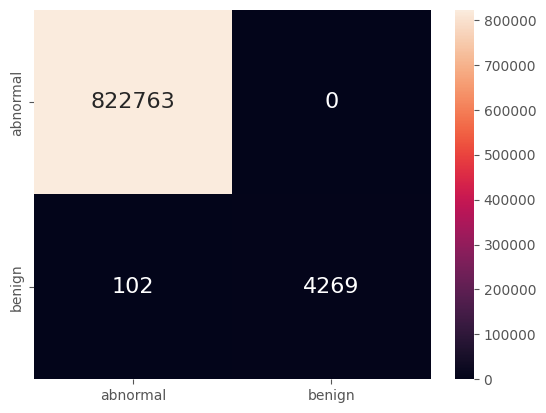

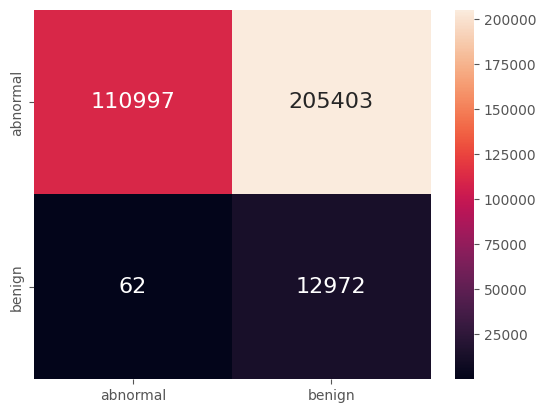

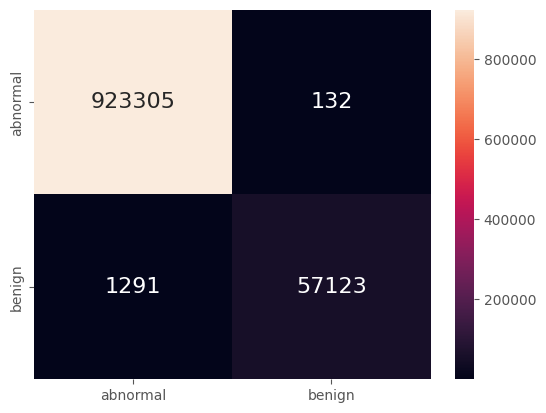

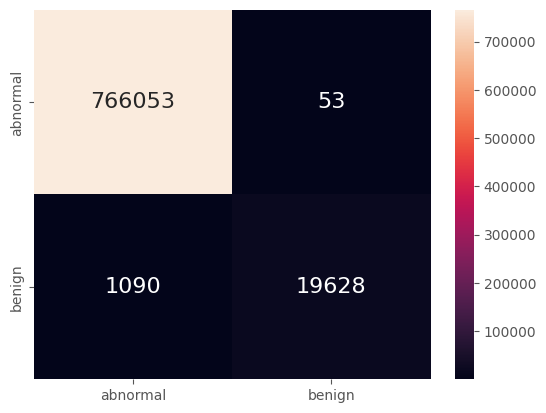

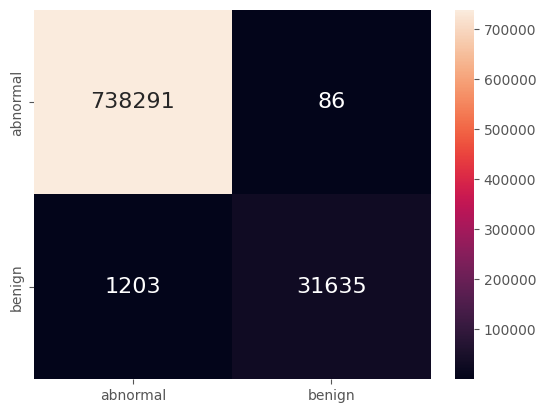

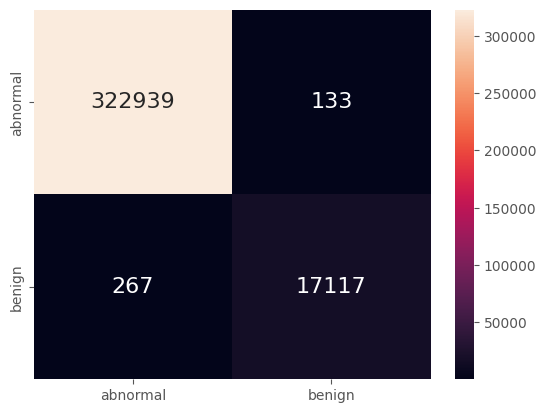

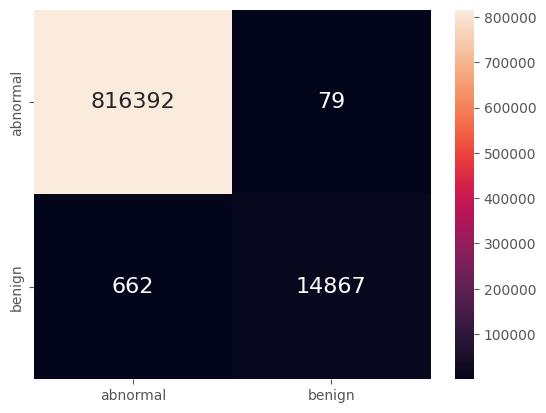

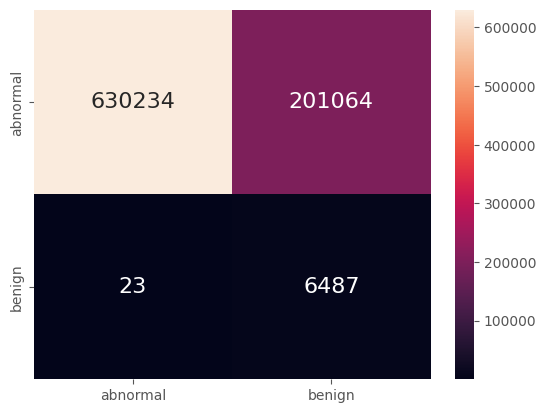

In [ ]:
"""
    Create the Data Generator for Main Training Process by Collecting Training Data of each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Non-Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 2 Optimized Parameters for the AE Model -  Non- Federated Learning:
    {'optimizer': <class 'torch.optim.adam.Adam'>, 'max_epochs': 20, 'lr': 0.01, 'batch_size': 64}

"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 64
def train_data_loaders(batch_size = batch_size):
    data_2 = torch.utils.data.DataLoader(benign_train_2, batch_size = batch_size, shuffle=True)
    return data_2


"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
epochs = 20           # for train client model

# Model Initialization
model = AEModel().to(device) # for example

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = torch.optim.Adam(model.parameters(), lr = 0.01, weight_decay=1e-05)
train_loader = train_data_loaders()

"""
   Train The Non- Federated Model:
"""

# Train Non-FL Model
train_loss_client = []

start_time = time.time()

model.train()
for e in range(epochs):
    running_loss = 0.0
    for bx, (data) in enumerate(train_loader):
        output = model(data.float())
        opt.zero_grad()
        loss = nn.MSELoss(reduction='mean')(data.float().to(device), output)
        loss.backward()
        opt.step()
        # print(loss.item())
        running_loss += loss.item()
    # print(running_loss)
    epoch_loss = running_loss/len(train_loader)

# save model
torch.save(model, 'Non_FL_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Non-FL Model - AutoEncoder Model
"""
model = torch.load('Non_FL_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(model, thr_9, mix_data_9, mix_label_9)

[AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=True)
    (7): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=28, out_features=37, bias=True)
    (1): Tanh()
    (2): Linear(in_features=37, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=86, bias=True)
    (5): Tanh()
    (6): Linear(in_features=86, out_features=115, bias=True)
    (7): Tanh()
  )
), AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=Tr

100%|██████████| 9/9 [00:01<00:00,  5.61it/s]



client_loss:  6.004439807273551
global_loss:  0.7281795303440757

round:  2
client_idx:  [3 7 2 5 1 4 8 0 6]
[913, 243, 204, 514, 69, 324, 102, 259, 272]


100%|██████████| 9/9 [00:01<00:00,  5.39it/s]



client_loss:  12.400888383011742
global_loss:  1.4322716647552118

round:  3
client_idx:  [6 2 7 1 0 4 3 8 5]
[272, 204, 243, 69, 259, 324, 913, 102, 514]


100%|██████████| 9/9 [00:01<00:00,  5.78it/s]



client_loss:  12.395051100050287
global_loss:  1.432275375144349

round:  4
client_idx:  [0 7 1 2 3 6 4 5 8]
[259, 243, 69, 204, 913, 272, 324, 514, 102]


100%|██████████| 9/9 [00:01<00:00,  5.54it/s]



client_loss:  12.399099330126914
global_loss:  1.432275375144349

round:  5
client_idx:  [0 5 4 3 2 7 8 1 6]
[259, 514, 324, 913, 204, 243, 102, 69, 272]


100%|██████████| 9/9 [00:01<00:00,  5.59it/s]



client_loss:  12.391879026702206
global_loss:  1.432275375144349

round:  6
client_idx:  [2 8 5 7 4 6 1 0 3]
[204, 102, 514, 243, 324, 272, 69, 259, 913]


100%|██████████| 9/9 [00:01<00:00,  5.76it/s]



client_loss:  12.40662324788058
global_loss:  1.432275375144349

round:  7
client_idx:  [0 3 2 4 1 5 8 6 7]
[259, 913, 204, 324, 69, 514, 102, 272, 243]


100%|██████████| 9/9 [00:01<00:00,  5.59it/s]



client_loss:  12.395906089612925
global_loss:  1.432275375144349

round:  8
client_idx:  [7 5 6 0 1 4 2 8 3]
[243, 514, 272, 259, 69, 324, 204, 102, 913]


100%|██████████| 9/9 [00:01<00:00,  5.91it/s]



client_loss:  12.400030741765208
global_loss:  1.432275375144349

round:  9
client_idx:  [3 0 8 4 2 7 5 1 6]
[913, 259, 102, 324, 204, 243, 514, 69, 272]


100%|██████████| 9/9 [00:01<00:00,  5.70it/s]



client_loss:  12.394548527323076
global_loss:  1.432275375144349

round:  10
client_idx:  [5 2 0 7 3 4 1 6 8]
[514, 204, 259, 243, 913, 324, 69, 272, 102]


100%|██████████| 9/9 [00:01<00:00,  5.26it/s]



client_loss:  12.393528625252735
global_loss:  1.432275375144349

TIME: 46.22621930042903mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99998 
FPR: 0.00702

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.04118

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35081 
FPR: 0.00476

D4: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99986 
FPR: 0.02282

D5: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99994 
FPR: 0.02698

D6: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99989 
FPR: 0.02805

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99960 
FPR: 0.01547

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99991 
FPR: 0.04727

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75813 
FPR: 0.00353


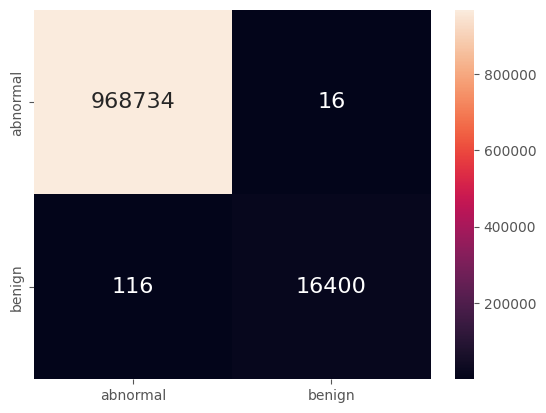

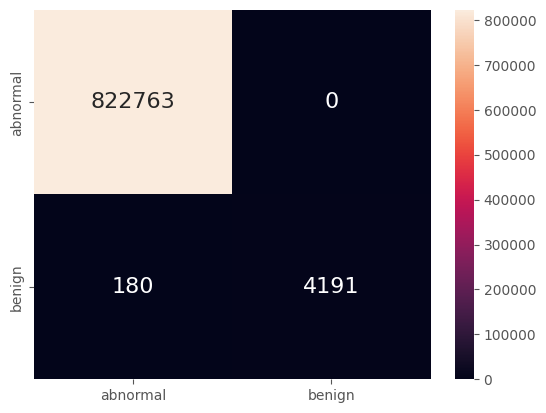

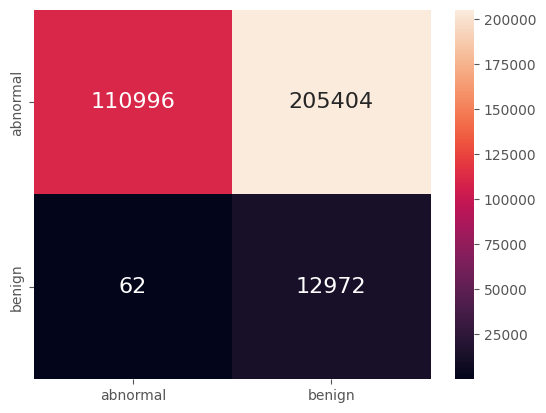

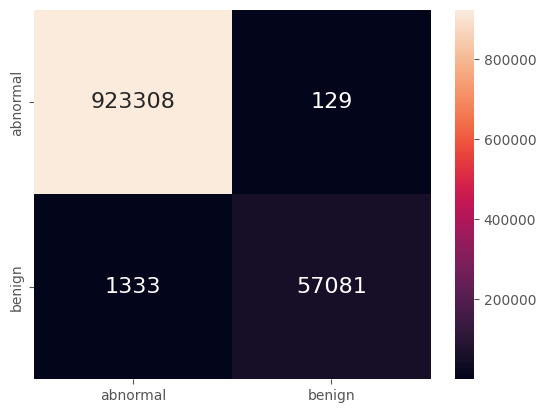

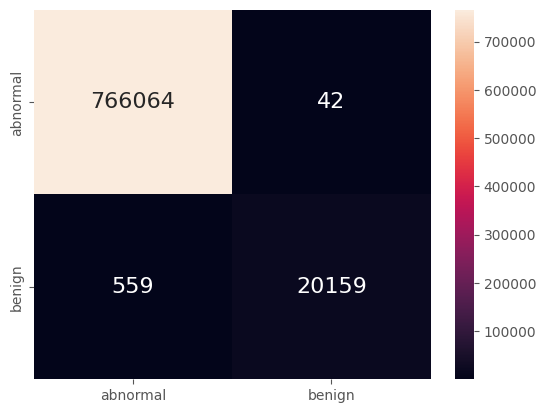

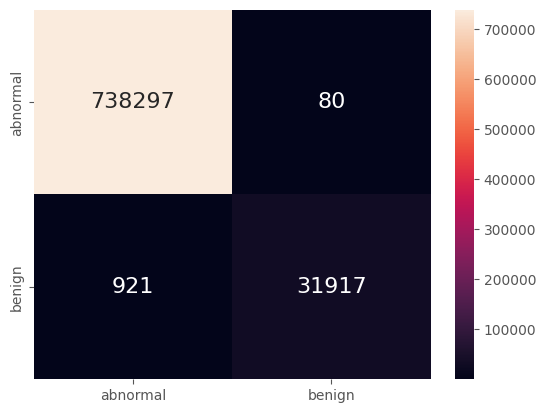

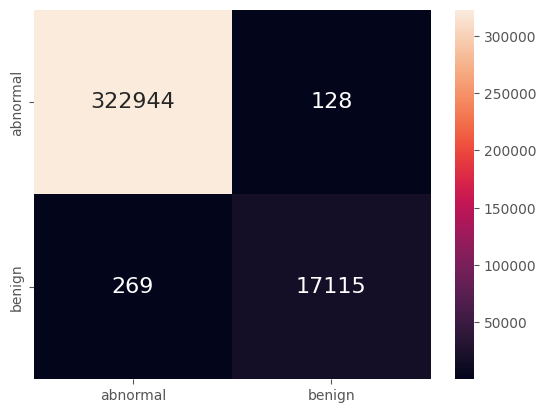

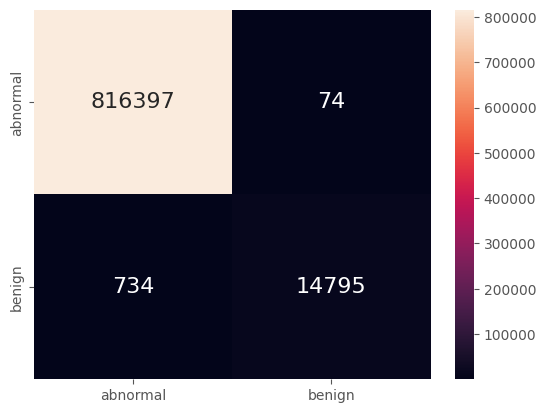

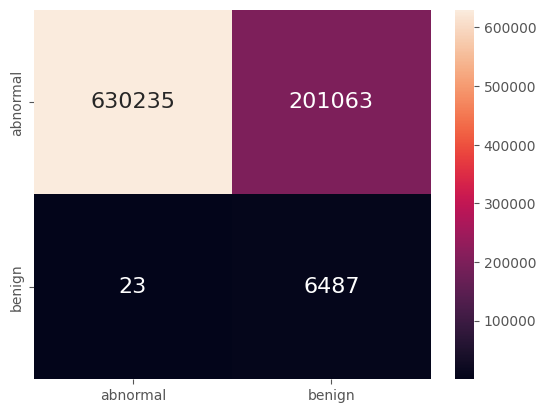

In [ ]:
"""
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 3 Optimized Parameters for the AE Model:
    {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 40, 'lr': 0.001, 'batch_size': 64}
"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 64
def train_data_loaders(batch_size = batch_size):
    data_1 = torch.utils.data.DataLoader(benign_train_1, batch_size = batch_size, shuffle=True)
    data_2 = torch.utils.data.DataLoader(benign_train_2, batch_size = batch_size, shuffle=True)
    data_3 = torch.utils.data.DataLoader(benign_train_3, batch_size = batch_size, shuffle=True)
    data_4 = torch.utils.data.DataLoader(benign_train_4, batch_size = batch_size, shuffle=True)
    data_5 = torch.utils.data.DataLoader(benign_train_5, batch_size = batch_size, shuffle=True)
    data_6 = torch.utils.data.DataLoader(benign_train_6, batch_size = batch_size, shuffle=True)
    data_7 = torch.utils.data.DataLoader(benign_train_7, batch_size = batch_size, shuffle=True)
    data_8 = torch.utils.data.DataLoader(benign_train_8, batch_size = batch_size, shuffle=True)
    data_9 = torch.utils.data.DataLoader(benign_train_9, batch_size = batch_size, shuffle=True)

    client_loaders = {'D1': data_1,
                      'D2': data_2,
                      'D3': data_3,
                      'D4': data_4,
                      'D5': data_5,
                      'D6': data_6,
                      'D7': data_7,
                      'D8': data_8,
                      'D9': data_9}

    return client_loaders

"""
   Create the Data Generator for Retraining Process by Picking Baseline Data for each Device:
"""
baseline_num = 1000  # choose some data from the train set to retrain the data from trained model
def baseline_data(size = baseline_num, batch_size = batch_size):
    rng = np.random.default_rng()
    x_1 = rng.choice(benign_train_1, size=size, replace = True, shuffle = True, axis=0) # [[[[[[randomly select]]]]]]
    x_2 = rng.choice(benign_train_2, size=size, replace = True, shuffle = True, axis=0)
    x_3 = rng.choice(benign_train_3, size=size, replace = True, shuffle = True, axis=0)
    x_4 = rng.choice(benign_train_4, size=size, replace = True, shuffle = True, axis=0)
    x_5 = rng.choice(benign_train_5, size=size, replace = True, shuffle = True, axis=0)
    x_6 = rng.choice(benign_train_6, size=size, replace = True, shuffle = True, axis=0)
    x_7 = rng.choice(benign_train_7, size=size, replace = True, shuffle = True, axis=0)
    x_8 = rng.choice(benign_train_8, size=size, replace = True, shuffle = True, axis=0)
    x_9 = rng.choice(benign_train_9, size=size, replace = True, shuffle = True, axis=0)


    loader_1 = torch.utils.data.DataLoader(x_1, batch_size=batch_size)
    loader_2 = torch.utils.data.DataLoader(x_2, batch_size=batch_size)
    loader_3 = torch.utils.data.DataLoader(x_3, batch_size=batch_size)
    loader_4 = torch.utils.data.DataLoader(x_4, batch_size=batch_size)
    loader_5 = torch.utils.data.DataLoader(x_5, batch_size=batch_size)
    loader_6 = torch.utils.data.DataLoader(x_6, batch_size=batch_size)
    loader_7 = torch.utils.data.DataLoader(x_7, batch_size=batch_size)
    loader_8 = torch.utils.data.DataLoader(x_8, batch_size=batch_size)
    loader_9 = torch.utils.data.DataLoader(x_9, batch_size=batch_size)

    loaders = {'D1': loader_1,
               'D2': loader_2,
               'D3': loader_3,
               'D4': loader_4,
               'D5': loader_5,
               'D6': loader_6,
               'D7': loader_7,
               'D8': loader_8,
               'D9': loader_9}

    return loaders

"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
num_clients = 9      # Number of clients
num_selected = 9     # Typically, num_selected is around 30–40% of the num_clients.
num_rounds = 10       # Total number of communication rounds for the global model to train.
epochs = 40           # for train client model
retrain_epochs = 5   # Total number of retraining rounds on the global server after receiving the model weights
                     # from all the clients that participated in the communication round.

global_model = AEModel().to(device) # for example
client_models = [AEModel().to(device) for _ in range(num_selected)]
print(client_models)

for model in client_models:
    model.load_state_dict(global_model.state_dict())

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = [torch.optim.SGD(model.parameters(), lr = 0.001, weight_decay=1e-05, momentum=0.9) for model in client_models]
baseline_data = baseline_data()
train_loader = train_data_loaders()
devices = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'] # All devices

"""
   Train The Federated Model:
"""
# Train Client Model and Global Model
train_loss_client = []
train_loss_global = []

start_time = time.time()

for r in range(num_rounds):

    print('\nround: ', r + 1)
    client_idx = np.random.permutation(num_clients)[:num_selected] # random pick some clients from all clients for train
    print('client_idx: ', client_idx)
    client_lens = [len(train_loader[devices[idx]]) for idx in client_idx ]
    print(client_lens)

    # Update All Clients:
    loss = 0
    for i in tqdm(range(num_selected)):
        client_syn(client_models[i], global_model)
        loss += client_update(client_models[i], opt[i], train_loader[devices[client_idx[i]]], epochs)
    train_loss_client.append(loss)

    # Retrain the Model on the Global Server:
    loss_retrain = 0
    for i in tqdm(range(num_selected)):
        loss_retrain += client_update(client_models[i], opt[i], baseline_data[devices[client_idx[i]]], retrain_epochs)
    train_loss_global.append(loss_retrain/num_selected)

    # Aggregate all Client Models:
    server_aggregate_M(global_model, client_models, client_lens)

    print("\nclient_loss: ", loss)
    print('global_loss: ', loss_retrain/num_selected)

# save model
torch.save(global_model, 'global_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Global Model - AutoEncoder Model
"""
global_model = torch.load('global_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(global_model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(global_model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(global_model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(global_model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(global_model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(global_model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(global_model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(global_model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(global_model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(global_model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(global_model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(global_model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(global_model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(global_model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(global_model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(global_model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(global_model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(global_model, thr_9, mix_data_9, mix_label_9)


TIME: 0.34554649591445924mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99999 
FPR: 0.00702

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.03409

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35082 
FPR: 0.00522

D4: 
Acc: 0.998% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99987 
FPR: 0.02362

D5: 
Acc: 0.998% 
Precision: 0.998 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99993 
FPR: 0.05623

D6: 
Acc: 0.998% 
Precision: 0.998 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99988 
FPR: 0.03901

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99960 
FPR: 0.01547

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99990 
FPR: 0.04881

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75814 
FPR: 0.00369


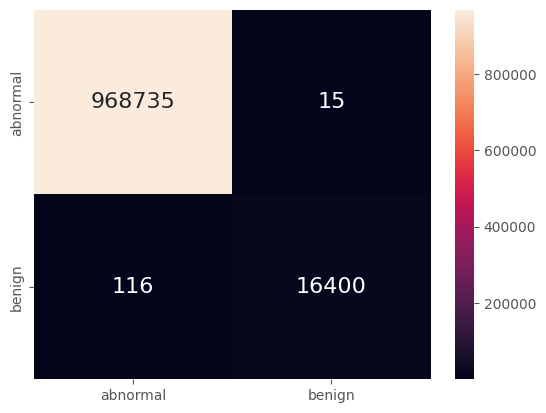

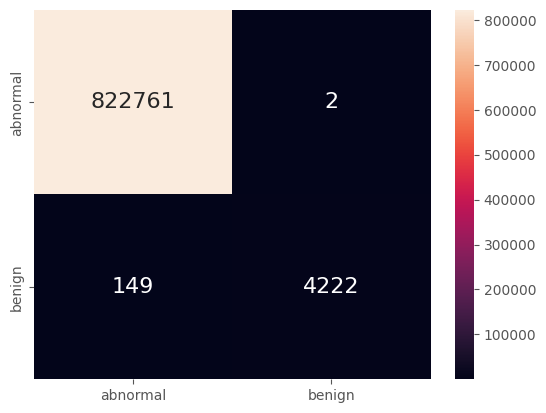

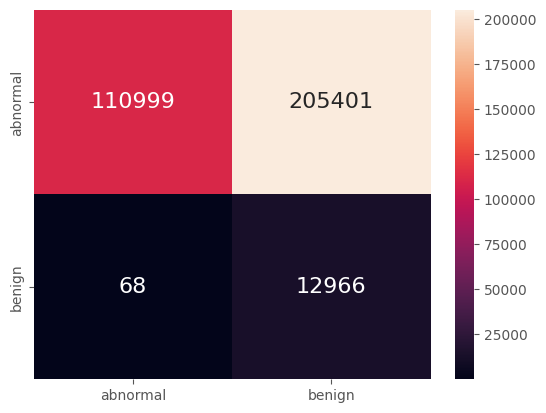

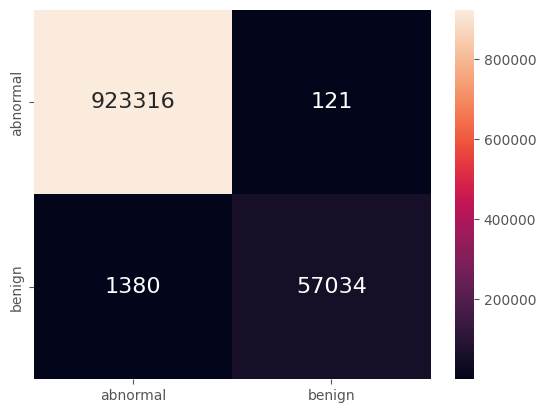

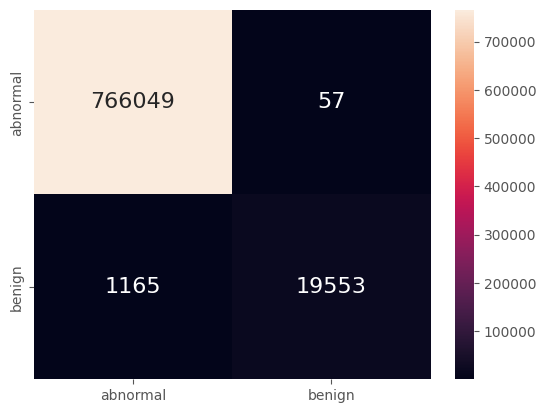

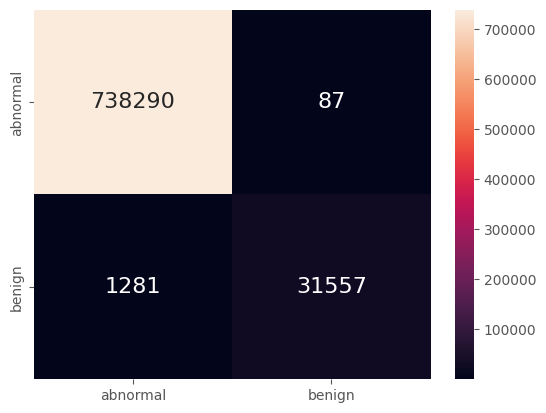

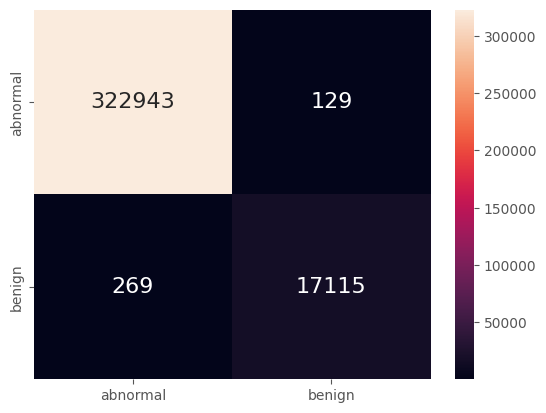

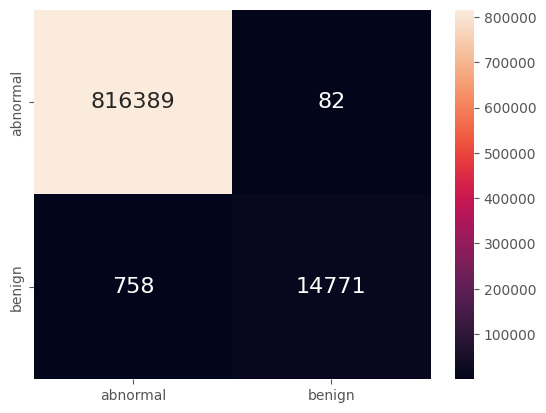

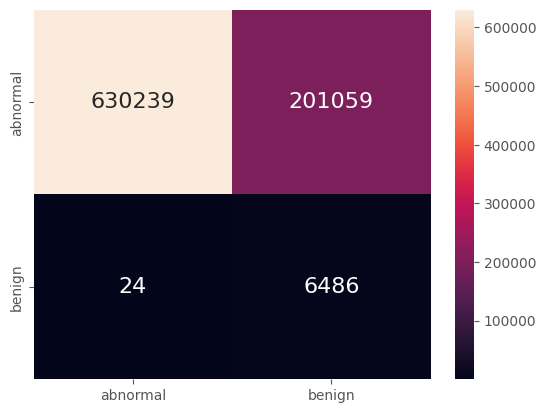

In [ ]:
"""
    Create the Data Generator for Main Training Process by Collecting Training Data of each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Non-Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 3 Optimized Parameters for the AE Model -  Non- Federated Learning:
    {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 40, 'lr': 0.001, 'batch_size': 64}

"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 64
def train_data_loaders(batch_size = batch_size):
    data_3 = torch.utils.data.DataLoader(benign_train_3, batch_size = batch_size, shuffle=True)
    return data_3


"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
epochs = 40           # for train client model

# Model Initialization
model = AEModel().to(device) # for example

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = torch.optim.SGD(model.parameters(), lr = 0.001, weight_decay=1e-05, momentum=0.9)
train_loader = train_data_loaders()

"""
   Train The Non- Federated Model:
"""

# Train Non-FL Model
train_loss_client = []

start_time = time.time()

model.train()
for e in range(epochs):
    running_loss = 0.0
    for bx, (data) in enumerate(train_loader):
        output = model(data.float())
        opt.zero_grad()
        loss = nn.MSELoss(reduction='mean')(data.float().to(device), output)
        loss.backward()
        opt.step()
        # print(loss.item())
        running_loss += loss.item()
    # print(running_loss)
    epoch_loss = running_loss/len(train_loader)

# save model
torch.save(model, 'Non_FL_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Non-FL Model - AutoEncoder Model
"""
model = torch.load('Non_FL_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(model, thr_9, mix_data_9, mix_label_9)

[AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=True)
    (7): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=28, out_features=37, bias=True)
    (1): Tanh()
    (2): Linear(in_features=37, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=86, bias=True)
    (5): Tanh()
    (6): Linear(in_features=86, out_features=115, bias=True)
    (7): Tanh()
  )
), AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=Tr

100%|██████████| 9/9 [00:01<00:00,  7.39it/s]



client_loss:  4.844897155591573
global_loss:  0.4691315669980314

round:  2
client_idx:  [8 2 1 4 5 6 7 0 3]
[26, 51, 18, 81, 129, 68, 61, 65, 229]


100%|██████████| 9/9 [00:00<00:00, 10.04it/s]



client_loss:  12.38368442197299
global_loss:  1.3045855561892192

round:  3
client_idx:  [6 7 3 2 4 0 5 1 8]
[68, 61, 229, 51, 81, 65, 129, 18, 26]


100%|██████████| 9/9 [00:01<00:00,  8.42it/s]



client_loss:  12.439883227705637
global_loss:  1.3046651515695784

round:  4
client_idx:  [5 6 2 4 3 1 7 0 8]
[129, 68, 51, 81, 229, 18, 61, 65, 26]


100%|██████████| 9/9 [00:01<00:00,  7.48it/s]



client_loss:  12.406978859240178
global_loss:  1.3045590702030394

round:  5
client_idx:  [0 7 6 3 2 8 4 5 1]
[65, 61, 68, 229, 51, 26, 81, 129, 18]


100%|██████████| 9/9 [00:00<00:00,  9.69it/s]



client_loss:  12.388074863633383
global_loss:  1.3045635885662503

round:  6
client_idx:  [0 4 3 8 1 2 7 6 5]
[65, 81, 229, 26, 18, 51, 61, 68, 129]


100%|██████████| 9/9 [00:00<00:00, 10.39it/s]



client_loss:  12.409738968648385
global_loss:  1.3045631696780522

round:  7
client_idx:  [8 0 2 6 4 3 7 5 1]
[26, 65, 51, 68, 81, 229, 61, 129, 18]


100%|██████████| 9/9 [00:00<00:00, 10.20it/s]



client_loss:  12.428331714254474
global_loss:  1.3045704000526004

round:  8
client_idx:  [1 2 7 3 8 0 4 5 6]
[18, 51, 61, 229, 26, 65, 81, 129, 68]


100%|██████████| 9/9 [00:00<00:00, 10.21it/s]



client_loss:  12.395476432036643
global_loss:  1.3045670406685934

round:  9
client_idx:  [1 2 8 3 7 5 6 4 0]
[18, 51, 26, 229, 61, 129, 68, 81, 65]


100%|██████████| 9/9 [00:00<00:00,  9.31it/s]



client_loss:  12.388999537628447
global_loss:  1.3045703636275396

round:  10
client_idx:  [8 5 1 3 2 0 4 6 7]
[26, 129, 18, 229, 51, 65, 81, 68, 61]


100%|██████████| 9/9 [00:00<00:00,  9.80it/s]



client_loss:  12.430843543446619
global_loss:  1.3045703636275396

TIME: 26.85273818174998mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99998 
FPR: 0.00702

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.04118

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35081 
FPR: 0.00476

D4: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99986 
FPR: 0.02282

D5: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99994 
FPR: 0.02698

D6: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99989 
FPR: 0.02805

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99960 
FPR: 0.01547

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99991 
FPR: 0.04727

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75813 
FPR: 0.00353


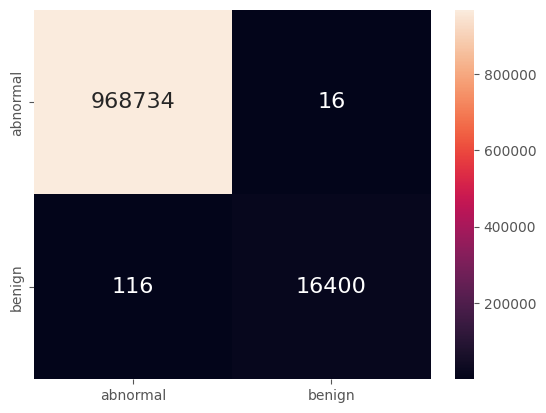

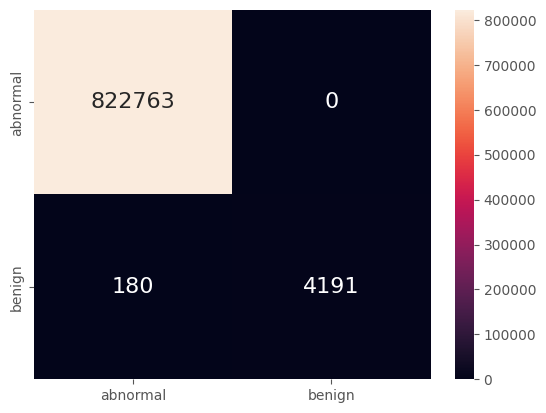

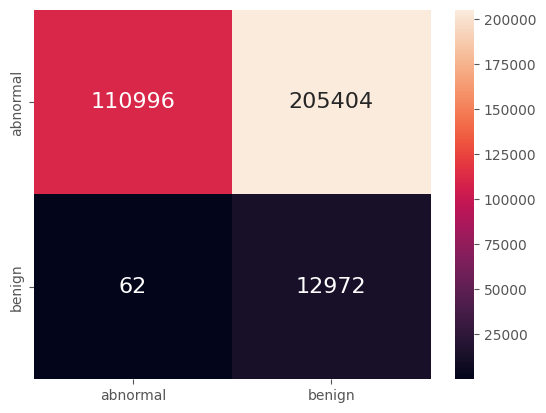

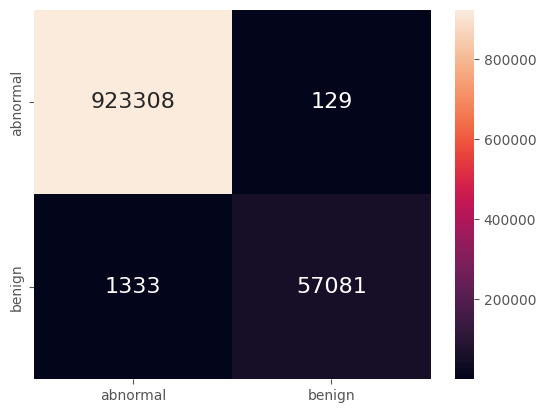

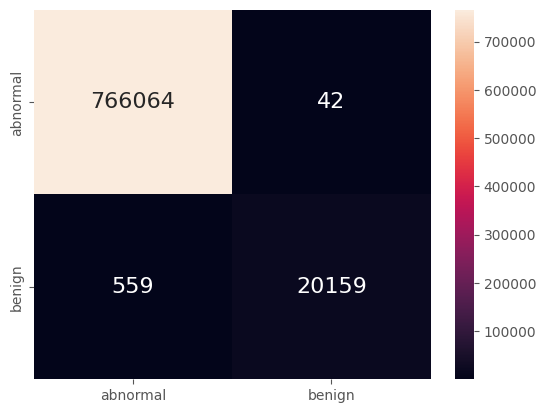

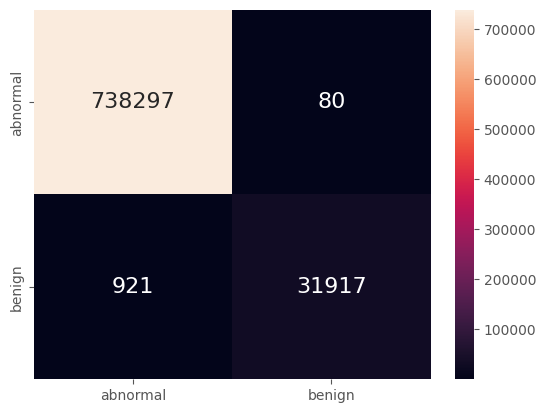

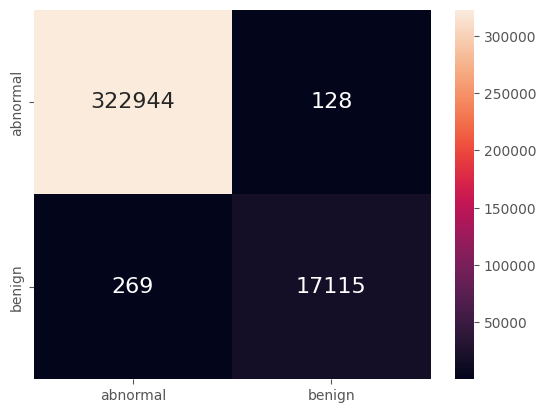

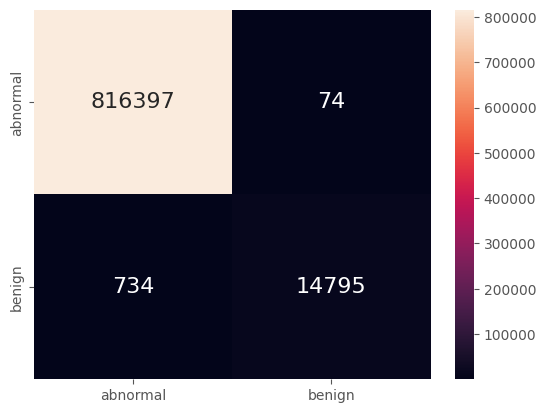

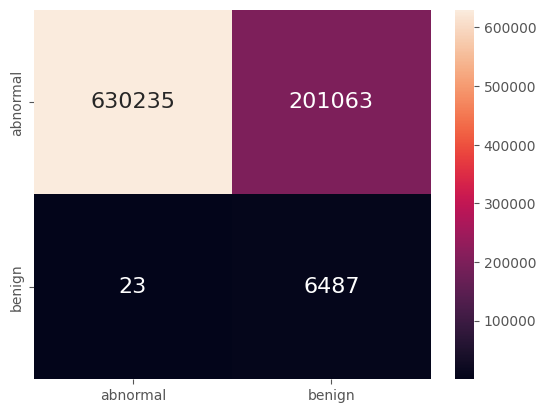

In [ ]:
"""
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 4 Optimized Parameters for the AE Model:
    {'optimizer': <class 'torch.optim.adam.Adam'>, 'max_epochs': 40, 'lr': 0.0001, 'batch_size': 256}
"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 256
def train_data_loaders(batch_size = batch_size):
    data_1 = torch.utils.data.DataLoader(benign_train_1, batch_size = batch_size, shuffle=True)
    data_2 = torch.utils.data.DataLoader(benign_train_2, batch_size = batch_size, shuffle=True)
    data_3 = torch.utils.data.DataLoader(benign_train_3, batch_size = batch_size, shuffle=True)
    data_4 = torch.utils.data.DataLoader(benign_train_4, batch_size = batch_size, shuffle=True)
    data_5 = torch.utils.data.DataLoader(benign_train_5, batch_size = batch_size, shuffle=True)
    data_6 = torch.utils.data.DataLoader(benign_train_6, batch_size = batch_size, shuffle=True)
    data_7 = torch.utils.data.DataLoader(benign_train_7, batch_size = batch_size, shuffle=True)
    data_8 = torch.utils.data.DataLoader(benign_train_8, batch_size = batch_size, shuffle=True)
    data_9 = torch.utils.data.DataLoader(benign_train_9, batch_size = batch_size, shuffle=True)

    client_loaders = {'D1': data_1,
                      'D2': data_2,
                      'D3': data_3,
                      'D4': data_4,
                      'D5': data_5,
                      'D6': data_6,
                      'D7': data_7,
                      'D8': data_8,
                      'D9': data_9}

    return client_loaders

"""
   Create the Data Generator for Retraining Process by Picking Baseline Data for each Device:
"""
baseline_num = 1000  # choose some data from the train set to retrain the data from trained model
def baseline_data(size = baseline_num, batch_size = batch_size):
    rng = np.random.default_rng()
    x_1 = rng.choice(benign_train_1, size=size, replace = True, shuffle = True, axis=0) # [[[[[[randomly select]]]]]]
    x_2 = rng.choice(benign_train_2, size=size, replace = True, shuffle = True, axis=0)
    x_3 = rng.choice(benign_train_3, size=size, replace = True, shuffle = True, axis=0)
    x_4 = rng.choice(benign_train_4, size=size, replace = True, shuffle = True, axis=0)
    x_5 = rng.choice(benign_train_5, size=size, replace = True, shuffle = True, axis=0)
    x_6 = rng.choice(benign_train_6, size=size, replace = True, shuffle = True, axis=0)
    x_7 = rng.choice(benign_train_7, size=size, replace = True, shuffle = True, axis=0)
    x_8 = rng.choice(benign_train_8, size=size, replace = True, shuffle = True, axis=0)
    x_9 = rng.choice(benign_train_9, size=size, replace = True, shuffle = True, axis=0)


    loader_1 = torch.utils.data.DataLoader(x_1, batch_size=batch_size)
    loader_2 = torch.utils.data.DataLoader(x_2, batch_size=batch_size)
    loader_3 = torch.utils.data.DataLoader(x_3, batch_size=batch_size)
    loader_4 = torch.utils.data.DataLoader(x_4, batch_size=batch_size)
    loader_5 = torch.utils.data.DataLoader(x_5, batch_size=batch_size)
    loader_6 = torch.utils.data.DataLoader(x_6, batch_size=batch_size)
    loader_7 = torch.utils.data.DataLoader(x_7, batch_size=batch_size)
    loader_8 = torch.utils.data.DataLoader(x_8, batch_size=batch_size)
    loader_9 = torch.utils.data.DataLoader(x_9, batch_size=batch_size)

    loaders = {'D1': loader_1,
               'D2': loader_2,
               'D3': loader_3,
               'D4': loader_4,
               'D5': loader_5,
               'D6': loader_6,
               'D7': loader_7,
               'D8': loader_8,
               'D9': loader_9}

    return loaders

"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
num_clients = 9      # Number of clients
num_selected = 9     # Typically, num_selected is around 30–40% of the num_clients.
num_rounds = 10       # Total number of communication rounds for the global model to train.
epochs = 40           # for train client model
retrain_epochs = 5   # Total number of retraining rounds on the global server after receiving the model weights
                     # from all the clients that participated in the communication round.

global_model = AEModel().to(device) # for example
client_models = [AEModel().to(device) for _ in range(num_selected)]
print(client_models)

for model in client_models:
    model.load_state_dict(global_model.state_dict())

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = [torch.optim.Adam(model.parameters(), lr = 0.0001, weight_decay=1e-05) for model in client_models]
baseline_data = baseline_data()
train_loader = train_data_loaders()
devices = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'] # All devices

"""
   Train The Federated Model:
"""
# Train Client Model and Global Model
train_loss_client = []
train_loss_global = []

start_time = time.time()

for r in range(num_rounds):

    print('\nround: ', r + 1)
    client_idx = np.random.permutation(num_clients)[:num_selected] # random pick some clients from all clients for train
    print('client_idx: ', client_idx)
    client_lens = [len(train_loader[devices[idx]]) for idx in client_idx ]
    print(client_lens)

    # Update All Clients:
    loss = 0
    for i in tqdm(range(num_selected)):
        client_syn(client_models[i], global_model)
        loss += client_update(client_models[i], opt[i], train_loader[devices[client_idx[i]]], epochs)
    train_loss_client.append(loss)

    # Retrain the Model on the Global Server:
    loss_retrain = 0
    for i in tqdm(range(num_selected)):
        loss_retrain += client_update(client_models[i], opt[i], baseline_data[devices[client_idx[i]]], retrain_epochs)
    train_loss_global.append(loss_retrain/num_selected)

    # Aggregate all Client Models:
    server_aggregate_M(global_model, client_models, client_lens)

    print("\nclient_loss: ", loss)
    print('global_loss: ', loss_retrain/num_selected)

# save model
torch.save(global_model, 'global_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Global Model - AutoEncoder Model
"""
global_model = torch.load('global_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(global_model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(global_model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(global_model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(global_model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(global_model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(global_model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(global_model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(global_model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(global_model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(global_model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(global_model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(global_model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(global_model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(global_model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(global_model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(global_model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(global_model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(global_model, thr_9, mix_data_9, mix_label_9)


TIME: 0.9301500757535298mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99999 
FPR: 0.00696

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.02242

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35081 
FPR: 0.00491

D4: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99987 
FPR: 0.02263

D5: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99996 
FPR: 0.03340

D6: 
Acc: 0.998% 
Precision: 0.998 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99989 
FPR: 0.03496

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99960 
FPR: 0.01524

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99990 
FPR: 0.04463

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75814 
FPR: 0.00369


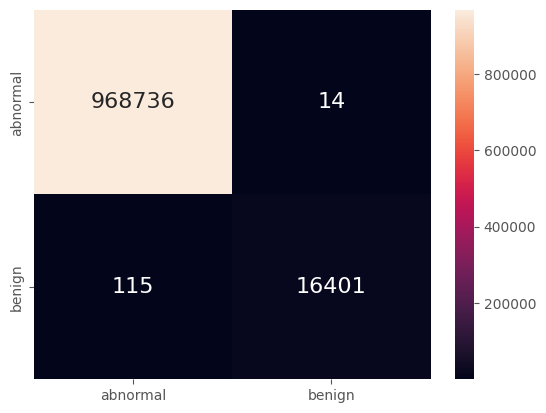

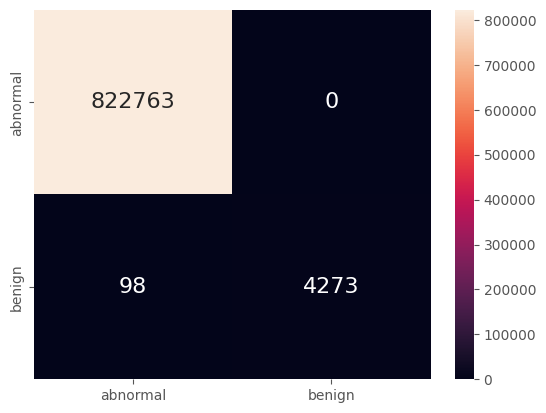

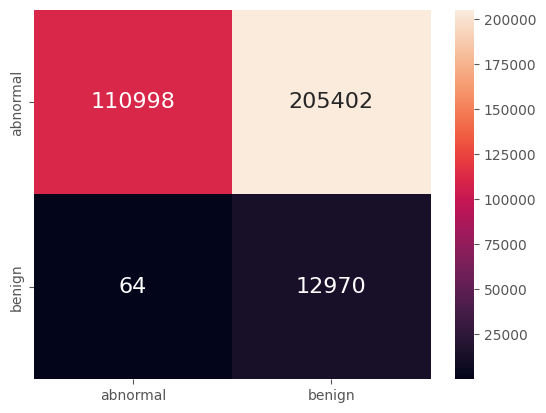

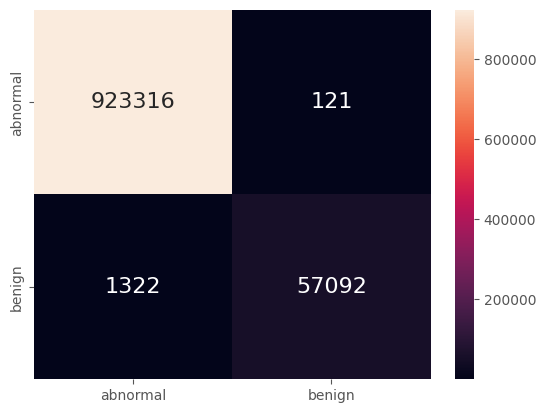

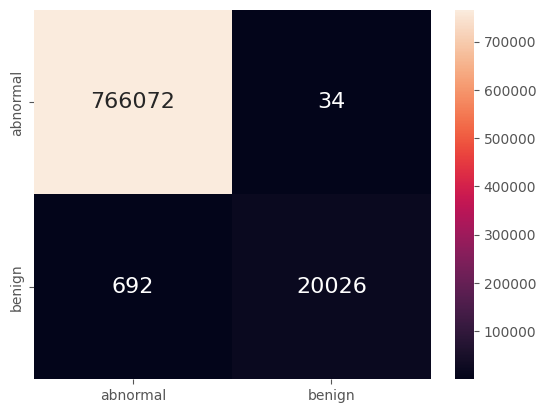

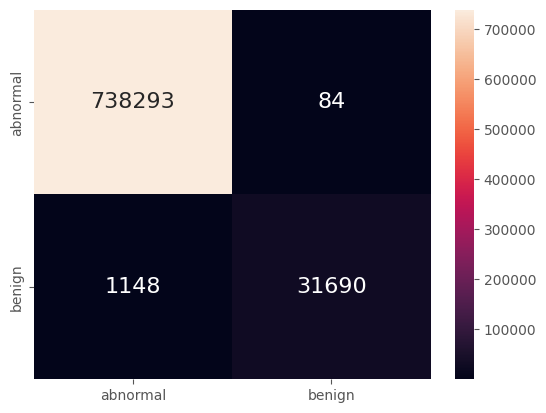

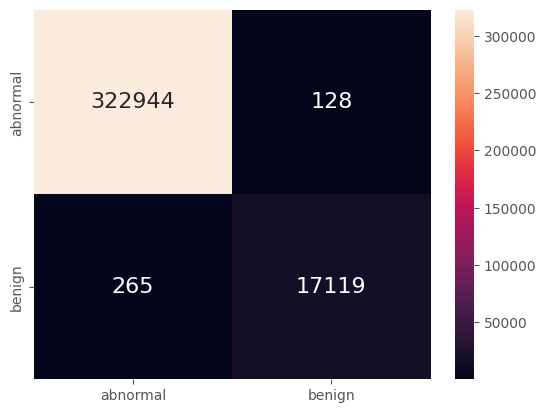

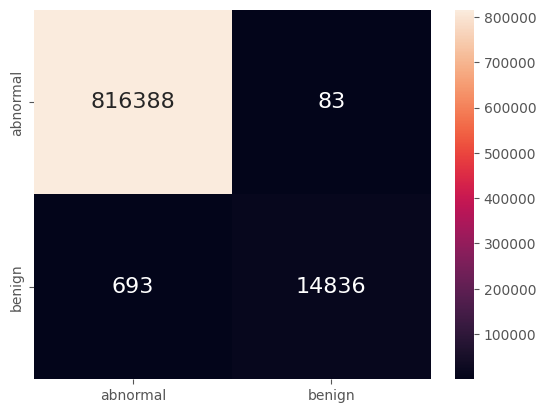

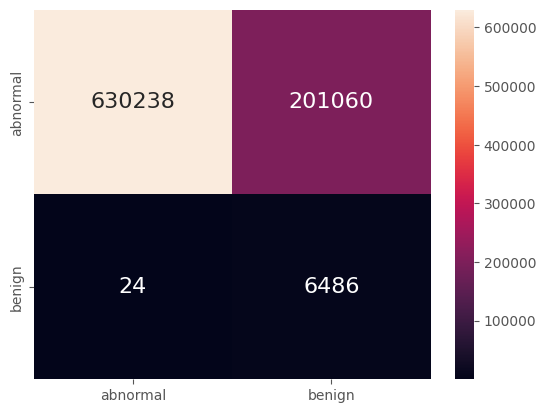

In [ ]:
"""
    Create the Data Generator for Main Training Process by Collecting Training Data of each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Non-Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 4 Optimized Parameters for the AE Model -  Non- Federated Learning:
    {'optimizer': <class 'torch.optim.adam.Adam'>, 'max_epochs': 40, 'lr': 0.0001, 'batch_size': 256}

"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 256
def train_data_loaders(batch_size = batch_size):
    data_4 = torch.utils.data.DataLoader(benign_train_4, batch_size = batch_size, shuffle=True)
    return data_4


"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
epochs = 40           # for train client model

# Model Initialization
model = AEModel().to(device) # for example

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = torch.optim.Adam(model.parameters(), lr = 0.0001, weight_decay=1e-05)
train_loader = train_data_loaders()

"""
   Train The Non- Federated Model:
"""

# Train Non-FL Model
train_loss_client = []

start_time = time.time()

model.train()
for e in range(epochs):
    running_loss = 0.0
    for bx, (data) in enumerate(train_loader):
        output = model(data.float())
        opt.zero_grad()
        loss = nn.MSELoss(reduction='mean')(data.float().to(device), output)
        loss.backward()
        opt.step()
        # print(loss.item())
        running_loss += loss.item()
    # print(running_loss)
    epoch_loss = running_loss/len(train_loader)

# save model
torch.save(model, 'Non_FL_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Non-FL Model - AutoEncoder Model
"""
model = torch.load('Non_FL_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(model, thr_9, mix_data_9, mix_label_9)

[AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=True)
    (7): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=28, out_features=37, bias=True)
    (1): Tanh()
    (2): Linear(in_features=37, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=86, bias=True)
    (5): Tanh()
    (6): Linear(in_features=86, out_features=115, bias=True)
    (7): Tanh()
  )
), AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=Tr

100%|██████████| 9/9 [00:01<00:00,  8.81it/s]



client_loss:  9.051316846011938
global_loss:  0.9215323569046127

round:  2
client_idx:  [2 3 4 0 1 6 5 8 7]
[102, 457, 162, 130, 35, 136, 257, 51, 122]


100%|██████████| 9/9 [00:00<00:00,  9.15it/s]



client_loss:  12.3866367868401
global_loss:  1.3027696882685025

round:  3
client_idx:  [7 4 1 3 8 6 0 2 5]
[122, 162, 35, 457, 51, 136, 130, 102, 257]


100%|██████████| 9/9 [00:01<00:00,  8.70it/s]



client_loss:  12.423401477368547
global_loss:  1.3027696882685025

round:  4
client_idx:  [6 2 0 4 5 3 1 7 8]
[136, 102, 130, 162, 257, 457, 35, 122, 51]


100%|██████████| 9/9 [00:01<00:00,  8.91it/s]



client_loss:  12.388103415998055
global_loss:  1.3027696882685025

round:  5
client_idx:  [8 5 7 3 0 2 1 4 6]
[51, 257, 122, 457, 130, 102, 35, 162, 136]


100%|██████████| 9/9 [00:00<00:00,  9.06it/s]



client_loss:  13.584265969693858
global_loss:  1.3027696882685025

round:  6
client_idx:  [0 2 8 3 6 1 4 5 7]
[130, 102, 51, 457, 136, 35, 162, 257, 122]


100%|██████████| 9/9 [00:00<00:00,  9.08it/s]



client_loss:  12.41285615372654
global_loss:  1.3027696882685025

round:  7
client_idx:  [6 7 5 8 3 4 0 2 1]
[136, 122, 257, 51, 457, 162, 130, 102, 35]


100%|██████████| 9/9 [00:01<00:00,  8.80it/s]



client_loss:  12.398101469468081
global_loss:  1.3027696882685025

round:  8
client_idx:  [2 7 4 0 3 5 6 1 8]
[102, 122, 162, 130, 457, 257, 136, 35, 51]


100%|██████████| 9/9 [00:01<00:00,  8.90it/s]



client_loss:  12.387024026525044
global_loss:  1.3027696882685025

round:  9
client_idx:  [2 5 4 6 0 8 7 1 3]
[102, 257, 162, 136, 130, 51, 122, 35, 457]


100%|██████████| 9/9 [00:01<00:00,  8.84it/s]



client_loss:  12.392980496536168
global_loss:  1.3027696882685025

round:  10
client_idx:  [6 7 0 1 5 4 2 3 8]
[136, 122, 130, 35, 257, 162, 102, 457, 51]


100%|██████████| 9/9 [00:00<00:00,  9.02it/s]



client_loss:  12.397137190308092
global_loss:  1.3027696882685025

TIME: 14.656680349508921mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99998 
FPR: 0.00702

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.04118

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35081 
FPR: 0.00476

D4: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99986 
FPR: 0.02282

D5: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99994 
FPR: 0.02698

D6: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99989 
FPR: 0.02805

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99960 
FPR: 0.01547

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99991 
FPR: 0.04727

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75813 
FPR: 0.00353


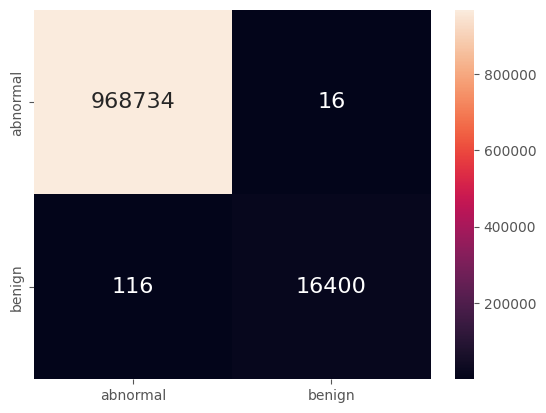

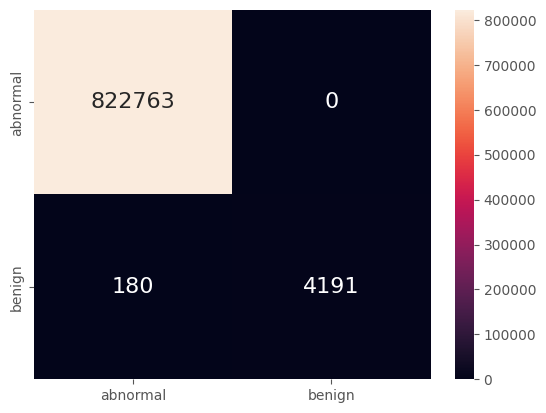

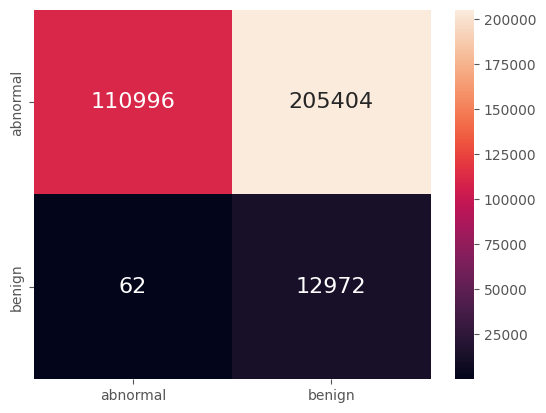

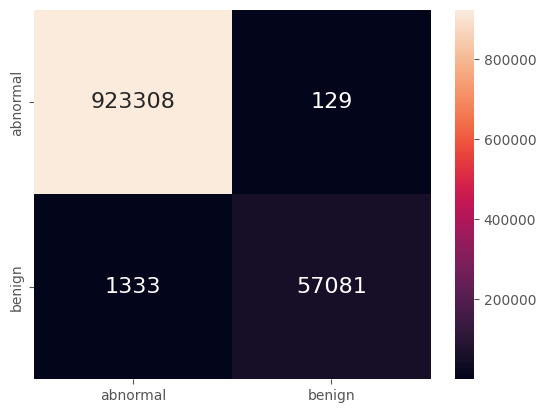

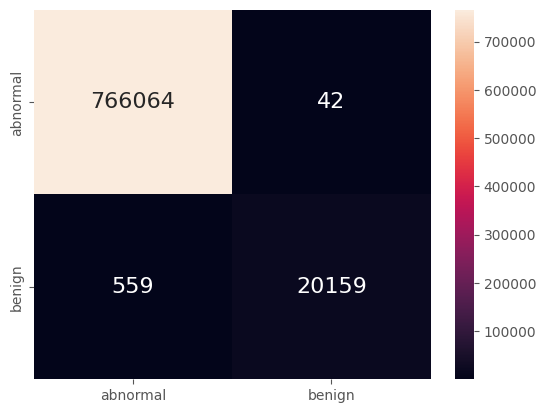

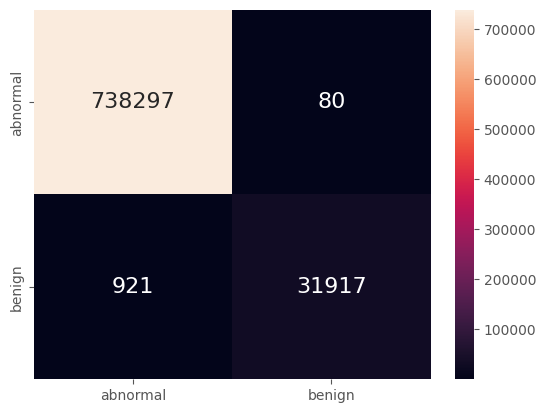

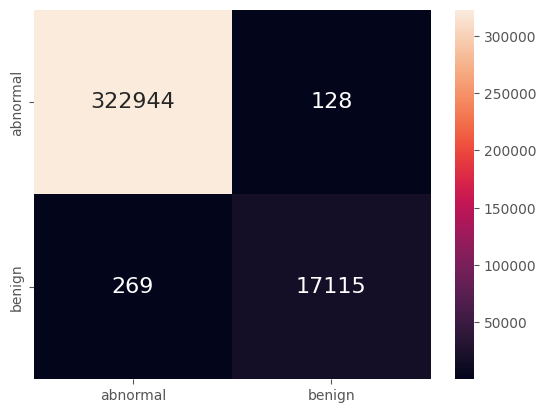

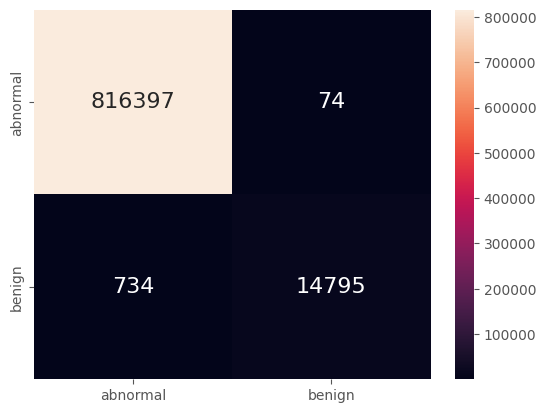

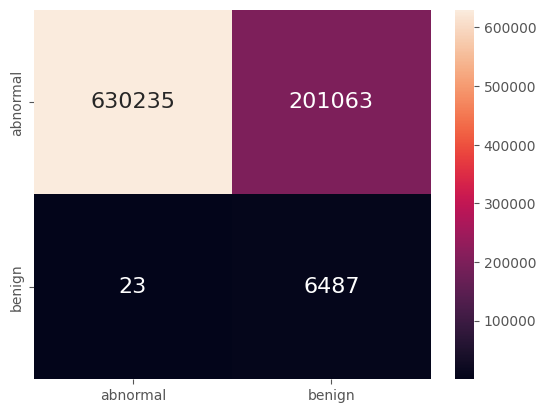

In [ ]:
"""
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 5 Optimized Parameters for the AE Model:
    {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 20, 'lr': 0.0001, 'batch_size': 128}
"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 128
def train_data_loaders(batch_size = batch_size):
    data_1 = torch.utils.data.DataLoader(benign_train_1, batch_size = batch_size, shuffle=True)
    data_2 = torch.utils.data.DataLoader(benign_train_2, batch_size = batch_size, shuffle=True)
    data_3 = torch.utils.data.DataLoader(benign_train_3, batch_size = batch_size, shuffle=True)
    data_4 = torch.utils.data.DataLoader(benign_train_4, batch_size = batch_size, shuffle=True)
    data_5 = torch.utils.data.DataLoader(benign_train_5, batch_size = batch_size, shuffle=True)
    data_6 = torch.utils.data.DataLoader(benign_train_6, batch_size = batch_size, shuffle=True)
    data_7 = torch.utils.data.DataLoader(benign_train_7, batch_size = batch_size, shuffle=True)
    data_8 = torch.utils.data.DataLoader(benign_train_8, batch_size = batch_size, shuffle=True)
    data_9 = torch.utils.data.DataLoader(benign_train_9, batch_size = batch_size, shuffle=True)

    client_loaders = {'D1': data_1,
                      'D2': data_2,
                      'D3': data_3,
                      'D4': data_4,
                      'D5': data_5,
                      'D6': data_6,
                      'D7': data_7,
                      'D8': data_8,
                      'D9': data_9}

    return client_loaders

"""
   Create the Data Generator for Retraining Process by Picking Baseline Data for each Device:
"""
baseline_num = 1000  # choose some data from the train set to retrain the data from trained model
def baseline_data(size = baseline_num, batch_size = batch_size):
    rng = np.random.default_rng()
    x_1 = rng.choice(benign_train_1, size=size, replace = True, shuffle = True, axis=0) # [[[[[[randomly select]]]]]]
    x_2 = rng.choice(benign_train_2, size=size, replace = True, shuffle = True, axis=0)
    x_3 = rng.choice(benign_train_3, size=size, replace = True, shuffle = True, axis=0)
    x_4 = rng.choice(benign_train_4, size=size, replace = True, shuffle = True, axis=0)
    x_5 = rng.choice(benign_train_5, size=size, replace = True, shuffle = True, axis=0)
    x_6 = rng.choice(benign_train_6, size=size, replace = True, shuffle = True, axis=0)
    x_7 = rng.choice(benign_train_7, size=size, replace = True, shuffle = True, axis=0)
    x_8 = rng.choice(benign_train_8, size=size, replace = True, shuffle = True, axis=0)
    x_9 = rng.choice(benign_train_9, size=size, replace = True, shuffle = True, axis=0)


    loader_1 = torch.utils.data.DataLoader(x_1, batch_size=batch_size)
    loader_2 = torch.utils.data.DataLoader(x_2, batch_size=batch_size)
    loader_3 = torch.utils.data.DataLoader(x_3, batch_size=batch_size)
    loader_4 = torch.utils.data.DataLoader(x_4, batch_size=batch_size)
    loader_5 = torch.utils.data.DataLoader(x_5, batch_size=batch_size)
    loader_6 = torch.utils.data.DataLoader(x_6, batch_size=batch_size)
    loader_7 = torch.utils.data.DataLoader(x_7, batch_size=batch_size)
    loader_8 = torch.utils.data.DataLoader(x_8, batch_size=batch_size)
    loader_9 = torch.utils.data.DataLoader(x_9, batch_size=batch_size)

    loaders = {'D1': loader_1,
               'D2': loader_2,
               'D3': loader_3,
               'D4': loader_4,
               'D5': loader_5,
               'D6': loader_6,
               'D7': loader_7,
               'D8': loader_8,
               'D9': loader_9}

    return loaders

"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
num_clients = 9      # Number of clients
num_selected = 9     # Typically, num_selected is around 30–40% of the num_clients.
num_rounds = 10       # Total number of communication rounds for the global model to train.
epochs = 20           # for train client model
retrain_epochs = 5   # Total number of retraining rounds on the global server after receiving the model weights
                     # from all the clients that participated in the communication round.

global_model = AEModel().to(device) # for example
client_models = [AEModel().to(device) for _ in range(num_selected)]
print(client_models)

for model in client_models:
    model.load_state_dict(global_model.state_dict())

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = [torch.optim.SGD(model.parameters(), lr = 0.0001, weight_decay=1e-05, momentum=0.9) for model in client_models]
baseline_data = baseline_data()
train_loader = train_data_loaders()
devices = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'] # All devices

"""
   Train The Federated Model:
"""
# Train Client Model and Global Model
train_loss_client = []
train_loss_global = []

start_time = time.time()

for r in range(num_rounds):

    print('\nround: ', r + 1)
    client_idx = np.random.permutation(num_clients)[:num_selected] # random pick some clients from all clients for train
    print('client_idx: ', client_idx)
    client_lens = [len(train_loader[devices[idx]]) for idx in client_idx ]
    print(client_lens)

    # Update All Clients:
    loss = 0
    for i in tqdm(range(num_selected)):
        client_syn(client_models[i], global_model)
        loss += client_update(client_models[i], opt[i], train_loader[devices[client_idx[i]]], epochs)
    train_loss_client.append(loss)

    # Retrain the Model on the Global Server:
    loss_retrain = 0
    for i in tqdm(range(num_selected)):
        loss_retrain += client_update(client_models[i], opt[i], baseline_data[devices[client_idx[i]]], retrain_epochs)
    train_loss_global.append(loss_retrain/num_selected)

    # Aggregate all Client Models:
    server_aggregate_M(global_model, client_models, client_lens)

    print("\nclient_loss: ", loss)
    print('global_loss: ', loss_retrain/num_selected)

# save model
torch.save(global_model, 'global_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Global Model - AutoEncoder Model
"""
global_model = torch.load('global_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(global_model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(global_model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(global_model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(global_model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(global_model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(global_model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(global_model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(global_model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(global_model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(global_model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(global_model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(global_model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(global_model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(global_model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(global_model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(global_model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(global_model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(global_model, thr_9, mix_data_9, mix_label_9)


TIME: 0.22274564504623412mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99999 
FPR: 0.00696

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.03340

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35082 
FPR: 0.00568

D4: 
Acc: 0.998% 
Precision: 0.998 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99986 
FPR: 0.02410

D5: 
Acc: 0.997% 
Precision: 0.997 
Recall: 1.000 
F1score: 0.998 
TPR: 0.99992 
FPR: 0.10865

D6: 
Acc: 0.997% 
Precision: 0.997 
Recall: 1.000 
F1score: 0.998 
TPR: 0.99988 
FPR: 0.06913

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99960 
FPR: 0.01553

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99991 
FPR: 0.04926

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75814 
FPR: 0.00369


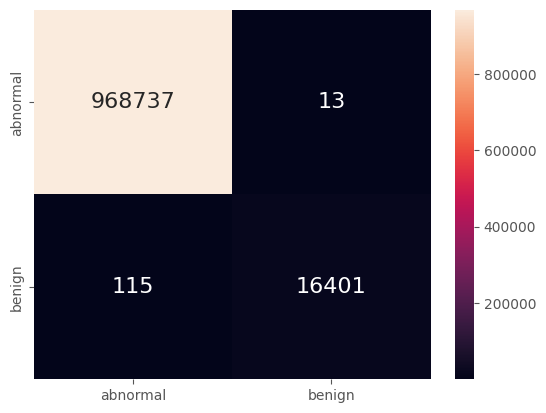

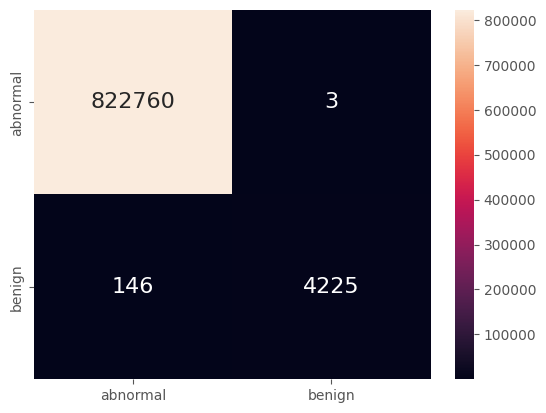

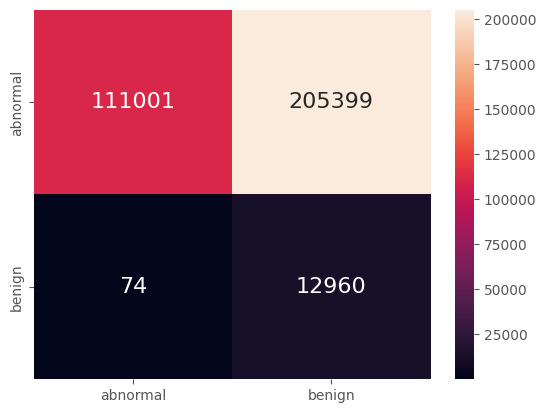

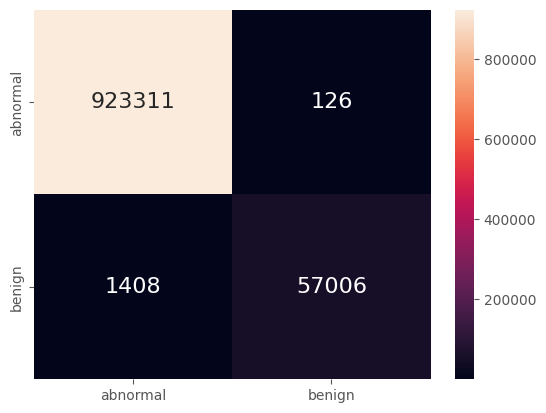

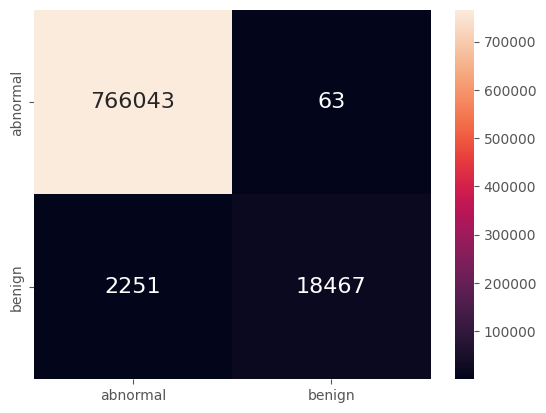

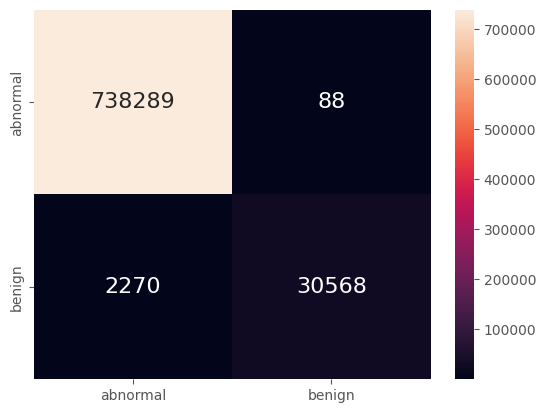

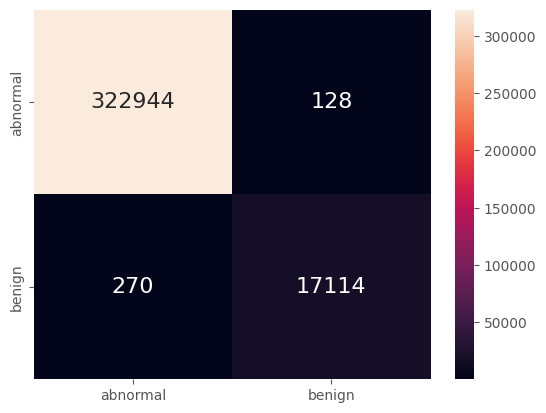

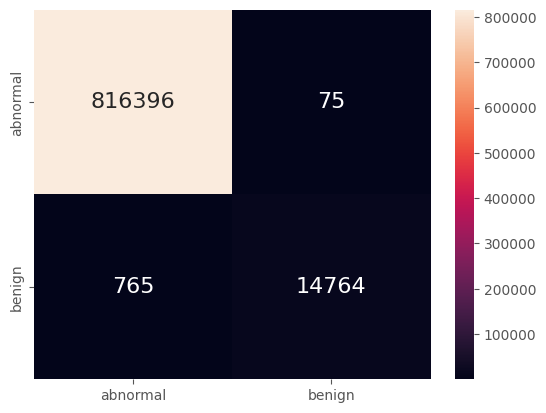

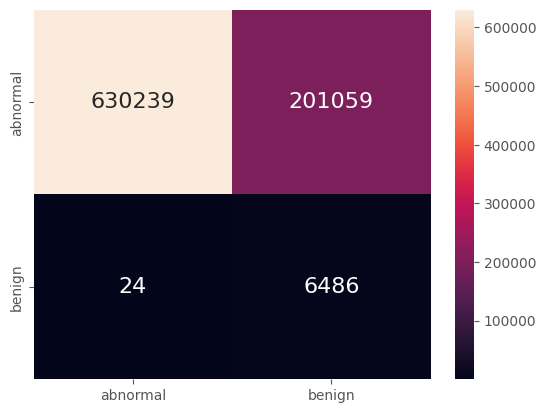

In [ ]:
"""
    Create the Data Generator for Main Training Process by Collecting Training Data of each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Non-Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 5 Optimized Parameters for the AE Model -  Non- Federated Learning:
    {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 20, 'lr': 0.0001, 'batch_size': 128}

"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 128
def train_data_loaders(batch_size = batch_size):
    data_5 = torch.utils.data.DataLoader(benign_train_5, batch_size = batch_size, shuffle=True)
    return data_5


"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
epochs = 20           # for train client model

# Model Initialization
model = AEModel().to(device) # for example

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = torch.optim.SGD(model.parameters(), lr = 0.0001, weight_decay=1e-05, momentum=0.9)
train_loader = train_data_loaders()

"""
   Train The Non- Federated Model:
"""

# Train Non-FL Model
train_loss_client = []

start_time = time.time()

model.train()
for e in range(epochs):
    running_loss = 0.0
    for bx, (data) in enumerate(train_loader):
        output = model(data.float())
        opt.zero_grad()
        loss = nn.MSELoss(reduction='mean')(data.float().to(device), output)
        loss.backward()
        opt.step()
        # print(loss.item())
        running_loss += loss.item()
    # print(running_loss)
    epoch_loss = running_loss/len(train_loader)

# save model
torch.save(model, 'Non_FL_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Non-FL Model - AutoEncoder Model
"""
model = torch.load('Non_FL_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(model, thr_9, mix_data_9, mix_label_9)

[AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=True)
    (7): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=28, out_features=37, bias=True)
    (1): Tanh()
    (2): Linear(in_features=37, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=86, bias=True)
    (5): Tanh()
    (6): Linear(in_features=86, out_features=115, bias=True)
    (7): Tanh()
  )
), AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=Tr

100%|██████████| 9/9 [00:01<00:00,  6.95it/s]



client_loss:  4.67320459809569
global_loss:  0.46291444088435835

round:  2
client_idx:  [6 1 5 7 8 0 4 2 3]
[136, 35, 257, 122, 51, 130, 162, 102, 457]


100%|██████████| 9/9 [00:01<00:00,  7.10it/s]



client_loss:  12.396990521249867
global_loss:  1.32921601831913

round:  3
client_idx:  [4 8 1 5 0 3 6 2 7]
[162, 51, 35, 257, 130, 457, 136, 102, 122]


100%|██████████| 9/9 [00:01<00:00,  6.25it/s]



client_loss:  12.394777185017796
global_loss:  1.3306564912199974

round:  4
client_idx:  [4 1 2 0 7 6 3 5 8]
[162, 35, 102, 130, 122, 136, 457, 257, 51]


100%|██████████| 9/9 [00:01<00:00,  6.87it/s]



client_loss:  11.817497515451457
global_loss:  1.254145573824644

round:  5
client_idx:  [3 4 5 2 7 6 0 1 8]
[457, 162, 257, 102, 122, 136, 130, 35, 51]


100%|██████████| 9/9 [00:01<00:00,  6.82it/s]



client_loss:  11.671106101659941
global_loss:  1.2491286639124155

round:  6
client_idx:  [6 8 0 5 2 4 1 7 3]
[136, 51, 130, 257, 102, 162, 35, 122, 457]


100%|██████████| 9/9 [00:01<00:00,  7.09it/s]



client_loss:  11.650993327336037
global_loss:  1.2452499235255852

round:  7
client_idx:  [5 8 0 2 1 7 3 6 4]
[257, 51, 130, 102, 35, 122, 457, 136, 162]


100%|██████████| 9/9 [00:01<00:00,  6.88it/s]



client_loss:  13.1851645996979
global_loss:  1.417144996424516

round:  8
client_idx:  [2 3 8 6 1 5 0 4 7]
[102, 457, 51, 136, 35, 257, 130, 162, 122]


100%|██████████| 9/9 [00:01<00:00,  7.04it/s]



client_loss:  12.0777855637971
global_loss:  1.2515117418434885

round:  9
client_idx:  [6 1 7 0 2 3 8 4 5]
[136, 35, 122, 130, 102, 457, 51, 162, 257]


100%|██████████| 9/9 [00:01<00:00,  6.80it/s]



client_loss:  11.639839372751581
global_loss:  1.2454937065227165

round:  10
client_idx:  [0 4 5 1 8 7 2 3 6]
[130, 162, 257, 35, 51, 122, 102, 457, 136]


100%|██████████| 9/9 [00:01<00:00,  6.96it/s]



client_loss:  11.63242780752371
global_loss:  1.243258439211382

TIME: 9.343196400006612mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99998 
FPR: 0.00702

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.04118

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35081 
FPR: 0.00476

D4: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99986 
FPR: 0.02282

D5: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99994 
FPR: 0.02698

D6: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99989 
FPR: 0.02805

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99960 
FPR: 0.01547

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99991 
FPR: 0.04727

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75813 
FPR: 0.00353


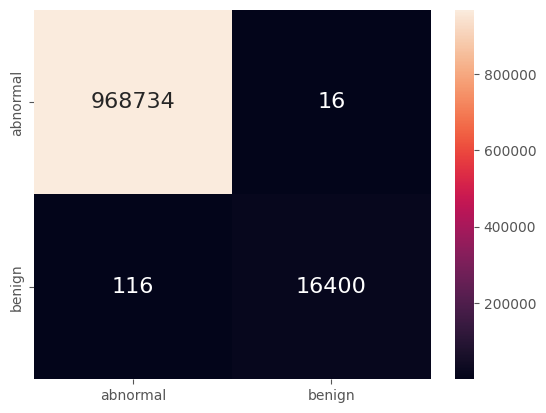

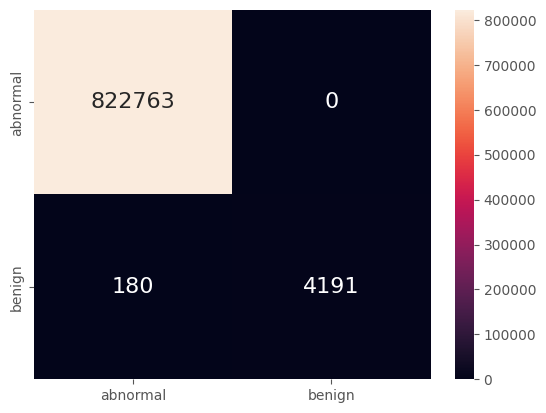

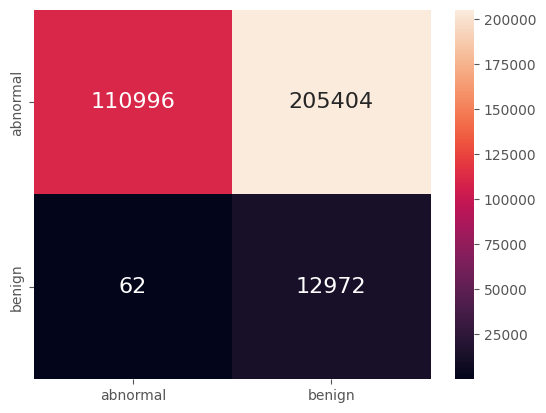

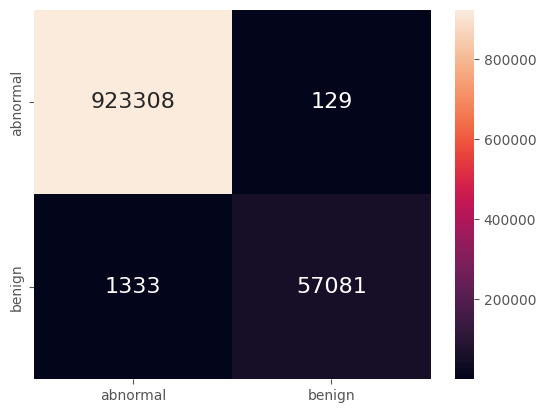

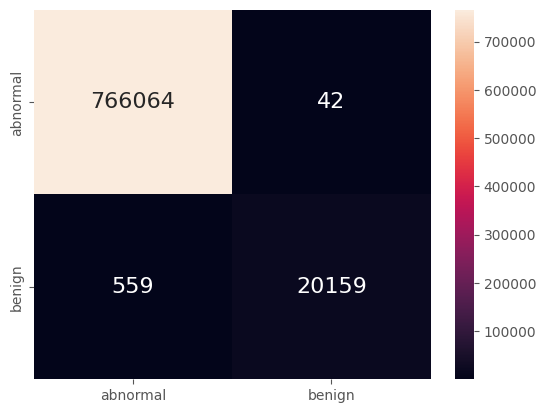

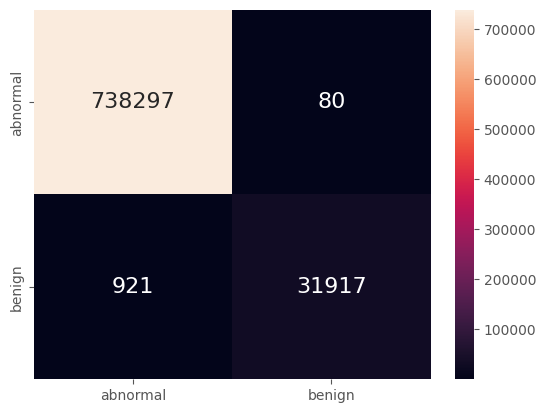

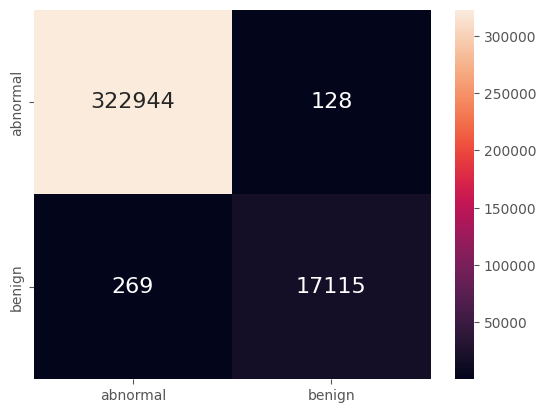

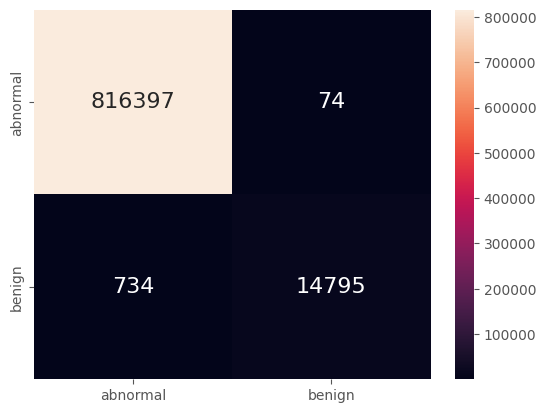

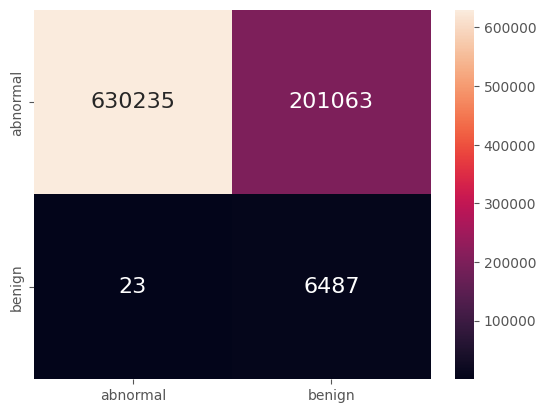

In [ ]:
"""
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 6 Optimized Parameters for the AE Model:
    {'optimizer': <class 'torch.optim.adam.Adam'>, 'max_epochs': 10, 'lr': 0.001, 'batch_size': 128}
"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 128
def train_data_loaders(batch_size = batch_size):
    data_1 = torch.utils.data.DataLoader(benign_train_1, batch_size = batch_size, shuffle=True)
    data_2 = torch.utils.data.DataLoader(benign_train_2, batch_size = batch_size, shuffle=True)
    data_3 = torch.utils.data.DataLoader(benign_train_3, batch_size = batch_size, shuffle=True)
    data_4 = torch.utils.data.DataLoader(benign_train_4, batch_size = batch_size, shuffle=True)
    data_5 = torch.utils.data.DataLoader(benign_train_5, batch_size = batch_size, shuffle=True)
    data_6 = torch.utils.data.DataLoader(benign_train_6, batch_size = batch_size, shuffle=True)
    data_7 = torch.utils.data.DataLoader(benign_train_7, batch_size = batch_size, shuffle=True)
    data_8 = torch.utils.data.DataLoader(benign_train_8, batch_size = batch_size, shuffle=True)
    data_9 = torch.utils.data.DataLoader(benign_train_9, batch_size = batch_size, shuffle=True)

    client_loaders = {'D1': data_1,
                      'D2': data_2,
                      'D3': data_3,
                      'D4': data_4,
                      'D5': data_5,
                      'D6': data_6,
                      'D7': data_7,
                      'D8': data_8,
                      'D9': data_9}

    return client_loaders

"""
   Create the Data Generator for Retraining Process by Picking Baseline Data for each Device:
"""
baseline_num = 1000  # choose some data from the train set to retrain the data from trained model
def baseline_data(size = baseline_num, batch_size = batch_size):
    rng = np.random.default_rng()
    x_1 = rng.choice(benign_train_1, size=size, replace = True, shuffle = True, axis=0) # [[[[[[randomly select]]]]]]
    x_2 = rng.choice(benign_train_2, size=size, replace = True, shuffle = True, axis=0)
    x_3 = rng.choice(benign_train_3, size=size, replace = True, shuffle = True, axis=0)
    x_4 = rng.choice(benign_train_4, size=size, replace = True, shuffle = True, axis=0)
    x_5 = rng.choice(benign_train_5, size=size, replace = True, shuffle = True, axis=0)
    x_6 = rng.choice(benign_train_6, size=size, replace = True, shuffle = True, axis=0)
    x_7 = rng.choice(benign_train_7, size=size, replace = True, shuffle = True, axis=0)
    x_8 = rng.choice(benign_train_8, size=size, replace = True, shuffle = True, axis=0)
    x_9 = rng.choice(benign_train_9, size=size, replace = True, shuffle = True, axis=0)


    loader_1 = torch.utils.data.DataLoader(x_1, batch_size=batch_size)
    loader_2 = torch.utils.data.DataLoader(x_2, batch_size=batch_size)
    loader_3 = torch.utils.data.DataLoader(x_3, batch_size=batch_size)
    loader_4 = torch.utils.data.DataLoader(x_4, batch_size=batch_size)
    loader_5 = torch.utils.data.DataLoader(x_5, batch_size=batch_size)
    loader_6 = torch.utils.data.DataLoader(x_6, batch_size=batch_size)
    loader_7 = torch.utils.data.DataLoader(x_7, batch_size=batch_size)
    loader_8 = torch.utils.data.DataLoader(x_8, batch_size=batch_size)
    loader_9 = torch.utils.data.DataLoader(x_9, batch_size=batch_size)

    loaders = {'D1': loader_1,
               'D2': loader_2,
               'D3': loader_3,
               'D4': loader_4,
               'D5': loader_5,
               'D6': loader_6,
               'D7': loader_7,
               'D8': loader_8,
               'D9': loader_9}

    return loaders

"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
num_clients = 9      # Number of clients
num_selected = 9     # Typically, num_selected is around 30–40% of the num_clients.
num_rounds = 10       # Total number of communication rounds for the global model to train.
epochs = 10           # for train client model
retrain_epochs = 5   # Total number of retraining rounds on the global server after receiving the model weights
                     # from all the clients that participated in the communication round.

global_model = AEModel().to(device) # for example
client_models = [AEModel().to(device) for _ in range(num_selected)]
print(client_models)

for model in client_models:
    model.load_state_dict(global_model.state_dict())

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = [torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay=1e-05) for model in client_models]
baseline_data = baseline_data()
train_loader = train_data_loaders()
devices = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'] # All devices

"""
   Train The Federated Model:
"""
# Train Client Model and Global Model
train_loss_client = []
train_loss_global = []

start_time = time.time()

for r in range(num_rounds):

    print('\nround: ', r + 1)
    client_idx = np.random.permutation(num_clients)[:num_selected] # random pick some clients from all clients for train
    print('client_idx: ', client_idx)
    client_lens = [len(train_loader[devices[idx]]) for idx in client_idx ]
    print(client_lens)

    # Update All Clients:
    loss = 0
    for i in tqdm(range(num_selected)):
        client_syn(client_models[i], global_model)
        loss += client_update(client_models[i], opt[i], train_loader[devices[client_idx[i]]], epochs)
    train_loss_client.append(loss)

    # Retrain the Model on the Global Server:
    loss_retrain = 0
    for i in tqdm(range(num_selected)):
        loss_retrain += client_update(client_models[i], opt[i], baseline_data[devices[client_idx[i]]], retrain_epochs)
    train_loss_global.append(loss_retrain/num_selected)

    # Aggregate all Client Models:
    server_aggregate_M(global_model, client_models, client_lens)

    print("\nclient_loss: ", loss)
    print('global_loss: ', loss_retrain/num_selected)

# save model
torch.save(global_model, 'global_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Global Model - AutoEncoder Model
"""
global_model = torch.load('global_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(global_model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(global_model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(global_model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(global_model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(global_model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(global_model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(global_model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(global_model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(global_model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(global_model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(global_model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(global_model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(global_model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(global_model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(global_model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(global_model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(global_model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(global_model, thr_9, mix_data_9, mix_label_9)


TIME: 0.17864161332448322mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99999 
FPR: 0.00696

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.02631

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35081 
FPR: 0.00476

D4: 
Acc: 0.998% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99986 
FPR: 0.02313

D5: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99993 
FPR: 0.03268

D6: 
Acc: 0.998% 
Precision: 0.998 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99988 
FPR: 0.03432

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99959 
FPR: 0.01559

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99990 
FPR: 0.04733

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75813 
FPR: 0.00353


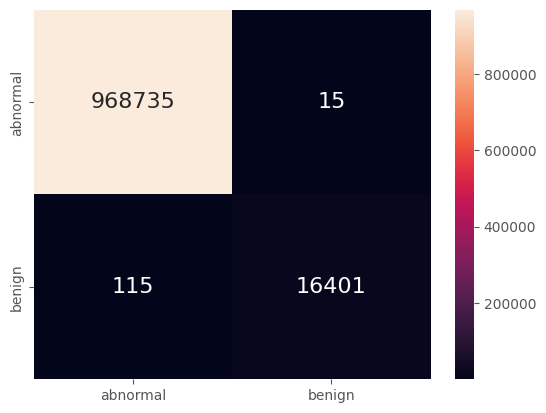

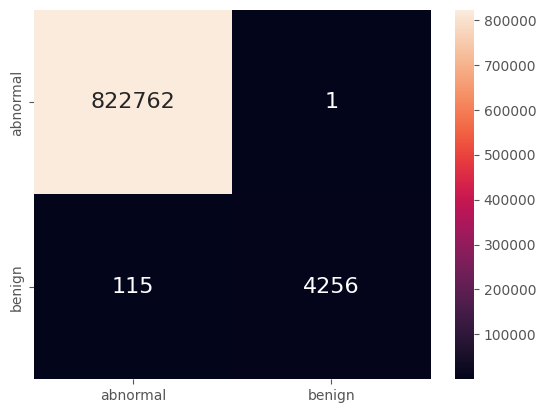

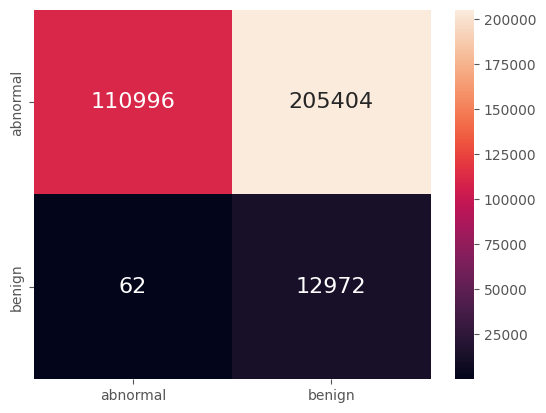

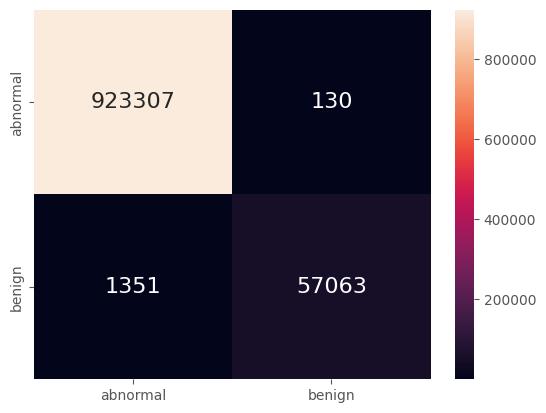

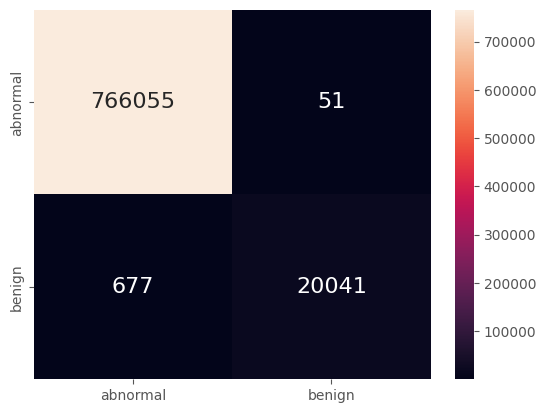

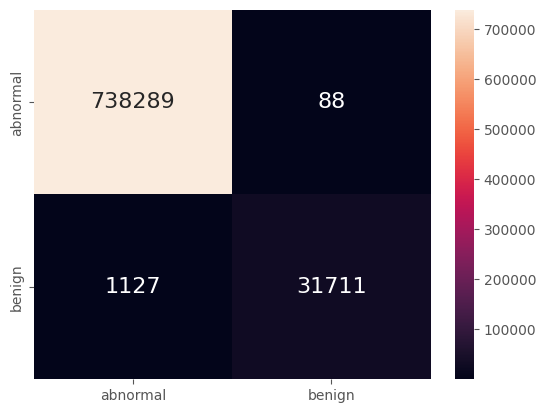

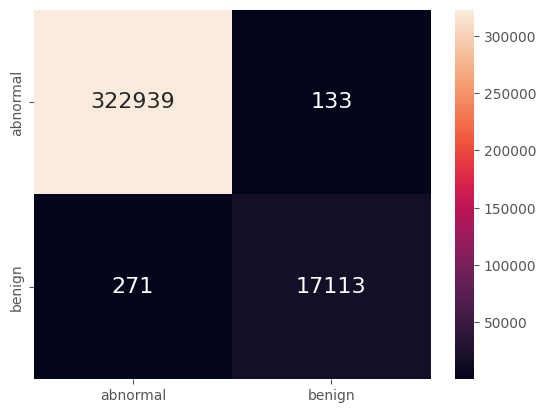

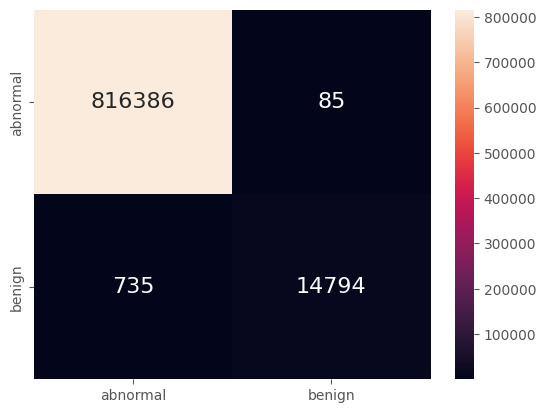

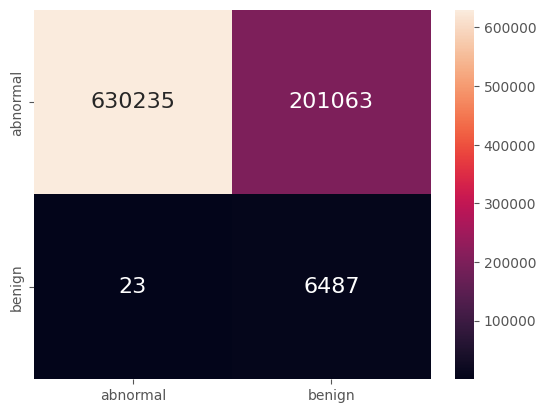

In [ ]:
"""
    Create the Data Generator for Main Training Process by Collecting Training Data of each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Non-Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 6 Optimized Parameters for the AE Model -  Non- Federated Learning:
    {'optimizer': <class 'torch.optim.adam.Adam'>, 'max_epochs': 10, 'lr': 0.001, 'batch_size': 128}

"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 128
def train_data_loaders(batch_size = batch_size):
    data_6 = torch.utils.data.DataLoader(benign_train_6, batch_size = batch_size, shuffle=True)
    return data_6


"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
epochs = 10           # for train client model

# Model Initialization
model = AEModel().to(device) # for example

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay=1e-05)
train_loader = train_data_loaders()

"""
   Train The Non- Federated Model:
"""

# Train Non-FL Model
train_loss_client = []

start_time = time.time()

model.train()
for e in range(epochs):
    running_loss = 0.0
    for bx, (data) in enumerate(train_loader):
        output = model(data.float())
        opt.zero_grad()
        loss = nn.MSELoss(reduction='mean')(data.float().to(device), output)
        loss.backward()
        opt.step()
        # print(loss.item())
        running_loss += loss.item()
    # print(running_loss)
    epoch_loss = running_loss/len(train_loader)

# save model
torch.save(model, 'Non_FL_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Non-FL Model - AutoEncoder Model
"""
model = torch.load('Non_FL_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(model, thr_9, mix_data_9, mix_label_9)

[AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=True)
    (7): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=28, out_features=37, bias=True)
    (1): Tanh()
    (2): Linear(in_features=37, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=86, bias=True)
    (5): Tanh()
    (6): Linear(in_features=86, out_features=115, bias=True)
    (7): Tanh()
  )
), AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=Tr

100%|██████████| 9/9 [00:00<00:00, 10.98it/s]



client_loss:  9.045522036460735
global_loss:  0.9589004500044717

round:  2
client_idx:  [8 4 5 2 3 7 1 6 0]
[26, 81, 129, 51, 229, 61, 18, 68, 65]


100%|██████████| 9/9 [00:00<00:00, 11.93it/s]



client_loss:  12.41101067647956
global_loss:  1.3414521581596799

round:  3
client_idx:  [3 8 2 1 0 6 7 4 5]
[229, 26, 51, 18, 65, 68, 61, 81, 129]


100%|██████████| 9/9 [00:00<00:00, 11.31it/s]



client_loss:  12.418778753765977
global_loss:  1.3414521581596799

round:  4
client_idx:  [6 4 1 5 7 8 0 3 2]
[68, 81, 18, 129, 61, 26, 65, 229, 51]


100%|██████████| 9/9 [00:00<00:00, 11.51it/s]



client_loss:  12.372285866959698
global_loss:  1.3414521581596799

round:  5
client_idx:  [7 8 5 1 6 4 3 2 0]
[61, 26, 129, 18, 68, 81, 229, 51, 65]


100%|██████████| 9/9 [00:00<00:00, 11.38it/s]



client_loss:  12.394532138797338
global_loss:  1.3414521581596799

round:  6
client_idx:  [2 3 5 7 4 1 8 0 6]
[51, 229, 129, 61, 81, 18, 26, 65, 68]


100%|██████████| 9/9 [00:00<00:00, 11.57it/s]



client_loss:  12.366111229915724
global_loss:  1.3414521581596799

round:  7
client_idx:  [1 3 6 7 5 8 0 2 4]
[18, 229, 68, 61, 129, 26, 65, 51, 81]


100%|██████████| 9/9 [00:00<00:00, 10.65it/s]



client_loss:  12.427673788923205
global_loss:  1.3414521581596799

round:  8
client_idx:  [8 1 5 2 7 3 0 6 4]
[26, 18, 129, 51, 61, 229, 65, 68, 81]


100%|██████████| 9/9 [00:00<00:00, 11.09it/s]



client_loss:  12.409893243894311
global_loss:  1.3414521581596799

round:  9
client_idx:  [1 6 5 2 0 8 3 4 7]
[18, 68, 129, 51, 65, 26, 229, 81, 61]


100%|██████████| 9/9 [00:00<00:00, 11.04it/s]



client_loss:  12.389490265424765
global_loss:  1.3414521581596799

round:  10
client_idx:  [4 3 5 1 2 7 0 8 6]
[81, 229, 129, 18, 51, 61, 65, 26, 68]


100%|██████████| 9/9 [00:00<00:00, 11.28it/s]



client_loss:  12.402399323334636
global_loss:  1.3414521581596799

TIME: 22.84340267976125mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99998 
FPR: 0.00702

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.04118

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35081 
FPR: 0.00476

D4: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99986 
FPR: 0.02282

D5: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99994 
FPR: 0.02698

D6: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99989 
FPR: 0.02805

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99960 
FPR: 0.01547

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99991 
FPR: 0.04727

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75813 
FPR: 0.00353


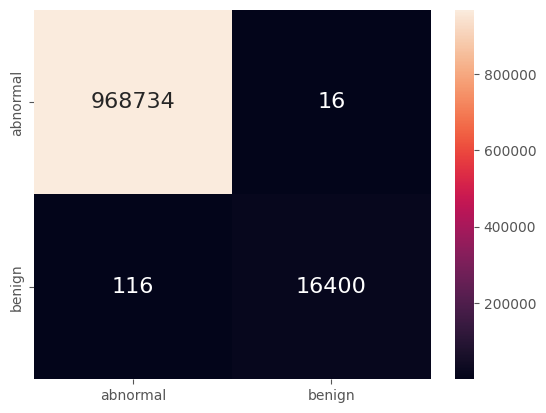

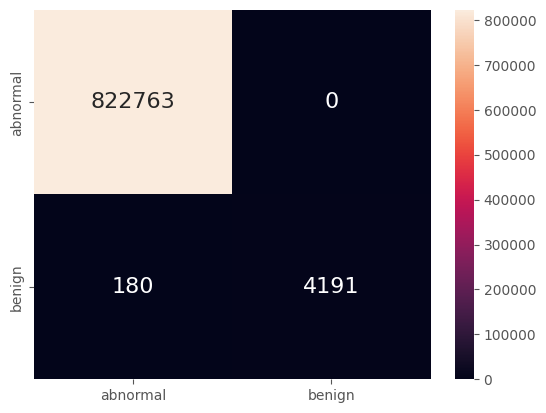

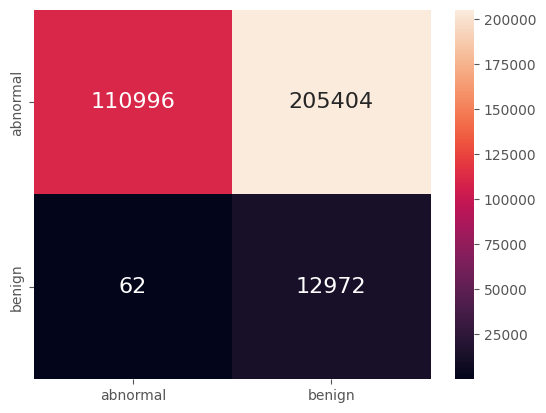

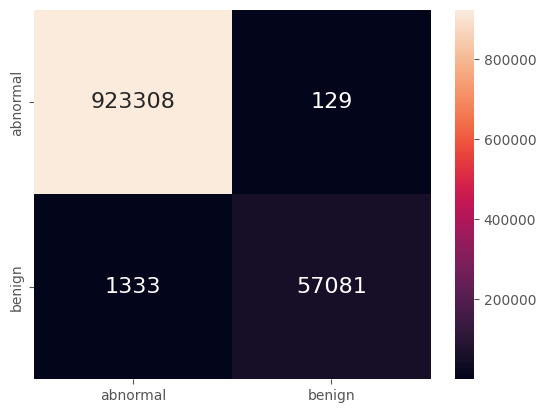

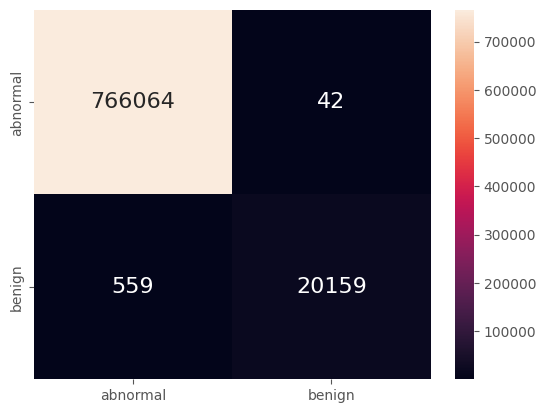

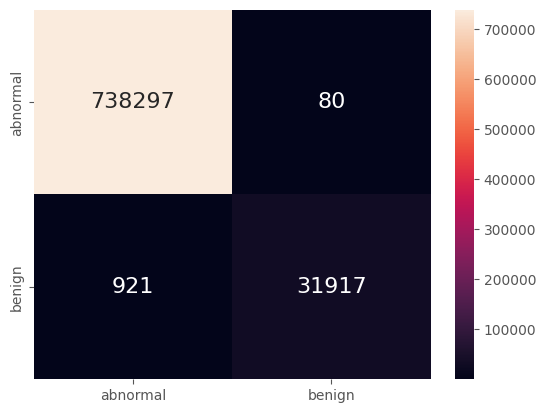

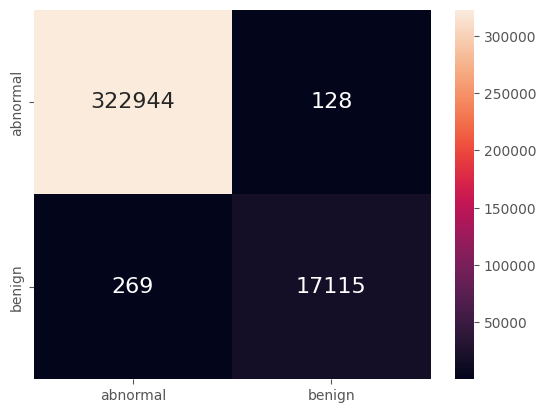

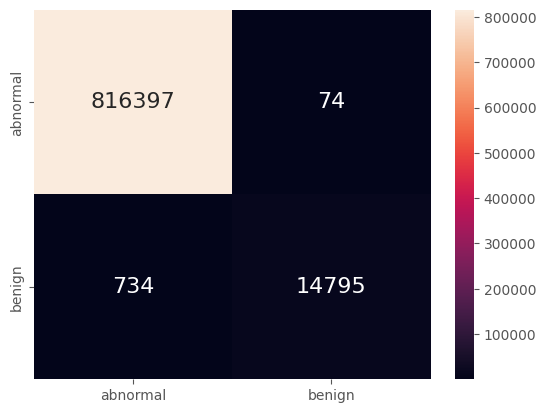

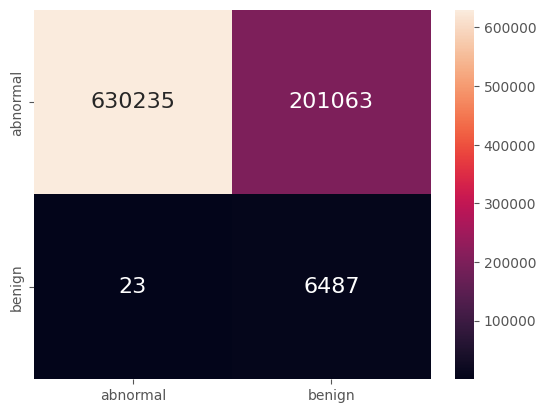

In [ ]:
"""
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 7 Optimized Parameters for the AE Model:
    {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 40, 'lr': 0.0001, 'batch_size': 256}
"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 256
def train_data_loaders(batch_size = batch_size):
    data_1 = torch.utils.data.DataLoader(benign_train_1, batch_size = batch_size, shuffle=True)
    data_2 = torch.utils.data.DataLoader(benign_train_2, batch_size = batch_size, shuffle=True)
    data_3 = torch.utils.data.DataLoader(benign_train_3, batch_size = batch_size, shuffle=True)
    data_4 = torch.utils.data.DataLoader(benign_train_4, batch_size = batch_size, shuffle=True)
    data_5 = torch.utils.data.DataLoader(benign_train_5, batch_size = batch_size, shuffle=True)
    data_6 = torch.utils.data.DataLoader(benign_train_6, batch_size = batch_size, shuffle=True)
    data_7 = torch.utils.data.DataLoader(benign_train_7, batch_size = batch_size, shuffle=True)
    data_8 = torch.utils.data.DataLoader(benign_train_8, batch_size = batch_size, shuffle=True)
    data_9 = torch.utils.data.DataLoader(benign_train_9, batch_size = batch_size, shuffle=True)

    client_loaders = {'D1': data_1,
                      'D2': data_2,
                      'D3': data_3,
                      'D4': data_4,
                      'D5': data_5,
                      'D6': data_6,
                      'D7': data_7,
                      'D8': data_8,
                      'D9': data_9}

    return client_loaders

"""
   Create the Data Generator for Retraining Process by Picking Baseline Data for each Device:
"""
baseline_num = 1000  # choose some data from the train set to retrain the data from trained model
def baseline_data(size = baseline_num, batch_size = batch_size):
    rng = np.random.default_rng()
    x_1 = rng.choice(benign_train_1, size=size, replace = True, shuffle = True, axis=0) # [[[[[[randomly select]]]]]]
    x_2 = rng.choice(benign_train_2, size=size, replace = True, shuffle = True, axis=0)
    x_3 = rng.choice(benign_train_3, size=size, replace = True, shuffle = True, axis=0)
    x_4 = rng.choice(benign_train_4, size=size, replace = True, shuffle = True, axis=0)
    x_5 = rng.choice(benign_train_5, size=size, replace = True, shuffle = True, axis=0)
    x_6 = rng.choice(benign_train_6, size=size, replace = True, shuffle = True, axis=0)
    x_7 = rng.choice(benign_train_7, size=size, replace = True, shuffle = True, axis=0)
    x_8 = rng.choice(benign_train_8, size=size, replace = True, shuffle = True, axis=0)
    x_9 = rng.choice(benign_train_9, size=size, replace = True, shuffle = True, axis=0)


    loader_1 = torch.utils.data.DataLoader(x_1, batch_size=batch_size)
    loader_2 = torch.utils.data.DataLoader(x_2, batch_size=batch_size)
    loader_3 = torch.utils.data.DataLoader(x_3, batch_size=batch_size)
    loader_4 = torch.utils.data.DataLoader(x_4, batch_size=batch_size)
    loader_5 = torch.utils.data.DataLoader(x_5, batch_size=batch_size)
    loader_6 = torch.utils.data.DataLoader(x_6, batch_size=batch_size)
    loader_7 = torch.utils.data.DataLoader(x_7, batch_size=batch_size)
    loader_8 = torch.utils.data.DataLoader(x_8, batch_size=batch_size)
    loader_9 = torch.utils.data.DataLoader(x_9, batch_size=batch_size)

    loaders = {'D1': loader_1,
               'D2': loader_2,
               'D3': loader_3,
               'D4': loader_4,
               'D5': loader_5,
               'D6': loader_6,
               'D7': loader_7,
               'D8': loader_8,
               'D9': loader_9}

    return loaders

"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
num_clients = 9      # Number of clients
num_selected = 9     # Typically, num_selected is around 30–40% of the num_clients.
num_rounds = 10       # Total number of communication rounds for the global model to train.
epochs = 40           # for train client model
retrain_epochs = 5   # Total number of retraining rounds on the global server after receiving the model weights
                     # from all the clients that participated in the communication round.

global_model = AEModel().to(device) # for example
client_models = [AEModel().to(device) for _ in range(num_selected)]
print(client_models)

for model in client_models:
    model.load_state_dict(global_model.state_dict())

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = [torch.optim.SGD(model.parameters(), lr = 0.0001, weight_decay=1e-05, momentum=0.9) for model in client_models]
baseline_data = baseline_data()
train_loader = train_data_loaders()
devices = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'] # All devices

"""
   Train The Federated Model:
"""
# Train Client Model and Global Model
train_loss_client = []
train_loss_global = []

start_time = time.time()

for r in range(num_rounds):

    print('\nround: ', r + 1)
    client_idx = np.random.permutation(num_clients)[:num_selected] # random pick some clients from all clients for train
    print('client_idx: ', client_idx)
    client_lens = [len(train_loader[devices[idx]]) for idx in client_idx ]
    print(client_lens)

    # Update All Clients:
    loss = 0
    for i in tqdm(range(num_selected)):
        client_syn(client_models[i], global_model)
        loss += client_update(client_models[i], opt[i], train_loader[devices[client_idx[i]]], epochs)
    train_loss_client.append(loss)

    # Retrain the Model on the Global Server:
    loss_retrain = 0
    for i in tqdm(range(num_selected)):
        loss_retrain += client_update(client_models[i], opt[i], baseline_data[devices[client_idx[i]]], retrain_epochs)
    train_loss_global.append(loss_retrain/num_selected)

    # Aggregate all Client Models:
    server_aggregate_M(global_model, client_models, client_lens)

    print("\nclient_loss: ", loss)
    print('global_loss: ', loss_retrain/num_selected)

# save model
torch.save(global_model, 'global_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Global Model - AutoEncoder Model
"""
global_model = torch.load('global_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(global_model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(global_model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(global_model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(global_model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(global_model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(global_model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(global_model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(global_model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(global_model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(global_model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(global_model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(global_model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(global_model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(global_model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(global_model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(global_model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(global_model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(global_model, thr_9, mix_data_9, mix_label_9)


TIME: 0.26456867853800453mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99999 
FPR: 0.00702

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.03523

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35083 
FPR: 0.00568

D4: 
Acc: 0.998% 
Precision: 0.998 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99986 
FPR: 0.02407

D5: 
Acc: 0.997% 
Precision: 0.997 
Recall: 1.000 
F1score: 0.998 
TPR: 0.99992 
FPR: 0.10923

D6: 
Acc: 0.997% 
Precision: 0.997 
Recall: 1.000 
F1score: 0.998 
TPR: 0.99988 
FPR: 0.06964

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99961 
FPR: 0.01553

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99991 
FPR: 0.04920

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75814 
FPR: 0.00369


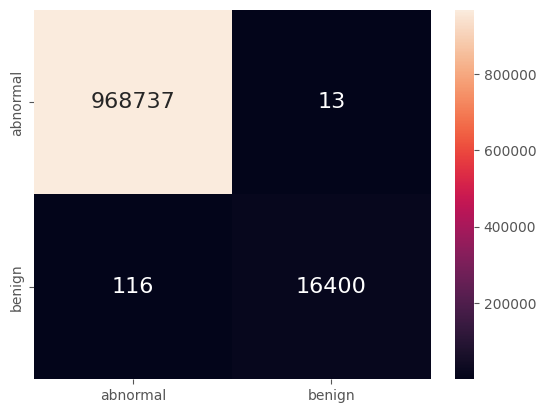

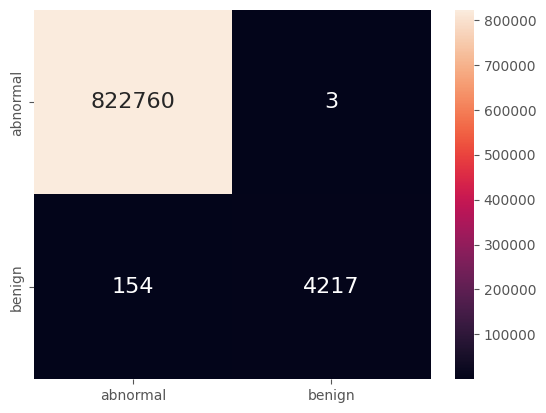

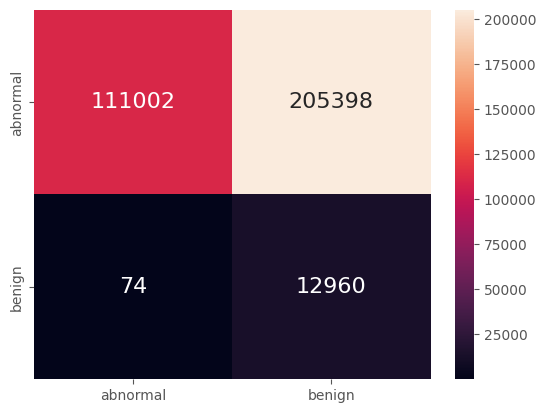

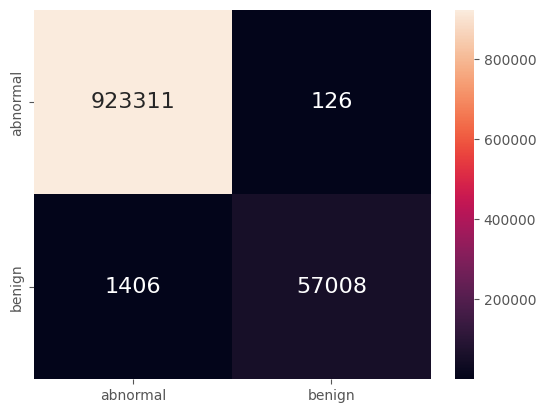

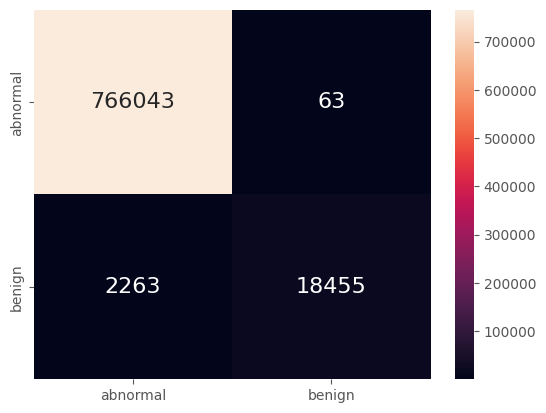

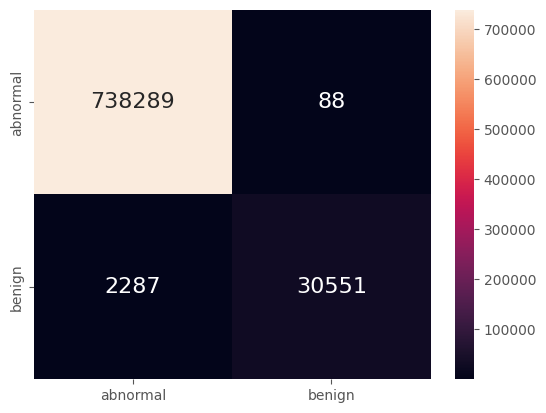

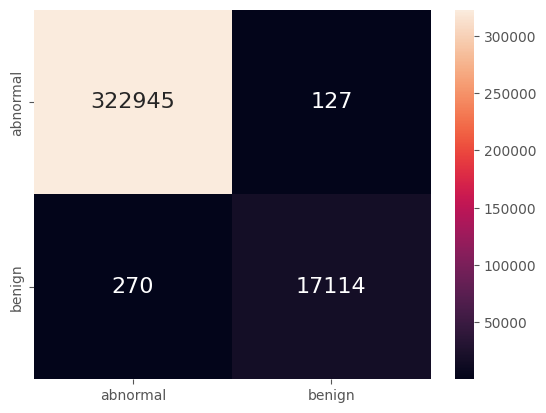

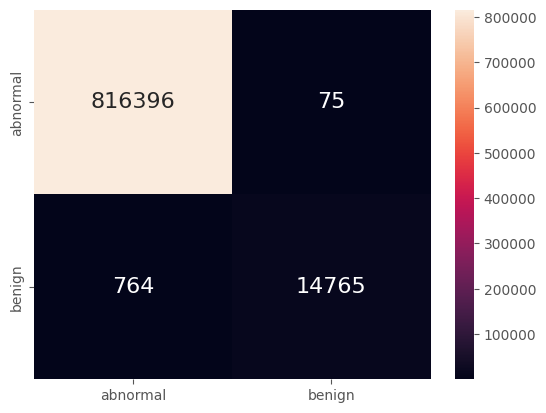

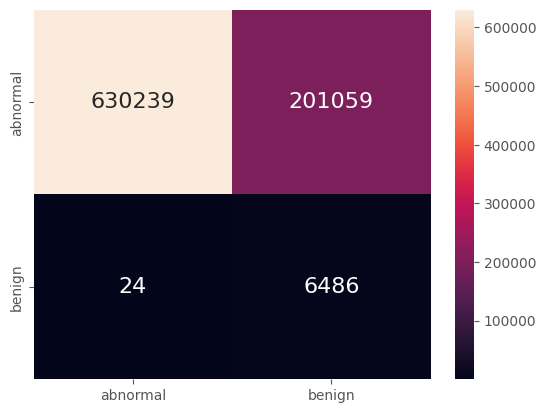

In [ ]:
"""
    Create the Data Generator for Main Training Process by Collecting Training Data of each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Non-Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 7 Optimized Parameters for the AE Model -  Non- Federated Learning:
    {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 40, 'lr': 0.0001, 'batch_size': 256}

"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 256
def train_data_loaders(batch_size = batch_size):
    data_7 = torch.utils.data.DataLoader(benign_train_7, batch_size = batch_size, shuffle=True)
    return data_7


"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
epochs = 40           # for train client model

# Model Initialization
model = AEModel().to(device) # for example

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = torch.optim.SGD(model.parameters(), lr = 0.0001, weight_decay=1e-05, momentum=0.9)
train_loader = train_data_loaders()

"""
   Train The Non- Federated Model:
"""

# Train Non-FL Model
train_loss_client = []

start_time = time.time()

model.train()
for e in range(epochs):
    running_loss = 0.0
    for bx, (data) in enumerate(train_loader):
        output = model(data.float())
        opt.zero_grad()
        loss = nn.MSELoss(reduction='mean')(data.float().to(device), output)
        loss.backward()
        opt.step()
        # print(loss.item())
        running_loss += loss.item()
    # print(running_loss)
    epoch_loss = running_loss/len(train_loader)

# save model
torch.save(model, 'Non_FL_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Non-FL Model - AutoEncoder Model
"""
model = torch.load('Non_FL_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(model, thr_9, mix_data_9, mix_label_9)

[AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=True)
    (7): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=28, out_features=37, bias=True)
    (1): Tanh()
    (2): Linear(in_features=37, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=86, bias=True)
    (5): Tanh()
    (6): Linear(in_features=86, out_features=115, bias=True)
    (7): Tanh()
  )
), AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=Tr

100%|██████████| 9/9 [00:01<00:00,  5.30it/s]



client_loss:  5.960251171961013
global_loss:  0.7112077451311052

round:  2
client_idx:  [0 3 5 7 4 6 1 8 2]
[259, 913, 514, 243, 324, 272, 69, 102, 204]


100%|██████████| 9/9 [00:01<00:00,  5.52it/s]



client_loss:  12.398846727466347
global_loss:  1.430673745357328

round:  3
client_idx:  [6 1 3 8 7 5 0 2 4]
[272, 69, 913, 102, 243, 514, 259, 204, 324]


100%|██████████| 9/9 [00:01<00:00,  5.30it/s]



client_loss:  12.398943047576807
global_loss:  1.430673745357328

round:  4
client_idx:  [1 4 8 7 3 6 2 5 0]
[69, 324, 102, 243, 913, 272, 204, 514, 259]


100%|██████████| 9/9 [00:01<00:00,  5.47it/s]



client_loss:  12.391458281323448
global_loss:  1.430673745357328

round:  5
client_idx:  [0 4 7 5 1 6 2 8 3]
[259, 324, 243, 514, 69, 272, 204, 102, 913]


100%|██████████| 9/9 [00:01<00:00,  5.49it/s]



client_loss:  12.399208285403436
global_loss:  1.430673745357328

round:  6
client_idx:  [7 2 0 6 8 5 3 4 1]
[243, 204, 259, 272, 102, 514, 913, 324, 69]


100%|██████████| 9/9 [00:01<00:00,  5.57it/s]



client_loss:  12.404113211963246
global_loss:  1.430673745357328

round:  7
client_idx:  [6 0 7 1 8 3 5 2 4]
[272, 259, 243, 69, 102, 913, 514, 204, 324]


100%|██████████| 9/9 [00:01<00:00,  5.56it/s]



client_loss:  12.391523365608334
global_loss:  1.430673745357328

round:  8
client_idx:  [4 2 7 0 8 6 5 3 1]
[324, 204, 243, 259, 102, 272, 514, 913, 69]


100%|██████████| 9/9 [00:01<00:00,  5.28it/s]



client_loss:  12.394427231965551
global_loss:  1.430673745357328

round:  9
client_idx:  [3 1 8 0 5 4 2 6 7]
[913, 69, 102, 259, 514, 324, 204, 272, 243]


100%|██████████| 9/9 [00:01<00:00,  5.43it/s]



client_loss:  12.40600360884427
global_loss:  1.430673745357328

round:  10
client_idx:  [6 7 4 1 5 3 8 0 2]
[272, 243, 324, 69, 514, 913, 102, 259, 204]


100%|██████████| 9/9 [00:01<00:00,  5.23it/s]



client_loss:  12.397758364905126
global_loss:  1.430673745357328

TIME: 46.915217300256096mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99998 
FPR: 0.00702

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.04118

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35081 
FPR: 0.00476

D4: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99986 
FPR: 0.02282

D5: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99994 
FPR: 0.02698

D6: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99989 
FPR: 0.02805

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99960 
FPR: 0.01547

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99991 
FPR: 0.04727

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75813 
FPR: 0.00353


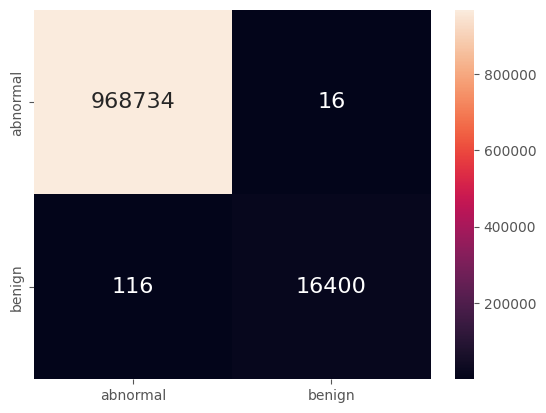

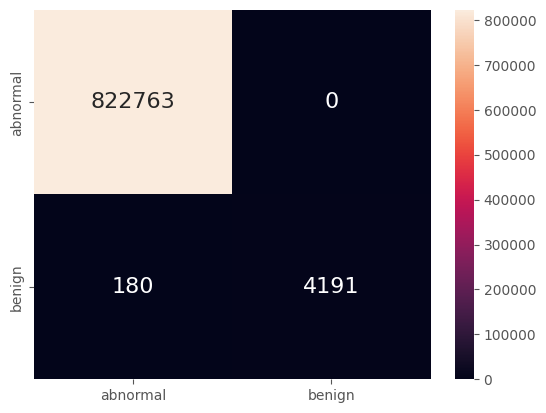

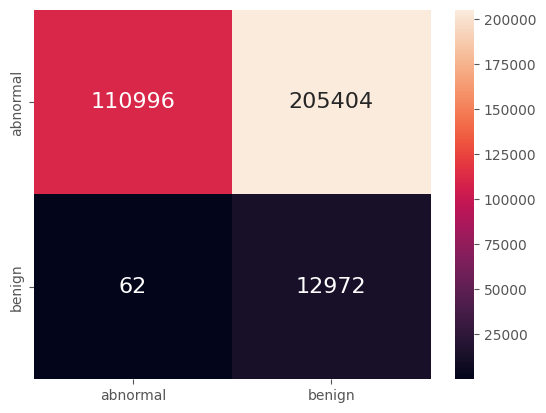

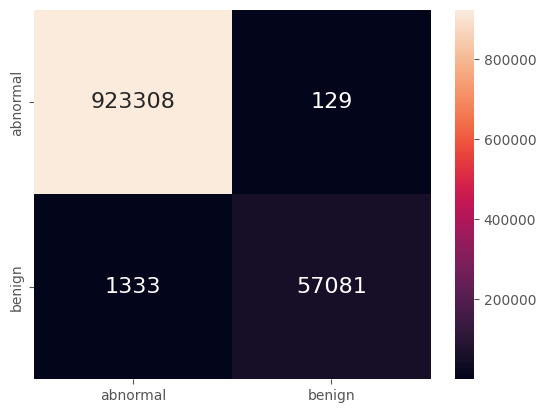

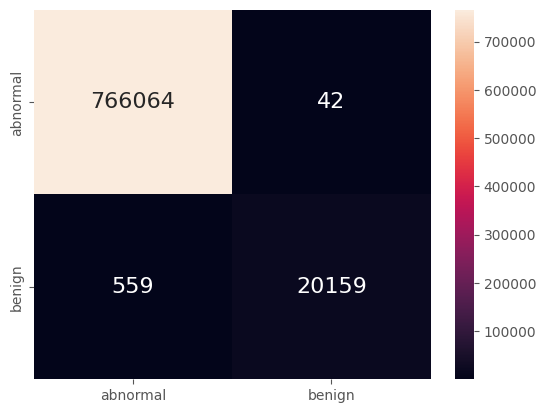

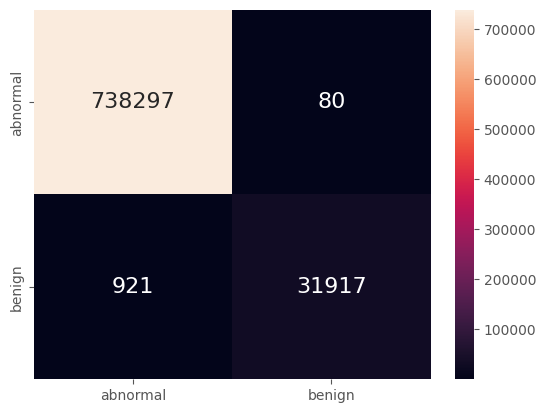

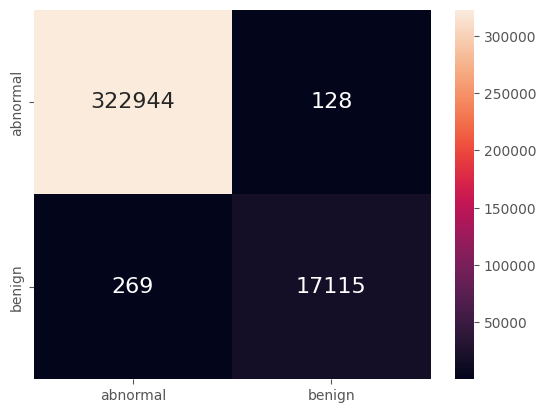

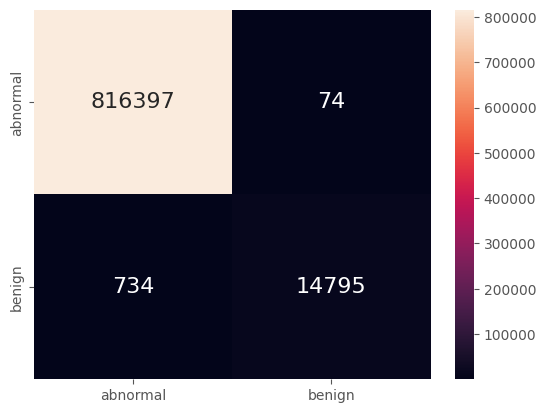

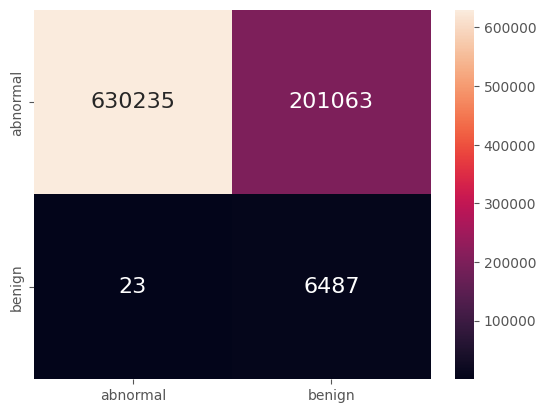

In [ ]:
"""
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 8 Optimized Parameters for the AE Model:
    {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 40, 'lr': 0.001, 'batch_size': 64}
"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 64
def train_data_loaders(batch_size = batch_size):
    data_1 = torch.utils.data.DataLoader(benign_train_1, batch_size = batch_size, shuffle=True)
    data_2 = torch.utils.data.DataLoader(benign_train_2, batch_size = batch_size, shuffle=True)
    data_3 = torch.utils.data.DataLoader(benign_train_3, batch_size = batch_size, shuffle=True)
    data_4 = torch.utils.data.DataLoader(benign_train_4, batch_size = batch_size, shuffle=True)
    data_5 = torch.utils.data.DataLoader(benign_train_5, batch_size = batch_size, shuffle=True)
    data_6 = torch.utils.data.DataLoader(benign_train_6, batch_size = batch_size, shuffle=True)
    data_7 = torch.utils.data.DataLoader(benign_train_7, batch_size = batch_size, shuffle=True)
    data_8 = torch.utils.data.DataLoader(benign_train_8, batch_size = batch_size, shuffle=True)
    data_9 = torch.utils.data.DataLoader(benign_train_9, batch_size = batch_size, shuffle=True)

    client_loaders = {'D1': data_1,
                      'D2': data_2,
                      'D3': data_3,
                      'D4': data_4,
                      'D5': data_5,
                      'D6': data_6,
                      'D7': data_7,
                      'D8': data_8,
                      'D9': data_9}

    return client_loaders

"""
   Create the Data Generator for Retraining Process by Picking Baseline Data for each Device:
"""
baseline_num = 1000  # choose some data from the train set to retrain the data from trained model
def baseline_data(size = baseline_num, batch_size = batch_size):
    rng = np.random.default_rng()
    x_1 = rng.choice(benign_train_1, size=size, replace = True, shuffle = True, axis=0) # [[[[[[randomly select]]]]]]
    x_2 = rng.choice(benign_train_2, size=size, replace = True, shuffle = True, axis=0)
    x_3 = rng.choice(benign_train_3, size=size, replace = True, shuffle = True, axis=0)
    x_4 = rng.choice(benign_train_4, size=size, replace = True, shuffle = True, axis=0)
    x_5 = rng.choice(benign_train_5, size=size, replace = True, shuffle = True, axis=0)
    x_6 = rng.choice(benign_train_6, size=size, replace = True, shuffle = True, axis=0)
    x_7 = rng.choice(benign_train_7, size=size, replace = True, shuffle = True, axis=0)
    x_8 = rng.choice(benign_train_8, size=size, replace = True, shuffle = True, axis=0)
    x_9 = rng.choice(benign_train_9, size=size, replace = True, shuffle = True, axis=0)


    loader_1 = torch.utils.data.DataLoader(x_1, batch_size=batch_size)
    loader_2 = torch.utils.data.DataLoader(x_2, batch_size=batch_size)
    loader_3 = torch.utils.data.DataLoader(x_3, batch_size=batch_size)
    loader_4 = torch.utils.data.DataLoader(x_4, batch_size=batch_size)
    loader_5 = torch.utils.data.DataLoader(x_5, batch_size=batch_size)
    loader_6 = torch.utils.data.DataLoader(x_6, batch_size=batch_size)
    loader_7 = torch.utils.data.DataLoader(x_7, batch_size=batch_size)
    loader_8 = torch.utils.data.DataLoader(x_8, batch_size=batch_size)
    loader_9 = torch.utils.data.DataLoader(x_9, batch_size=batch_size)

    loaders = {'D1': loader_1,
               'D2': loader_2,
               'D3': loader_3,
               'D4': loader_4,
               'D5': loader_5,
               'D6': loader_6,
               'D7': loader_7,
               'D8': loader_8,
               'D9': loader_9}

    return loaders

"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
num_clients = 9      # Number of clients
num_selected = 9     # Typically, num_selected is around 30–40% of the num_clients.
num_rounds = 10       # Total number of communication rounds for the global model to train.
epochs = 40           # for train client model
retrain_epochs = 5   # Total number of retraining rounds on the global server after receiving the model weights
                     # from all the clients that participated in the communication round.

global_model = AEModel().to(device) # for example
client_models = [AEModel().to(device) for _ in range(num_selected)]
print(client_models)

for model in client_models:
    model.load_state_dict(global_model.state_dict())

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = [torch.optim.SGD(model.parameters(), lr = 0.001, weight_decay=1e-05, momentum=0.9) for model in client_models]
baseline_data = baseline_data()
train_loader = train_data_loaders()
devices = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'] # All devices

"""
   Train The Federated Model:
"""
# Train Client Model and Global Model
train_loss_client = []
train_loss_global = []

start_time = time.time()

for r in range(num_rounds):

    print('\nround: ', r + 1)
    client_idx = np.random.permutation(num_clients)[:num_selected] # random pick some clients from all clients for train
    print('client_idx: ', client_idx)
    client_lens = [len(train_loader[devices[idx]]) for idx in client_idx ]
    print(client_lens)

    # Update All Clients:
    loss = 0
    for i in tqdm(range(num_selected)):
        client_syn(client_models[i], global_model)
        loss += client_update(client_models[i], opt[i], train_loader[devices[client_idx[i]]], epochs)
    train_loss_client.append(loss)

    # Retrain the Model on the Global Server:
    loss_retrain = 0
    for i in tqdm(range(num_selected)):
        loss_retrain += client_update(client_models[i], opt[i], baseline_data[devices[client_idx[i]]], retrain_epochs)
    train_loss_global.append(loss_retrain/num_selected)

    # Aggregate all Client Models:
    server_aggregate_M(global_model, client_models, client_lens)

    print("\nclient_loss: ", loss)
    print('global_loss: ', loss_retrain/num_selected)

# save model
torch.save(global_model, 'global_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Global Model - AutoEncoder Model
"""
global_model = torch.load('global_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(global_model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(global_model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(global_model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(global_model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(global_model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(global_model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(global_model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(global_model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(global_model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(global_model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(global_model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(global_model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(global_model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(global_model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(global_model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(global_model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(global_model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(global_model, thr_9, mix_data_9, mix_label_9)


TIME: 0.3931706309318542mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99999 
FPR: 0.00696

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99999 
FPR: 0.03706

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35082 
FPR: 0.00476

D4: 
Acc: 0.998% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99987 
FPR: 0.02338

D5: 
Acc: 0.997% 
Precision: 0.997 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99992 
FPR: 0.09649

D6: 
Acc: 0.997% 
Precision: 0.997 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99988 
FPR: 0.05682

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99962 
FPR: 0.01536

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99990 
FPR: 0.04424

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75814 
FPR: 0.00369


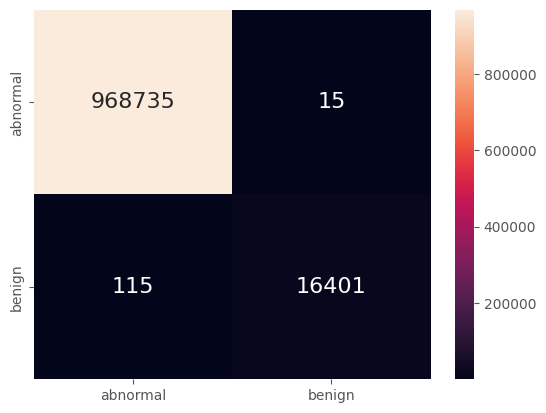

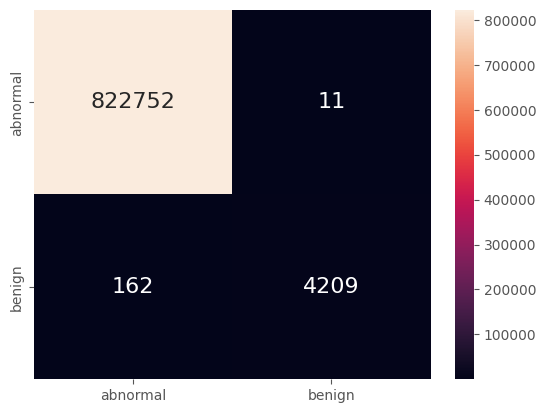

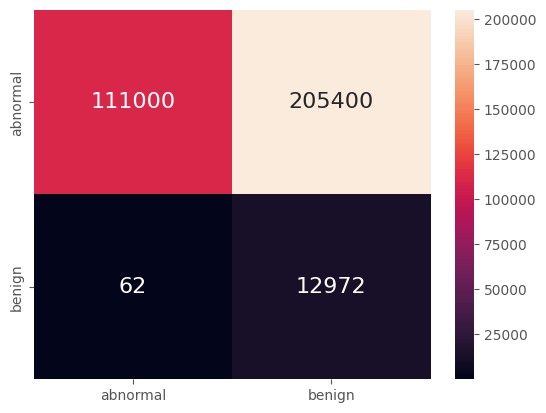

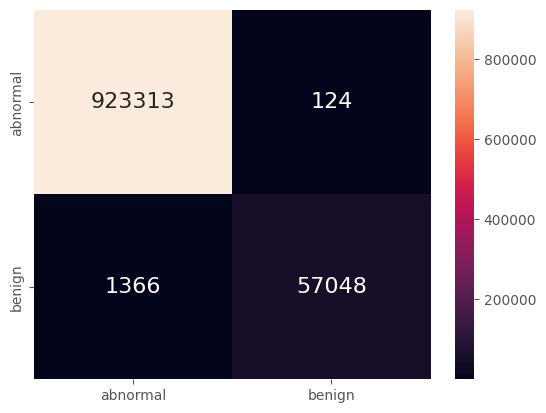

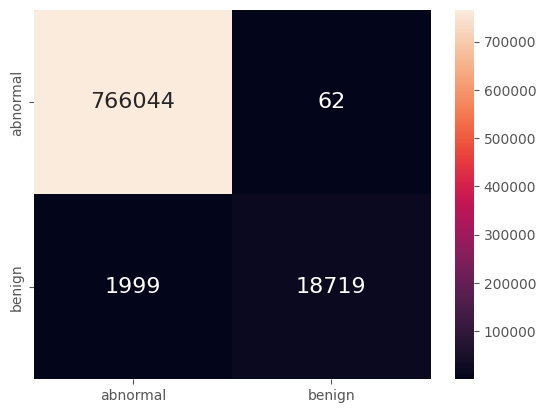

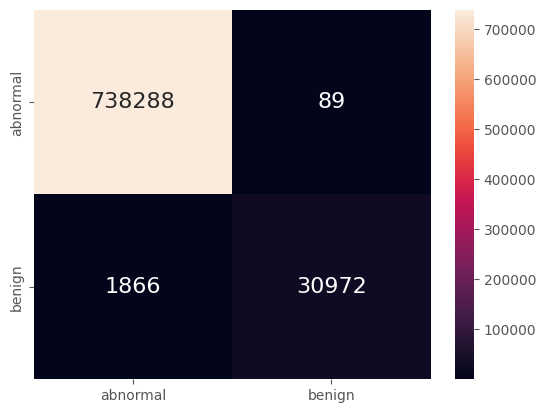

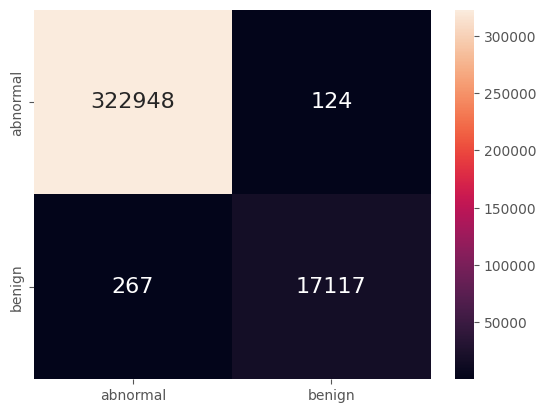

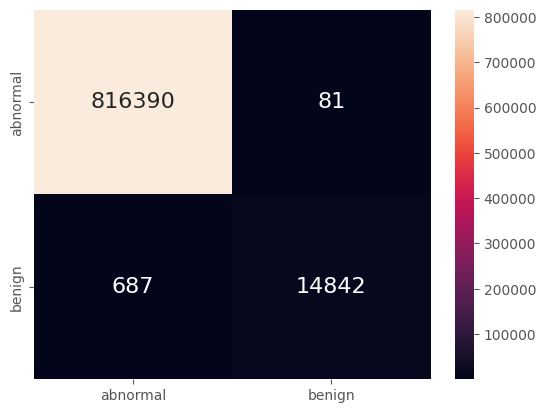

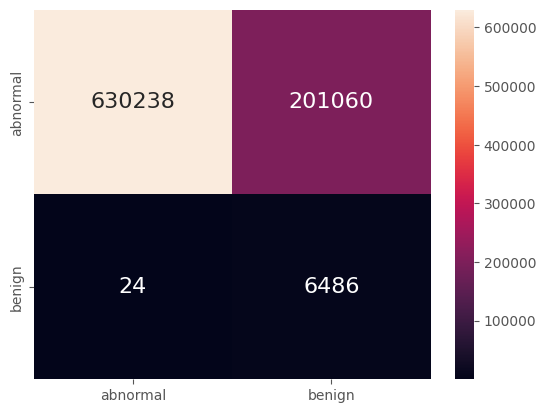

In [ ]:
"""
    Create the Data Generator for Main Training Process by Collecting Training Data of each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Non-Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 8 Optimized Parameters for the AE Model -  Non- Federated Learning:
    {'optimizer': <class 'torch.optim.sgd.SGD'>, 'max_epochs': 40, 'lr': 0.001, 'batch_size': 64}

"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 64
def train_data_loaders(batch_size = batch_size):
    data_8 = torch.utils.data.DataLoader(benign_train_8, batch_size = batch_size, shuffle=True)
    return data_8


"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
epochs = 40           # for train client model

# Model Initialization
model = AEModel().to(device) # for example

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = torch.optim.SGD(model.parameters(), lr = 0.001, weight_decay=1e-05, momentum=0.9)
train_loader = train_data_loaders()

"""
   Train The Non- Federated Model:
"""

# Train Non-FL Model
train_loss_client = []

start_time = time.time()

model.train()
for e in range(epochs):
    running_loss = 0.0
    for bx, (data) in enumerate(train_loader):
        output = model(data.float())
        opt.zero_grad()
        loss = nn.MSELoss(reduction='mean')(data.float().to(device), output)
        loss.backward()
        opt.step()
        # print(loss.item())
        running_loss += loss.item()
    # print(running_loss)
    epoch_loss = running_loss/len(train_loader)

# save model
torch.save(model, 'Non_FL_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Non-FL Model - AutoEncoder Model
"""
model = torch.load('Non_FL_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(model, thr_9, mix_data_9, mix_label_9)

[AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=True)
    (7): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=28, out_features=37, bias=True)
    (1): Tanh()
    (2): Linear(in_features=37, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=86, bias=True)
    (5): Tanh()
    (6): Linear(in_features=86, out_features=115, bias=True)
    (7): Tanh()
  )
), AEModel(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=86, bias=True)
    (1): Tanh()
    (2): Linear(in_features=86, out_features=57, bias=True)
    (3): Tanh()
    (4): Linear(in_features=57, out_features=37, bias=True)
    (5): Tanh()
    (6): Linear(in_features=37, out_features=28, bias=Tr

100%|██████████| 9/9 [00:02<00:00,  3.93it/s]



client_loss:  4.580786471710698
global_loss:  0.3760724113219314

round:  2
client_idx:  [8 1 3 6 2 4 5 7 0]
[102, 69, 913, 272, 204, 324, 514, 243, 259]


100%|██████████| 9/9 [00:02<00:00,  4.03it/s]



client_loss:  11.673710035742115
global_loss:  1.1569537165471249

round:  3
client_idx:  [3 1 8 6 2 5 0 7 4]
[913, 69, 102, 272, 204, 514, 259, 243, 324]


100%|██████████| 9/9 [00:02<00:00,  3.82it/s]



client_loss:  11.04514814156714
global_loss:  1.0428465319176514

round:  4
client_idx:  [6 3 8 2 4 1 7 0 5]
[272, 913, 102, 204, 324, 69, 243, 259, 514]


100%|██████████| 9/9 [00:02<00:00,  3.95it/s]



client_loss:  11.275794716244741
global_loss:  1.1100688077923324

round:  5
client_idx:  [8 4 7 1 5 6 0 2 3]
[102, 324, 243, 69, 514, 272, 259, 204, 913]


100%|██████████| 9/9 [00:02<00:00,  4.09it/s]



client_loss:  11.812136213675027
global_loss:  1.1604805710828967

round:  6
client_idx:  [2 5 0 8 7 4 3 6 1]
[204, 514, 259, 102, 243, 324, 913, 272, 69]


100%|██████████| 9/9 [00:02<00:00,  4.19it/s]



client_loss:  11.842756837120978
global_loss:  1.1535320749713316

round:  7
client_idx:  [4 1 6 7 2 8 5 0 3]
[324, 69, 272, 243, 204, 102, 514, 259, 913]


100%|██████████| 9/9 [00:02<00:00,  3.84it/s]



client_loss:  11.855483788162921
global_loss:  1.1696506378551323

round:  8
client_idx:  [5 2 1 6 7 8 4 0 3]
[514, 204, 69, 272, 243, 102, 324, 259, 913]


100%|██████████| 9/9 [00:02<00:00,  4.05it/s]



client_loss:  11.989250149071076
global_loss:  1.1929657455119822

round:  9
client_idx:  [2 7 3 4 6 5 8 0 1]
[204, 243, 913, 324, 272, 514, 102, 259, 69]


100%|██████████| 9/9 [00:02<00:00,  3.89it/s]



client_loss:  11.490100363266828
global_loss:  1.1145451246346865

round:  10
client_idx:  [4 6 8 5 0 1 2 3 7]
[324, 272, 102, 514, 259, 69, 204, 913, 243]


100%|██████████| 9/9 [00:02<00:00,  3.96it/s]



client_loss:  11.296684305089611
global_loss:  1.1031336526955582

TIME: 16.090330346425375mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99998 
FPR: 0.00702

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 1.00000 
FPR: 0.04141

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35081 
FPR: 0.00476

D4: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99986 
FPR: 0.02282

D5: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99994 
FPR: 0.02698

D6: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99989 
FPR: 0.02805

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99960 
FPR: 0.01547

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99991 
FPR: 0.04727

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75813 
FPR: 0.00353


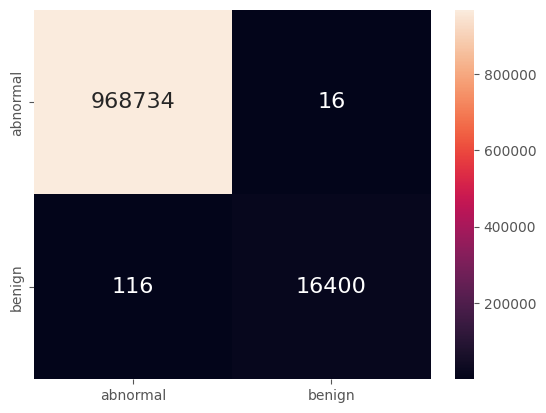

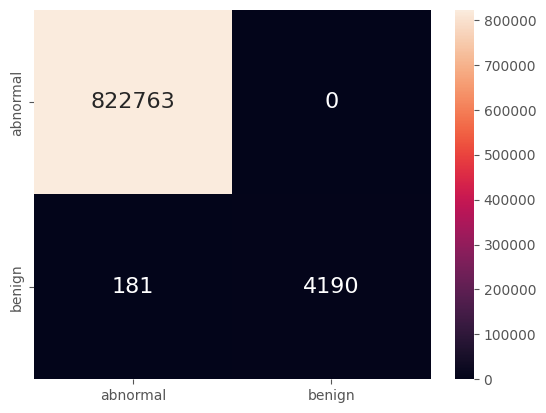

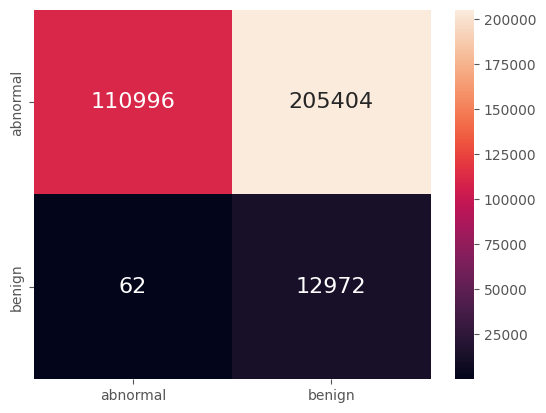

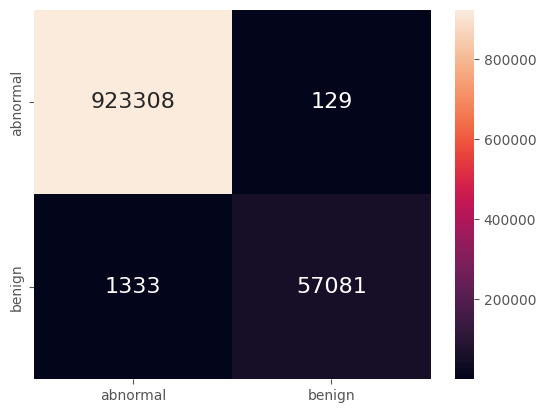

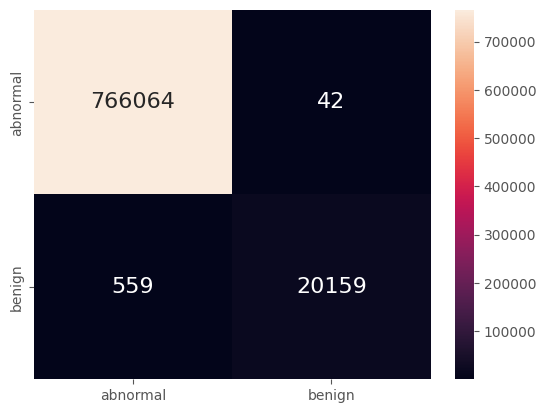

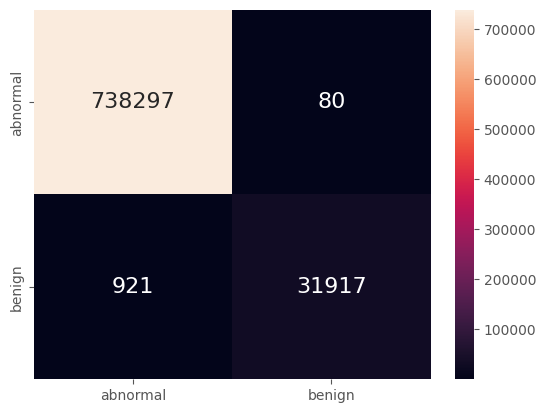

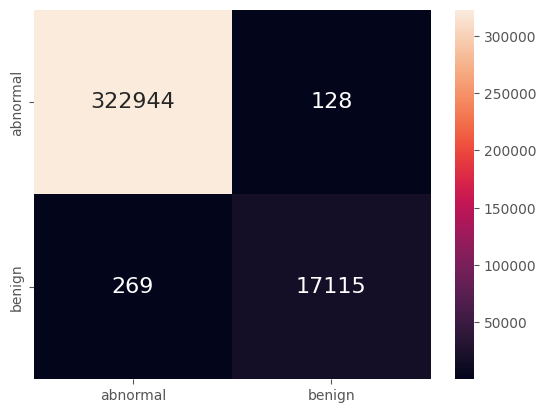

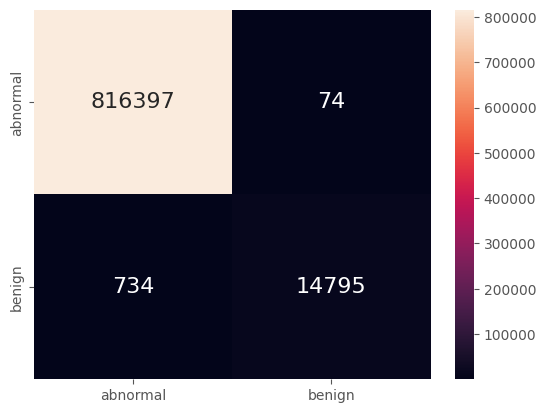

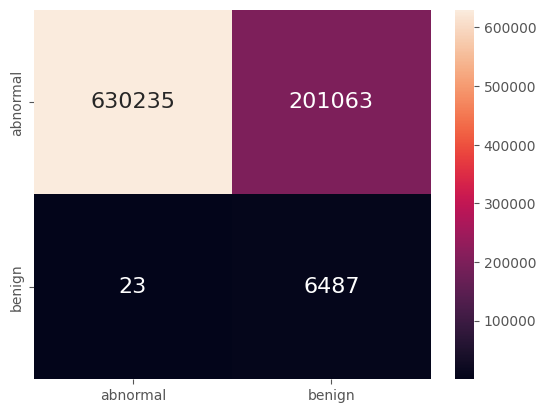

In [ ]:
"""
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Create the Data Generator for Retraining Process by Picking Baseline Data for each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 9 Optimized Parameters for the AE Model:
    {'optimizer': <class 'torch.optim.adam.Adam'>, 'max_epochs': 10, 'lr': 0.001, 'batch_size': 64}
"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 64
def train_data_loaders(batch_size = batch_size):
    data_1 = torch.utils.data.DataLoader(benign_train_1, batch_size = batch_size, shuffle=True)
    data_2 = torch.utils.data.DataLoader(benign_train_2, batch_size = batch_size, shuffle=True)
    data_3 = torch.utils.data.DataLoader(benign_train_3, batch_size = batch_size, shuffle=True)
    data_4 = torch.utils.data.DataLoader(benign_train_4, batch_size = batch_size, shuffle=True)
    data_5 = torch.utils.data.DataLoader(benign_train_5, batch_size = batch_size, shuffle=True)
    data_6 = torch.utils.data.DataLoader(benign_train_6, batch_size = batch_size, shuffle=True)
    data_7 = torch.utils.data.DataLoader(benign_train_7, batch_size = batch_size, shuffle=True)
    data_8 = torch.utils.data.DataLoader(benign_train_8, batch_size = batch_size, shuffle=True)
    data_9 = torch.utils.data.DataLoader(benign_train_9, batch_size = batch_size, shuffle=True)

    client_loaders = {'D1': data_1,
                      'D2': data_2,
                      'D3': data_3,
                      'D4': data_4,
                      'D5': data_5,
                      'D6': data_6,
                      'D7': data_7,
                      'D8': data_8,
                      'D9': data_9}

    return client_loaders

"""
   Create the Data Generator for Retraining Process by Picking Baseline Data for each Device:
"""
baseline_num = 1000  # choose some data from the train set to retrain the data from trained model
def baseline_data(size = baseline_num, batch_size = batch_size):
    rng = np.random.default_rng()
    x_1 = rng.choice(benign_train_1, size=size, replace = True, shuffle = True, axis=0) # [[[[[[randomly select]]]]]]
    x_2 = rng.choice(benign_train_2, size=size, replace = True, shuffle = True, axis=0)
    x_3 = rng.choice(benign_train_3, size=size, replace = True, shuffle = True, axis=0)
    x_4 = rng.choice(benign_train_4, size=size, replace = True, shuffle = True, axis=0)
    x_5 = rng.choice(benign_train_5, size=size, replace = True, shuffle = True, axis=0)
    x_6 = rng.choice(benign_train_6, size=size, replace = True, shuffle = True, axis=0)
    x_7 = rng.choice(benign_train_7, size=size, replace = True, shuffle = True, axis=0)
    x_8 = rng.choice(benign_train_8, size=size, replace = True, shuffle = True, axis=0)
    x_9 = rng.choice(benign_train_9, size=size, replace = True, shuffle = True, axis=0)


    loader_1 = torch.utils.data.DataLoader(x_1, batch_size=batch_size)
    loader_2 = torch.utils.data.DataLoader(x_2, batch_size=batch_size)
    loader_3 = torch.utils.data.DataLoader(x_3, batch_size=batch_size)
    loader_4 = torch.utils.data.DataLoader(x_4, batch_size=batch_size)
    loader_5 = torch.utils.data.DataLoader(x_5, batch_size=batch_size)
    loader_6 = torch.utils.data.DataLoader(x_6, batch_size=batch_size)
    loader_7 = torch.utils.data.DataLoader(x_7, batch_size=batch_size)
    loader_8 = torch.utils.data.DataLoader(x_8, batch_size=batch_size)
    loader_9 = torch.utils.data.DataLoader(x_9, batch_size=batch_size)

    loaders = {'D1': loader_1,
               'D2': loader_2,
               'D3': loader_3,
               'D4': loader_4,
               'D5': loader_5,
               'D6': loader_6,
               'D7': loader_7,
               'D8': loader_8,
               'D9': loader_9}

    return loaders

"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
num_clients = 9      # Number of clients
num_selected = 9     # Typically, num_selected is around 30–40% of the num_clients.
num_rounds = 10       # Total number of communication rounds for the global model to train.
epochs = 10           # for train client model
retrain_epochs = 5   # Total number of retraining rounds on the global server after receiving the model weights
                     # from all the clients that participated in the communication round.

global_model = AEModel().to(device) # for example
client_models = [AEModel().to(device) for _ in range(num_selected)]
print(client_models)

for model in client_models:
    model.load_state_dict(global_model.state_dict())

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = [torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay=1e-05) for model in client_models]
baseline_data = baseline_data()
train_loader = train_data_loaders()
devices = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'] # All devices

"""
   Train The Federated Model:
"""
# Train Client Model and Global Model
train_loss_client = []
train_loss_global = []

start_time = time.time()

for r in range(num_rounds):

    print('\nround: ', r + 1)
    client_idx = np.random.permutation(num_clients)[:num_selected] # random pick some clients from all clients for train
    print('client_idx: ', client_idx)
    client_lens = [len(train_loader[devices[idx]]) for idx in client_idx ]
    print(client_lens)

    # Update All Clients:
    loss = 0
    for i in tqdm(range(num_selected)):
        client_syn(client_models[i], global_model)
        loss += client_update(client_models[i], opt[i], train_loader[devices[client_idx[i]]], epochs)
    train_loss_client.append(loss)

    # Retrain the Model on the Global Server:
    loss_retrain = 0
    for i in tqdm(range(num_selected)):
        loss_retrain += client_update(client_models[i], opt[i], baseline_data[devices[client_idx[i]]], retrain_epochs)
    train_loss_global.append(loss_retrain/num_selected)

    # Aggregate all Client Models:
    server_aggregate_M(global_model, client_models, client_lens)

    print("\nclient_loss: ", loss)
    print('global_loss: ', loss_retrain/num_selected)

# save model
torch.save(global_model, 'global_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Global Model - AutoEncoder Model
"""
global_model = torch.load('global_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(global_model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(global_model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(global_model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(global_model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(global_model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(global_model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(global_model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(global_model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(global_model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(global_model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(global_model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(global_model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(global_model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(global_model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(global_model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(global_model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(global_model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(global_model, thr_9, mix_data_9, mix_label_9)


TIME: 0.06906630198160807mins
D1: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99999 
FPR: 0.00702

D2: 
Acc: 1.000% 
Precision: 1.000 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99999 
FPR: 0.02608

D3: 
Acc: 0.376% 
Precision: 0.999 
Recall: 0.351 
F1score: 0.519 
TPR: 0.35081 
FPR: 0.00476

D4: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99987 
FPR: 0.02261

D5: 
Acc: 0.998% 
Precision: 0.998 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99992 
FPR: 0.07134

D6: 
Acc: 0.998% 
Precision: 0.998 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99988 
FPR: 0.04151

D7: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 0.999 
TPR: 0.99960 
FPR: 0.01547

D8: 
Acc: 0.999% 
Precision: 0.999 
Recall: 1.000 
F1score: 1.000 
TPR: 0.99990 
FPR: 0.04630

D9: 
Acc: 0.760% 
Precision: 1.000 
Recall: 0.758 
F1score: 0.862 
TPR: 0.75814 
FPR: 0.00338


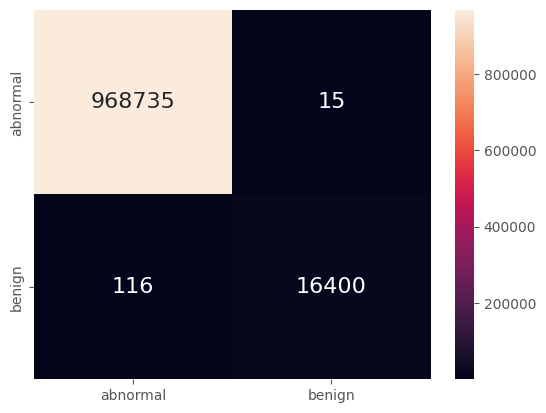

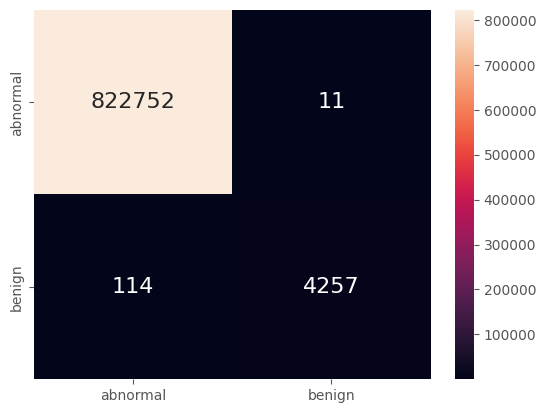

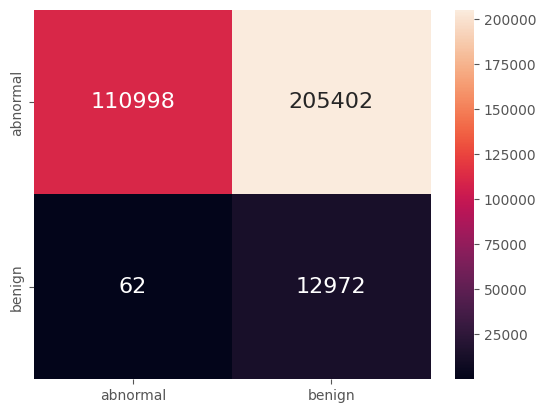

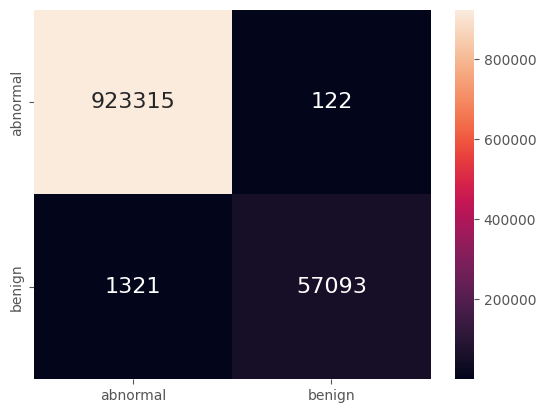

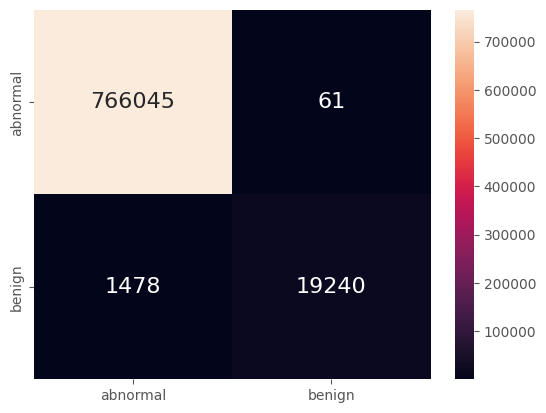

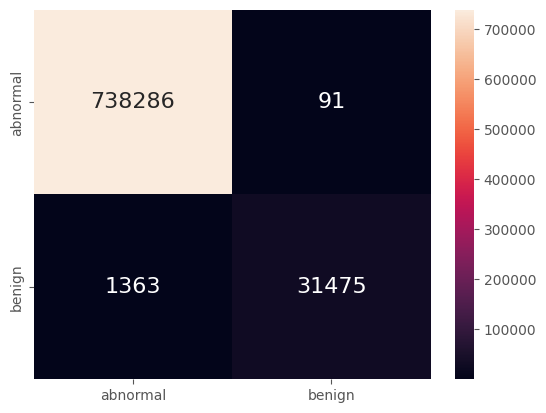

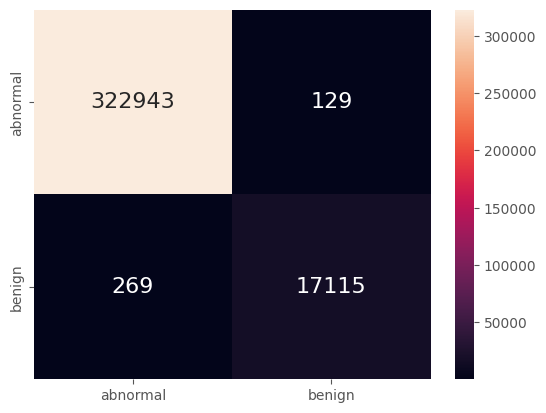

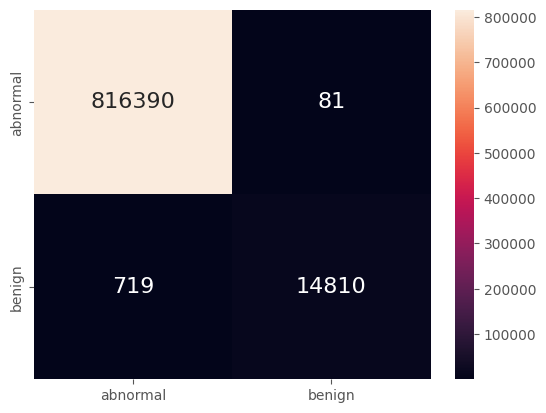

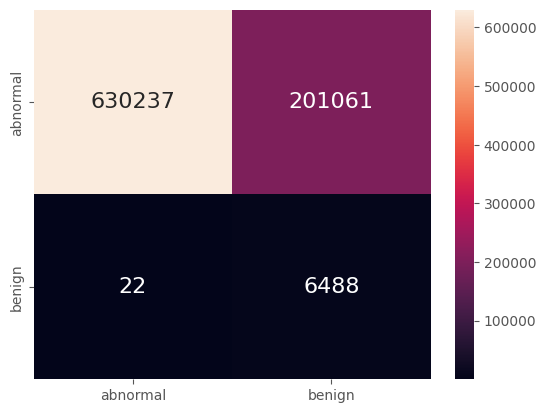

In [ ]:
"""
    Create the Data Generator for Main Training Process by Collecting Training Data of each Device,
    Define Other Training Parameters, Initialize the Model, and Data, Initialize the Optimizer, Data, Devices,
    Train the Non-Federated Model, Load Trained Model, and Test on Client's Devices:

    Using Device 9 Optimized Parameters for the AE Model -  Non- Federated Learning:
    {'optimizer': <class 'torch.optim.adam.Adam'>, 'max_epochs': 10, 'lr': 0.001, 'batch_size': 64}

"""

"""
   Create the Data Generator for Main Training Process by Collecting Training Data of each Device:
"""
batch_size = 64
def train_data_loaders(batch_size = batch_size):
    data_9 = torch.utils.data.DataLoader(benign_train_9, batch_size = batch_size, shuffle=True)
    return data_9


"""
    Define Other Training Parameters, Initialize the Model, and Data:
"""
epochs = 10           # for train client model

# Model Initialization
model = AEModel().to(device) # for example

train_loader = train_data_loaders()
print(train_loader)

"""
   Initialize the Optimizer, Data, Devices:
"""
opt = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay=1e-05)
train_loader = train_data_loaders()

"""
   Train The Non- Federated Model:
"""

# Train Non-FL Model
train_loss_client = []

start_time = time.time()

model.train()
for e in range(epochs):
    running_loss = 0.0
    for bx, (data) in enumerate(train_loader):
        output = model(data.float())
        opt.zero_grad()
        loss = nn.MSELoss(reduction='mean')(data.float().to(device), output)
        loss.backward()
        opt.step()
        # print(loss.item())
        running_loss += loss.item()
    # print(running_loss)
    epoch_loss = running_loss/len(train_loader)

# save model
torch.save(model, 'Non_FL_AE.pt')

time_required = time.time() - start_time
print('\nTIME: {}mins'.format(time_required/60))

"""
Load the Trained Non-FL Model - AutoEncoder Model
"""
model = torch.load('Non_FL_AE.pt')

"""
    Test on Client Devices - First Calculate the Threshold, and then Test on the devices:
"""
performance = {}

# Device 1:
thr_1 = get_tr(model, benign_tr_1)
print("D1: ")
performance['D1'] = get_mix_result(model, thr_1, mix_data_1, mix_label_1)

print(x)

# Device 2:
thr_2 = get_tr(model, benign_tr_2)
print("D2: ")
performance['D2'] = get_mix_result(model, thr_2, mix_data_2, mix_label_2)

print(x)

# Device 3:
thr_3 = get_tr(model, benign_tr_3)
print("D3: ")
performance['D3'] = get_mix_result(model, thr_3, mix_data_3, mix_label_3)

print(x)

# Device 4:
thr_4 = get_tr(model, benign_tr_4)
print("D4: ")
performance['D4'] = get_mix_result(model, thr_4, mix_data_4, mix_label_4)

print(x)

# Device 5:
thr_5 = get_tr(model, benign_tr_5)
print("D5: ")
performance['D5'] = get_mix_result(model, thr_5, mix_data_5, mix_label_5)

print(x)

# Device 6:
thr_6 = get_tr(model, benign_tr_6)
print("D6: ")
performance['D6'] = get_mix_result(model, thr_6, mix_data_6, mix_label_6)

print(x)

# Device 7:
thr_7 = get_tr(model, benign_tr_7)
print("D7: ")
performance['D7'] = get_mix_result(model, thr_7, mix_data_7, mix_label_7)

print(x)

# Device 8:
thr_8 = get_tr(model, benign_tr_8)
print("D8: ")
performance['D8'] = get_mix_result(model, thr_8, mix_data_8, mix_label_8)

print(x)

# Device 9:
thr_9 = get_tr(model, benign_tr_9)
print("D9: ")
performance['D9'] = get_mix_result(model, thr_9, mix_data_9, mix_label_9)